# Initialisation

In [1]:
from IPython.core.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

#width for some images
im_width = 11

In [2]:
pwd

'/cds/home/d/diegotur/UED/FePt/UED_FePt'

In [3]:
alldata = dict()

In [4]:
# %matplotlib nbagg
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patch
from matplotlib.patches import Polygon

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

import pandas as pd

import numpy as np
import scipy as sp
# import scipy.optimize 
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.misc import face
from scipy import interpolate

import glob
import csv
import re
import sys 
import os
import copy
import time
import h5py
import skimage.feature
import skimage.filters
import skimage.measure
import socket  
import itertools
from tqdm.notebook import tqdm as tqdm

from IPython.display import display, clear_output, Markdown
from PIL import Image, ImageOps

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

import cv2

udir = '/cds/home/d/diegotur/UED/'

if udir not in sys.path:
    sys.path.append(udir)

import ued_dt3 as ued_dt
try:
    import pyFAI, pyFAI.detectors
    from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
except:
    print('No pyFAI library found. If you want to do azimuthal integrations - install it!')

import dt_functions as dt
import I_UED_dt

import imp

# Select Runs and ROIS

In [5]:
data_path = [
# # Sample A-1
#     ANDOR1_delay_001_29.85995800_0001.tif
#     ANDOR1_delayLong-001-234.64039900_20191123_230616.790989_943427176.79_0001.tif
#     '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2326/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2358/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0117/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0324/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0530/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0736/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0942/', # position nb2 2.4mJ
#     '/cds/group/ued/data/ueduu1901/FePt/20190708/Run/20190708_1942/',
#     '/cds/group/ued/data/ueduu1901/FePt/20190708/Run/20190708_2009/'
#     '/cds/group/ued/data/ueduu1901/FePt/20190711/Run/20190711_1905/'
    
    
    #### New data by diego 
    
    ##Sample Durr #5 (UED)
#     '/cds/group/ued/data/ueduu1901/FePt/20190711/Run/20190711_2034/'  #  Durr#5, Fluence = 3 mJ/cm^2
#     '/cds/group/ued/data/ueduu1901/FePt/20190711/Run/20190711_2353/',  #  Durr#5, Fluence = 6 mJ/cm^2
#     '/cds/group/ued/data/ueduu1901/FePt/20190711/Run/20190711_2034/',  #  Durr#5, Fluence = 6 mJ/cm^2
    
    ## Sample Reid#3 7nm NPs 
#       '/cds/group/ued/data/ueduu0701/FePt/20190712/Run/20190712_1212/',  #   Reid#3, Fluence = 3 mJ/cm^2 (1st diffuse_scan)
#       '/cds/group/ued/data/ueduu0701/FePt/20190712/Run/20190712_1743/',  #   Reid#3, Fluence = 3 mJ/cm^2 (short scan for t0)
#       '/cds/group/ued/data/ueduu0701/FePt/20190712/Run/20190712_1801/',  #   Reid#3, Fluence = 3 mJ/cm^2 (diffuse_scan)
#       '/cds/group/ued/data/ueduu0701/FePt/20190712/Run/20190712_2220/',  #   Reid#3, Fluence = 4 mJ/cm^2 (timescan) run 11
#       '/cds/group/ued/data/ueduu0701/FePt/20190712/Run/20190712_2257/',  #   Reid#3, Fluence = 4 mJ/cm^2 (timescan) run 12
#       '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_0605/',  #   Reid#3, Fluence = 3 mJ/cm^2 (diffuse) run 13 new spot
#       '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_1132/',  #   Reid#3, Fluence = 4 mJ/cm^2 (diffuse) run 14 klystron went kaput
#       '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_1959/',  #   Reid#3, Fluence = 4 mJ/cm^2 (timescan) run 19  (15min)
      '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021/',  #   Reid#3, Fluence = 4 mJ/cm^2 (diffuse) run 20  (4.5 hours)
      '/cds/group/ued/data/ueduu0701/FePt/20190715/Run/20190715_0252/',  #   Reid#3, Fluence = 4 mJ/cm^2 (diffuse) run ???  )

    
    #############################################
    ####   November part of the beamtime      ###
    #############################################
    
    ## Sample 6-1 (16nm NPs)     
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_1251/',  #   6-1, run 20  Fluence = 4 mJ/cm^2 fluence damage scan
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_1358/',  #   6-1, run 33  Fluence = 12 mJ/cm^2 fluence (30 min)
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_1535/',  #   6-1, run 34  Fluence = 12 mJ/cm^2 fluence (45 min) ( new spot)
    
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_1618/',  #   6-1, run 35  Fluence = 6 mJ/cm^2 fluence (20 min)
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_1735/',  #   6-1, run 36  Fluence = 6 mJ/cm^2 fluence (20 min)

    ###### Sample 6-2 (16nm NPs)  45 deg NOVEMBER 
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1130/',  # 6-2 run 62 TEST 2.4 mJ/cm2 45 deg
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1316/',  # 6-2 run 63 TEST 4.2 mJ/cm2  45 deg 
    ###### 
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2123/',  # 6-2 run 63  4.2 mJ/cm2 1.5 hr

    
    ## Sample A-5 (7nm NPs)    
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_2031/',  #   A-5, run 40  Fluence = 4 mJ/cm^2 fluence (1hr )
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_2146/',  #   A-5, run 41  Fluence = 3.3 mJ/cm^2 fluence (20min)

    ## Sample A-7 (7nm NPs)    
#        '/cds/group/ued/data/ueduu0701/FePt/20191121/Run/20191121_2216/',  #   A-7, run 42  Fluence = 4 mJ/cm^2 fluence (3 hr ) DIFFUSE 
    
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_0559/',  #   A-7, run 45  Fluence = 3.3 mJ/cm^2 fluence (1 hr) differnet position 
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_0655/',  #   A-7, run 46  Fluence = 3.3* mJ/cm^2 fluence (1 hr)
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_0810/',  #   A-7, run 47  Fluence = 3.3* mJ/cm^2 fluence (3 hrs)  
#         '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1528/',  #   A-7, run 51  Fluence = 2.4 mJ/cm^2 fluence (20 min)
#         '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1543/',  #   A-7, run 52  Fluence = 2.83 mJ/cm^2 fluence (1 hr)
#         '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1739/',  #   A-7, run 55  Fluence = 2.83 mJ/cm^2 fluence (1 hr) second position

#          '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1603/',  #   A-7, run 64  Fluence = 2.8 mJ/cm^2 fluence (20min) third position t0 slighlty shifted 
#          '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1619/',  #   A-7, run 65  Fluence = 2.8 mJ/cm^2 fluence (20min) third position t0 slighlty shifted 
#          '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1636/',  #   A-7, run 66  Fluence = 2.8 mJ/cm^2 fluence (10min) third position t0 slighlty shifted 
    
#          '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1724/',  #   A-7, run 67  Fluence = 1.5 mJ/cm^2 fluence (1.5hr) third position t0 slighlty shifted 
#          '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1909/',  #   A-7, run 68  Fluence = 1.5 mJ/cm^2 fluence (1.0hr) third position t0 slighlty shifted 


    ## Sample A-4 (7nm NPs)
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_0116/',  #   A-4, run 43  Fluence = 4 mJ/cm^2 fluence (1hr )
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_0222/',  #   A-4, run 44  Fluence = 2.48* mJ/cm^2 fluence (3.5 hrs )
    
##        #'/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1059/',  #   A-4, run 48  Fluence = 2.83 mJ/cm^2 fluence (3 hrs)***CANCELED
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1124/',  #   A-4, run 49  Fluence = 2.4 mJ/cm^2 fluence (30 min)
#        '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_1152/',  #   A-4, run 50  Fluence = 2.4 mJ/cm^2 fluence (2 hrs)
    
#         '/cds/group/ued/data/ueduu0701/FePt/20191122/Run/20191122_2051/',  #   A-4, run 56  Fluence = 2.4 mJ/cm^2 fluence (4 hrs) second position
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_0108/',  #   A-4, run 57  Fluence = 2.4 mJ/cm^2 fluence (3 hrs) second position
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_0304/',  #   A-4, run 58  Fluence = 2.4 mJ/cm^2 fluence (2 hrs) second position
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_0504/',  #   A-4, run 59  Fluence = 2.4 mJ/cm^2 fluence (2 hrs) second position
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_0704/',  #   A-4, run 60  Fluence = 2.4 mJ/cm^2 fluence (2 hrs) second position

    
#    ## TESTS OVERLAP 
#             '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_1022/',  # 6-1 run 61 TEST no pump-probe 

#    ## Sample A-1 (7nm NPs) LASTSCAN WITH LOTS OF STATISTICS 
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2305/',  #   A-1, run 73  Fluence = 2.6 mJ/cm^2 fluence (20min) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2326/',  #   A-1, run 74  Fluence = 2.6 mJ/cm^2 fluence (30min) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191123/Run/20191123_2358/',  #   A-1, run 75  Fluence = 2.6 mJ/cm^2 fluence (1hr) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0117/',  #   A-1, run 76  Fluence = 2.6 mJ/cm^2 fluence (2hrs) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0324/',  #   A-1, run 77  Fluence = 2.6 mJ/cm^2 fluence (2hrs) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0530/',  #   A-1, run 78  Fluence = 2.6 mJ/cm^2 fluence (2hrs) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0736/',  #   A-1, run 79  Fluence = 2.6 mJ/cm^2 fluence (2hrs) 
#         '/cds/group/ued/data/ueduu0701/FePt/20191124/Run/20191124_0942/',  #   A-1, run 80  Fluence = 2.6 mJ/cm^2 fluence (2hrs) 

]


#manually picked ROIs. otherwise can be picked on the images
roinames = ['100', '010', '-100', '0-10']
# roicoord =[
#     [537.5647674001301-75, 415.4764844228147-25],
#     [408.22747475890344-75, 484.8345765991508+75],
#     [474.5968982798045, 613.1830376234469],
#     [603.2627625972366, 543.0210908605212]

# ]
# roicoord = [ 
#     [459.9762638647842, 400.29103070307985],
#     [376.7059909953882, 557.5494567460468],
#     [529.8265369782005, 645.8777924608883],
#     [613.838374144344, 489.0744582616936]
#          ]

##ROI COORDS FOR DURR#3
# roicoord = [ 
#     [396.6312429816506, 427.61301581062247],
#     [395.79999071815047, 605.1771073105715],
#     [569.4199198231861, 612.4446831914642],
#     [572.5692461206526, 429.99972161204875]
#         ]

# ##ROI COORDS FOR REID#3 (scans up to scan 6 )
# roicoord = [ 
#     [394.9690628207779, 591.5979720784686],
#     [416.4662550093123, 415.7681316868374],
#     [589.54072255214, 438.3971200453235],
#     [568.0691692532218, 618.4926064656769]
#         ]
# ##ROI COORDS FOR REID#3 (scans up to scan 11  )
roicoord = [
    [425.719203896629, 447.27946659749034],
    [566.5981163772879, 466.7329921805848],
    [549.3065779277509, 611.0787981335249],
    [408.2835757825091, 589.498444929509]
    ]


#################################################
###               November beamtime          ####
#################################################


##ROI COORDS FOR 6-1 
# roicoord = [
#     [409.7501221355705, 460.11673774289636],
#     [454.33683193329637, 597.7815615838401],
#     [591.7826497828627, 549.5697196964619],
#     [546.8002871758365, 411.9324065317806]
#     ]

##ROI COORDS FOR 6-2
## November 45 degree coords 
# roicoord = [
#     [355.20606548802255, 503.8427677315243],
#     [421.62668967881297, 401.81102615120653],
#     [643.7411158194543, 496.3933663971188],
#     [577.395204314611, 598.5941547627724]
# ]
## Normal Incidence 
# roicoord = [
#     [430.27624514102627, 446.913022756522],
#     [436.7527498433451, 590.8338103626909],
#     [580.6485834587917, 581.942431924741],
#     [574.8988012162091, 436.85979802478386]
#     ]


##ROI COORDS FOR A-5 
# roicoord = [
#     [441.8697240883871, 418.64835790226664],
#     [399.52565800030294, 558.8879840431721],
#     [538.212189226932, 598.333167969614],
#     [580.1500298426822, 457.41969567839857]
#     ]

##ROI COORDS FOR A-7
# roicoord = [
#     [403.29727324057103, 470.23631859803555],
#     [459.2479391646798, 602.6476108224533],
#     [593.3621441748841, 543.1749195911908],
#     [536.8160795964775, 409.8654825972398]
#     ]

# # ##ROI COORDS FOR A-4 ( part 1)
# roicoord = [
#     [396.4738147031174, 482.7610610035141],
#     [472.10558392110414, 605.3438944336184],
#     [595.8666165095226, 526.1048957684144],
#     [519.808681457864, 403.71545198854676]
#     ]

# # ##ROI COORDS FOR A-4 ( part 2)
# roicoord = [
#     [397.90901051831287, 481.2060856910164],
#     [473.46183062583697, 602.9358134548061],
#     [597.3314747552948, 523.7333726459591],
#     [520.6801893805, 401.25109004381363]
#     ]


# # ##ROI COORDS FOR A-1
# roicoord = [
#     [408.2997507402134, 484.98371044631955],
#     [474.63955801180214, 613.2089071715462],
#     [603.3774902914787, 543.1489158176628],
#     [537.6127207228366, 415.5927701635615]
#     ]



# import warnings
# from scipy.optimize import OptimizeWarning
# # warnings.filterwarnings(action = "error", category=OptimizeWarning)
# warnings.filterwarnings(action = "ignore", category=OptimizeWarning)

#create diffraction object
dif = ued_dt.diffraction(sample = 'FePt 6-1 16nm', data_path = data_path, roisize=40, maxorder = '550', roicoord=roicoord, roinames = roinames, a_reference=0.336, noscans=False, skipnimages=0, plot_width=15)

# try:
#     #prepare everything for azimuthal integration
#     dif.initialize_pyFAI(pixelsize=13e-6, sample_to_detector=7.7, e_energy=2e6, wl_correction=122.03 )
# except:
#     print ('AI doesn\'t work'),

dif.exposure = 6.
dif.gain = 65.


# 100;010;-100;0-10  MOST SCANS 
# 100;110;-100;-1-10  #45 deg 




### Delete corrupted image ( and it's I0)
corruped_image_fname =   '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/images-ANDOR1/ANDOR1_longDelay-010-273.37897900_0001.tif'
corruped_image_fnameI0 = '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/I0/ANDOR2_longDelay-011-273.3790_20190714_073149.502110_0001.tif'
# corruped_image_fnameI0 = '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/I0/ANDOR2_longDelay-010-273.3940_20190714_073134.576158_0001.tif'
idx_delete = np.where(dif.fnames == corruped_image_fname)

dif.fnames = np.delete(dif.fnames,idx_delete)
dif.fnames_I0 = np.delete(dif.fnames_I0,idx_delete)


generating fnames
generated fnames


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## time zero ! 

In [6]:
# set time zero

dif.t0 =  273.349 #november first scans 
# dif.t0 = 29.8
# dif.t0 = 235.21


# load delays from filenames
dif.load_delays()

### Select all values pre-t0 for beam drift analysis

In [7]:
max_frame = 25
frame_step = 25

In [8]:

sel_pre_t0 = np.where(dif.delays_ps < 0.5)
sel_pre_t0 = np.where(dif.delays_ps < -0.5)


In [9]:
first_20_pre_pump = dif.load_img(dif.fnames[sel_pre_t0[0][0:20]])
last_20_pre_pump = dif.load_img(dif.fnames[sel_pre_t0[0][-20:]])

## Calculate the lattice and predict Bragg peak positions

In [10]:
print(dif.a_reference)
dif.a_reference = 2.73
print(dif.a_reference)

0.336
2.73


In [11]:
allBragg_coord, allBragg_names, allBragg_indices = ued_dt.find_lattice_dt(dif)

[427.774802443875, 440.9892626392573]
yes
[569.416777152588, 458.19419091440244]
yes
[550.3494707391446, 604.2202328732393]
yes
[408.80146085406733, 583.4419195077371]
yes
nope
nope


In [12]:
distance_in_meters = (np.linalg.norm( allBragg_coord[60] - dif.centerpos ) * 13e-6) 
two_theta_from_geom = np.arctan(distance_in_meters/3)

In [13]:
x = np.arange(dif.first_image.shape[0])
y = np.arange(dif.first_image.shape[1])
x, y = np.meshgrid(x, y)

sel_corners = (
    (y< ((100-0)/100)*x - 900) + (y< ((-100)/100)*x +150) + 
    (y> ((100-0)/100)*x + 900) + (y> ((-100)/100)*x +900+900+140)
)

dif.first_image  -= dif.first_image[sel_corners].mean()
dif.last_image -= dif.last_image[sel_corners].mean()

### Normalise first and last image by i0 intensity ( for compatibilty )

I need to change and update this so that it matches the normalisation method I am now using: aka the donut ...

In [14]:
#Normalise first and last image by i0 intensity ( for compatibilty )
temp_fits = np.zeros((20,6))

for i, i0_fname in enumerate(dif.fnames_I0[0:20]):
#     print(i0_fname)
    temp_fits[i] = ued_dt.load_and_fit_i0(i0_fname)

# temp_fits0 = np.zeros(6)
temp_fits0 = np.mean(temp_fits, axis = 0)

# dif.first_image /= temp_fits0[0]*temp_fits0[3]*temp_fits0[4] #old for i0 normalisation
dif.first_image /= dif.first_image[dif.donut_mask].mean() #this is for donut normalisation



for i, i0_fname in enumerate(dif.fnames_I0[-20:]):
#     print(i0_fname)
    temp_fits[i] = ued_dt.load_and_fit_i0(i0_fname)

# temp_fits0 = np.zeros(6)
temp_fits0 = np.mean(temp_fits, axis = 0)

# dif.last_image /= temp_fits0[0]*temp_fits0[3]*temp_fits0[4] #old for i0 normalisation
dif.last_image /=dif.last_image[dif.donut_mask].mean()


### select two opposite ROIs 

In [15]:
#select ROIS that have their Pair
allBragg_coord_2, allBragg_names_2, allBragg_indices_2 = np.asarray(allBragg_coord), np.asarray(allBragg_names), np.asarray(allBragg_indices)
sel_bragg_in_im = (
    (allBragg_coord_2[:,0] > 0 + dif.roisize )&
    (allBragg_coord_2[:,0] < dif.first_image.shape[0] - dif.roisize )&
    (allBragg_coord_2[:,1] > 0 + dif.roisize )&
    (allBragg_coord_2[:,1] < dif.first_image.shape[1] - dif.roisize )    
)

In [16]:
# %%timeit
# this loop takes 2s per scattering pattern 
#set xx and yy coordinate frame 
x = np.arange(dif.first_image.shape[0])
y = np.arange(dif.first_image.shape[1])

xx, yy = np.meshgrid(x,y)

image = dif.first_image

centers = np.zeros_like(allBragg_coord_2)

bragg_fits = np.zeros((120, 7))
fit_erros = np.zeros((120, 7,7))



for i in np.arange(len(allBragg_names)//2):
#     print(i)
    if sel_bragg_in_im[i]:
#         print(f'yay nb: {i} and {np.arange(120)[::-1][i]}')

        ### ROI 1: 
        roi_1_lower_left = (allBragg_coord_2[i] - dif.roisize).astype(int)
        roi_1_upper_right = (allBragg_coord_2[i] + dif.roisize).astype(int)
        roi_1_selx  = np.arange(roi_1_lower_left[1],roi_1_upper_right[1])
        roi_1_sely =  np.arange(roi_1_lower_left[0],roi_1_upper_right[0])
        roi_1 = image[roi_1_selx,:][:,roi_1_sely]

        ### ROI 2: 
        roi_2_lower_left = (allBragg_coord_2[::-1][i] - dif.roisize).astype(int)
        roi_2_upper_right = (allBragg_coord_2[::-1][i] + dif.roisize).astype(int)
        roi_2_selx  = np.arange(roi_2_lower_left[1],roi_2_upper_right[1])
        roi_2_sely =  np.arange(roi_2_lower_left[0],roi_2_upper_right[0])
        roi_2 = image[roi_2_selx,:][:,roi_2_sely]


        ### Fit ROIs with a 2D gaussian: 
#         def twoD_Gaussian(xx_yy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
        vmin = np.percentile(roi_1, 2)
        vmax = np.percentile(roi_1, 95)
        initial_guess_1 = (vmax-vmin, allBragg_coord_2[i][0],allBragg_coord_2[i][1],5,5,0,vmin)
#         initial_guess_1 = (10,allBragg_coord_2[i][0],allBragg_coord_2[i][1],10,10,0,1)
        xx_yy_1 = (xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely])
        popt_1, pcov_1 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_1, roi_1.ravel(), p0=initial_guess_1)
        
        vmin = np.percentile(roi_2, 2)
        vmax = np.percentile(roi_2, 95)
        initial_guess_2 = (vmax-vmin,allBragg_coord_2[::-1][i][0],allBragg_coord_2[::-1][i][1],5,5,0,vmin)
#         initial_guess_2 = (10,allBragg_coord_2[::-1][i][0],allBragg_coord_2[::-1][i][1],10,10,0,1)
        xx_yy_2 = (xx[roi_2_selx,:][:,roi_2_sely], yy[roi_2_selx,:][:,roi_2_sely])
        popt_2, pcov_2 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_2, roi_2.ravel(), p0=initial_guess_2)
        
        centers[i]  = popt_1[1], popt_1[2]
        centers[::-1][i] = popt_2[1], popt_2[2]
        
        bragg_fits[i] =popt_1
        bragg_fits[::-1][i] = popt_2
        
        fit_erros[i] = pcov_1
        fit_erros[::-1][i] = pcov_2

        
    else:
#         print(f'nay nb: {i} and {np.arange(120)[::-1][i]}')
        pass


## Center of the scattering image

Text(0, 0.5, 'y pos (px)')

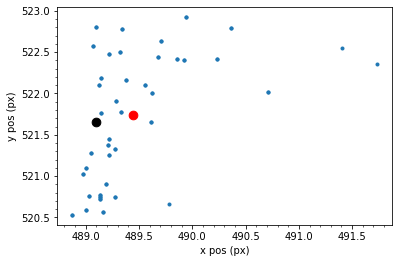

In [17]:
i=0
avg_fit = (0.5*(bragg_fits[::-1, :] + bragg_fits[:,:]))[sel_bragg_in_im][:-1]
test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))


cent_test = np.zeros((int(max_frame/frame_step),2))
for i in np.arange(int(max_frame/frame_step)):
    avg_fit = (0.5*(bragg_fits[::-1, :] + bragg_fits[:,:]))[sel_bragg_in_im][:-1]
    test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))
    
    cent_test[i] = avg_fit[test_sel, 1:3].mean(axis = 1)[0]



# i=0
avg_fit = (0.5*(bragg_fits[::-1, :] + bragg_fits[:,:]))[sel_bragg_in_im][:-1]
test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))

plt.plot(avg_fit[test_sel,1], 
            avg_fit[test_sel,2], '.', color=f'C{i}');
plt.scatter(cent_test[i][0],cent_test[i][1], color=f'r', s=75, zorder=100)
plt.scatter(dif.centerpos[0], dif.centerpos[1], color='k',zorder=100, s=75)

plt.xlabel('x pos (px)')
plt.ylabel('y pos (px)')

# Static Analysis

## azimuthal background Vs powder XRD-like plots

In [18]:

mask = np.ones_like(dif.first_image)


sx, sy = dif.first_image.shape
xcoord, ycoord = np.ogrid[:sx, :sy]
for i in range(len(allBragg_coord)):
    mask[np.hypot(xcoord - allBragg_coord[i][1], ycoord- allBragg_coord[i][0]) < 40 ] =np.nan



In [19]:
masked_img = dif.first_image*mask

inv_mask = np.ones_like(mask)
inv_mask[np.invert(np.isnan(mask))] = np.nan


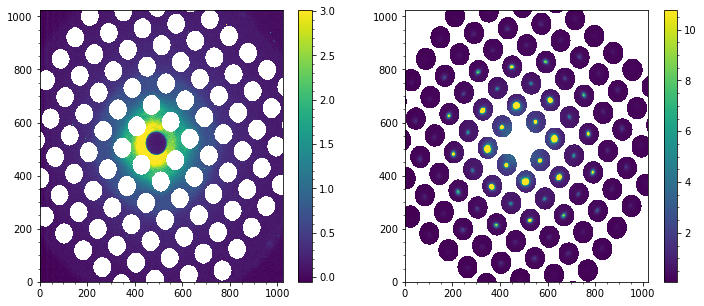

In [20]:
fig, [ax1, ax2] = plt.subplots(ncols = 2, figsize = (12,5)) 

vmin = np.percentile(masked_img[~np.isnan(masked_img)],  1)
vmax = np.percentile(masked_img[~np.isnan(masked_img)], 99)

im1=ax1.pcolormesh(masked_img, vmin = vmin, vmax=vmax)
plt.colorbar(im1, ax=ax1)


vmin = np.percentile((dif.first_image*inv_mask)[~np.isnan(dif.first_image*inv_mask)],  1)
vmax = np.percentile((dif.first_image*inv_mask)[~np.isnan(dif.first_image*inv_mask)], 99)

im2=ax2.pcolormesh(dif.first_image*(inv_mask), vmin = vmin, vmax=vmax)
plt.colorbar(im2, ax=ax2)


### Azimuthal Integration 

In [21]:
dist_vals, azimuthal_vals, norm_test= dif.azimuthal_average_DT(image = masked_img, norm_out=True)

1448.1546878700494
[1.000e+00 2.000e+00 3.000e+00 ... 1.446e+03 1.447e+03 1.448e+03]


/cds/home/d/diegotur/UED/ued_dt3.py:903: RuntimeWarning: Mean of empty slice
  azimuthal_vals[i] = np.nanmean(image[mask])


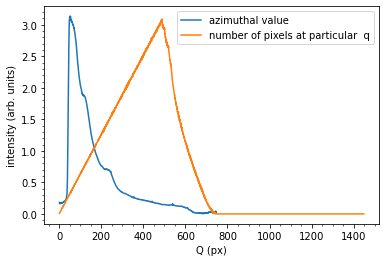

In [22]:
plt.figure()
plt.plot( dist_vals, azimuthal_vals, label = 'azimuthal value')
# plt.plot( dist_vals, norm_test/10000000)
plt.plot( dist_vals, norm_test/1000, label='number of pixels at particular  q')

plt.ylabel('intensity (arb. units)')
plt.xlabel('Q (px)')
plt.legend()

In [23]:
FePt_a = 2.72814

FePt_a_YK = 3.85/np.sqrt(2)
FePt_a = FePt_a_YK


In [ ]:
# FePt_a = 2.735 # I just want to try out this one

In [24]:
FePt_a_YK

2.722361107568208

In [25]:
(2*np.pi/FePt_a)

2.307991136705645

In [26]:
dist_vals_pks, azimuthal_vals_pks, norm = dif.azimuthal_average_DT(image = dif.first_image*(inv_mask), norm_out = True)

1448.1546878700494
[1.000e+00 2.000e+00 3.000e+00 ... 1.446e+03 1.447e+03 1.448e+03]


/cds/home/d/diegotur/UED/ued_dt3.py:903: RuntimeWarning: Mean of empty slice
  azimuthal_vals[i] = np.nanmean(image[mask])


In [27]:
max_idx = np.where(azimuthal_vals_pks == np.nanmax(azimuthal_vals_pks[np.where(dist_vals_pks < 150)]) )[0][0]
max_idx = np.where(azimuthal_vals_pks == np.nanmax(azimuthal_vals_pks[np.where(dist_vals_pks < 120)]) )[0][0]

In [28]:
coef = (2*np.pi/FePt_a) / dist_vals_pks[max_idx]
print(coef)

0.022851397393125198


In [29]:
# # using the calibration of pixels used on Bismuth
# coef_Bi = 8.29849/350 #  8.29849: value of the 330 Bi diffraction peak in A-1, 350: px value obtained on the detector
# print(coef_Bi)
# coef = coef_Bi # overrifing the previous calibration

(0.0, 2.0)

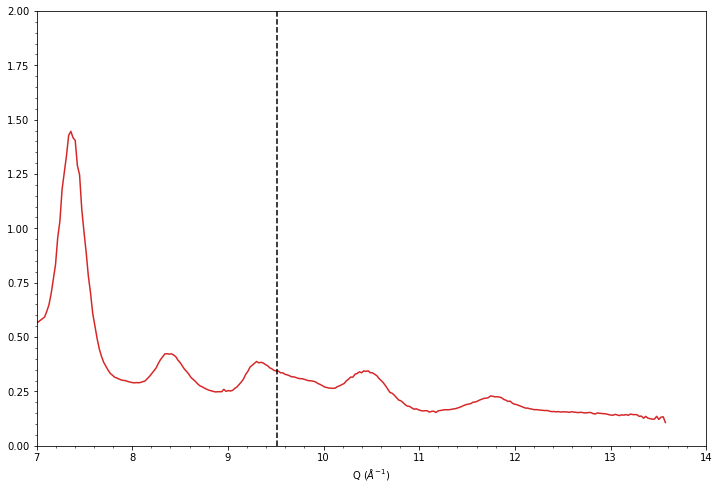

In [30]:
plt.figure(figsize = (12,8))
plt.plot( coef*dist_vals_pks, azimuthal_vals_pks, c='C3')
plt.xlabel('Q ($ \AA^{-1}$)')

plt.axvline(np.sqrt( (4*2*np.pi/(FePt_a))**2 + ( 1*2*np.pi/(FePt_a))**2 ) , c= 'k', ls='--') #320

plt.xlim(7,14)
plt.ylim(0,2)

## Simulate lattice from measured lattice constants

In [31]:
nb_atoms = 20

FePt_a = 2.72814
FePt_b = 2.72814
FePt_c = 3.77898

lattice_constant = 2*np.pi/2.72814 # this uses the tabulated value. 
lattice_constant = (coef*dist_vals_pks[ np.where(azimuthal_vals_pks == np.nanmax(azimuthal_vals_pks))]/np.sqrt(2))[0] # this uses the measured value, assuming the calibration was done properly
# print(lattice_constant)
row = np.arange(-nb_atoms*lattice_constant/2,+nb_atoms*lattice_constant/2,lattice_constant)
row_idx = np.arange( -nb_atoms//2, nb_atoms//2)


bragg_pos = []
hk_idx = []
idx = 0
for i_idx, i in enumerate(row):
    for j_idx, j in enumerate(row):
        bragg_pos.append( [i, j] )
        hk_idx.append([row_idx[i_idx], row_idx[j_idx]])
        idx += 1
bragg_pos = np.asarray(bragg_pos)

### First Step: X-ray form factors

#### Test: plot XRD pattern for X-rays

In [32]:
F_XRD = np.zeros_like(bragg_pos[:,0])

for i in range(len(F_XRD)):
    q_tmp = np.sqrt((bragg_pos[i]**2).sum())
    f_Fe = dt.form_factor(q_tmp, element = 'Fe')
    f_Pt = dt.form_factor(q_tmp, element = 'Pt')
    f_C = dt.form_factor(q_tmp, element = 'C')
    
    if np.asarray(hk_idx)[i].sum() % 2 : #if odd
        F_XRD[i] = f_Pt - f_Fe
    else:
        F_XRD[i] = f_Pt + f_Fe
I_XRD = F_XRD**2

In [33]:
df2 = pd.DataFrame(hk_idx, columns=['h', 'k'] )
zero_order_idx = df2[(df2['h'] == 0)&(df2['k'] == 0)].index[0]
I_XRD[zero_order_idx] = 0

Text(0.5, 1.0, 'Reciprocal lattice ')

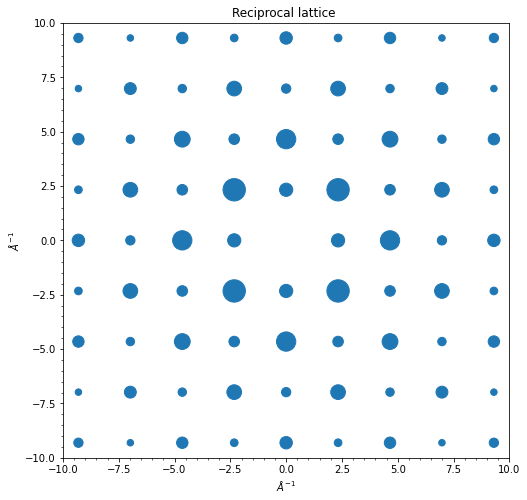

In [34]:
plt.figure(facecolor = "white", figsize = (8,8) )
plt.scatter(bragg_pos[:,0],bragg_pos[:,1],s = 500*I_XRD/np.max(I_XRD) )

plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel(r'$ \AA^{-1} $')
plt.title('Reciprocal lattice ')

### Step2: Use X-ray From factors to calculate electron from factors

In [35]:
%%time
F_UED = np.zeros_like(bragg_pos[:,0])

for i in range(len(F_UED)):
    q_tmp = np.sqrt((bragg_pos[i]**2).sum())
    f_Fe = dt.electron_form_factor(q_tmp, element = 'Fe')
    f_Pt = dt.electron_form_factor(q_tmp, element = 'Pt')
    f_C = dt.electron_form_factor(q_tmp, element = 'C')
    
    if np.asarray(hk_idx)[i].sum() % 2 : #if odd
        F_UED[i] = f_Pt - f_Fe
    else:
        F_UED[i] = f_Pt + f_Fe
I_UED = F_UED**2


I_UED[zero_order_idx] = 0 

/cds/home/d/diegotur/UED/FePt/UED_FePt/dt_functions.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  f_e = constant*( (Z - f_x)/(Q**2) )


CPU times: user 3.22 s, sys: 9.15 ms, total: 3.23 s
Wall time: 3.21 s


Text(0.5, 1.0, 'Reciprocal lattice ')

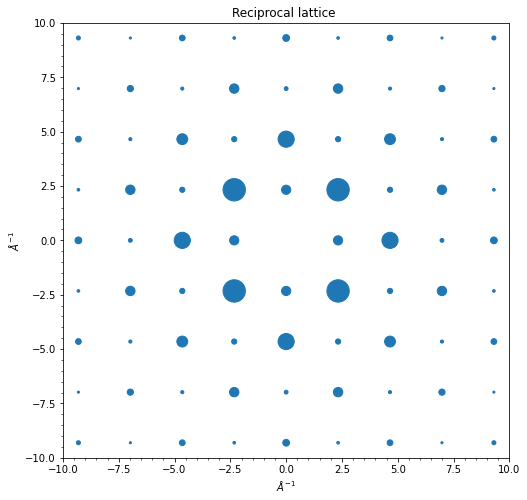

In [36]:
plt.figure(facecolor = "white", figsize = (8,8) )
plt.scatter(bragg_pos[:,0],bragg_pos[:,1],s = 500*I_UED/np.max(I_UED) )
# plt.axvline(0, c='k', ls ='--')
# plt.plot( a-a.max(), b, '-', c='C1' )

plt.xlim(-10.,10.)
plt.ylim(-10.,10.)
plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel(r'$ \AA^{-1} $')
# plt.xlim(-2.,2.)
# plt.ylim(-2.,2.)
plt.title('Reciprocal lattice ')

#### Plot electron diffraction pattern

Text(0.5, 1.0, 'Reciprocal lattice ')

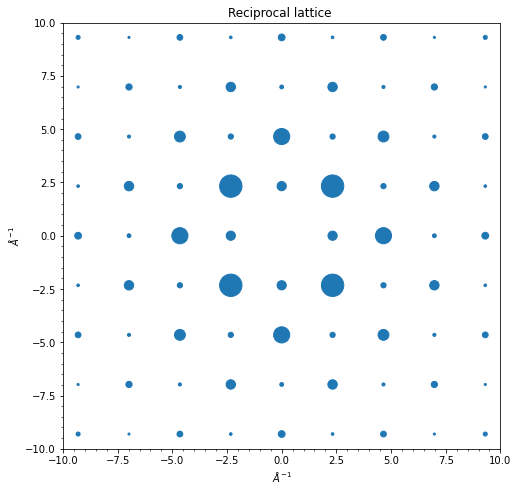

In [37]:
# theta = -5.340708
theta = 0

pos_x2 = np.cos(theta) * bragg_pos[:,0] - np.sin(theta) *bragg_pos[:,1]
pos_y2 = np.sin(theta) * bragg_pos[:,0] + np.cos(theta) *bragg_pos[:,1]

fig = plt.figure(
    facecolor = "white",
           figsize = (0.98*8,0.98*8) )
# plt.scatter(bragg_pos[:,0],bragg_pos[:,1],s = 500*I_UED/np.max(I_UED) )
plt.scatter(pos_x2,pos_y2,s = 500*I_UED/np.max(I_UED) )


# plt.axvline(0, c='k', ls ='--')
# plt.plot( a-a.max(), b, '-', c='C1' )

plt.xlim(-10.,10.)
plt.ylim(-10.,10.)
plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel(r'$ \AA^{-1} $')
# plt.xlim(-2.,2.)
# plt.ylim(-2.,2.)
plt.title('Reciprocal lattice ')


## Use Center position to show the Static UED pattern

In [38]:
dif.first_image.shape[0] - dif.centerpos[0]

534.9037513577466

In [39]:
x = np.arange(dif.first_image.shape[0])
(x- dif.centerpos[0])*coef

array([-11.17653274, -11.15368134, -11.13082995, ...,  12.154744  ,
        12.17759539,  12.20044679])

In [40]:
dif.centerpos
x_A = np.arange(dif.first_image.shape[0])
x_A =( x_A- dif.centerpos[0])*coef
y_A = np.arange(dif.first_image.shape[1])
y_A =( y_A- dif.centerpos[1])*coef
xx_A, yy_A = np.meshgrid(x_A,y_A)

# coef

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, '$\\AA^{-1}$')

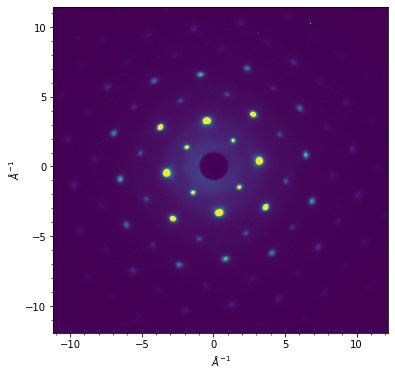

In [41]:
plt.figure(figsize = (6,6))
plt.pcolormesh(xx_A, yy_A, dif.first_image, vmin= vmin, vmax=vmax*2)
plt.xlabel(r'$\AA^{-1}$')
plt.ylabel(r'$\AA^{-1}$')

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


(-8.0, 8.0)

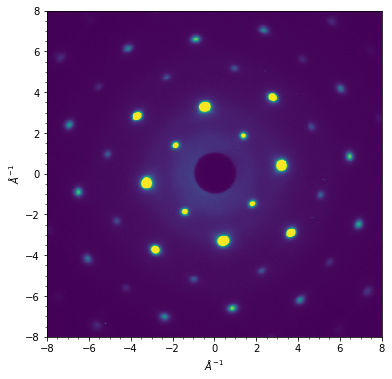

In [42]:
plt.figure(figsize = (6,6))
plt.pcolormesh(xx_A, yy_A, dif.first_image, vmin= vmin, vmax=vmax*2)
plt.xlabel(r'$\AA^{-1}$')
plt.ylabel(r'$\AA^{-1}$')

plt.xlim(-8,8)
plt.ylim(-8,8)

## Use Atomic electron scattering coefs to simulate atomic scattering from Pt alone

In [43]:
element_str = 'Pt'
def I_atom_f(Q, base, alpha):
    '''
    I am too lazy to write somthing proper now
    '''
    return base + alpha*dt.electron_form_factor(Q, element = element_str)**2



def I_atom_alt_f(Q, base, alpha):
    '''
    fits x^-1.5 function 
    '''
#     return base+ alpha/Q**1.5
    return base+ alpha/Q**1.5

In [44]:

sel_tmp = np.where((coef*dist_vals < 11)&(coef*dist_vals > 7))
# sel_tmp = np.where((coef*dist_vals < 11)&(coef*dist_vals > 1))
# sel_tmp = np.where((coef*dist_vals < 10)&(coef*dist_vals > 6))
# sel_tmp = np.where((coef*dist_vals < 10)&(coef*dist_vals > 1))

popt , pcov = sp.optimize.curve_fit(I_atom_f, coef*dist_vals[sel_tmp],
                                        azimuthal_vals[sel_tmp], p0 = [300, 200])



# popt , pcov = sp.optimize.curve_fit(I_atom_alt_f, coef*dist_vals[sel_tmp],
#                                         azimuthal_vals[sel_tmp], p0 = [300, 200])
# err_avg = np.sqrt(np.diag(pcov))


### Fit and Check the homogenous background to atomic scattering of different species


(0.0, 20.0)

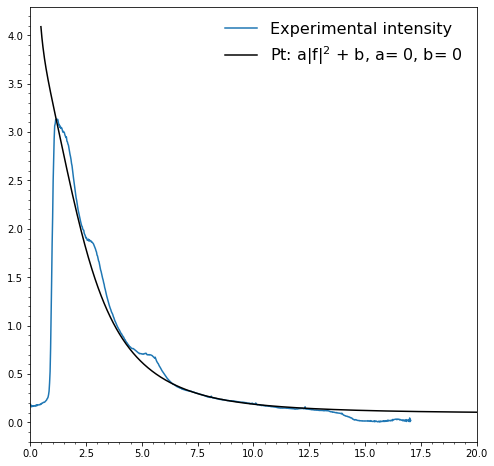

In [45]:
fig = plt.figure(
     facecolor = "white",
    figsize = (8,8)
)

base = popt[0]
alpha = popt[1]
plt.plot(coef*dist_vals, azimuthal_vals, label = 'Experimental intensity')

plt.plot(coef*dist_vals[20:], I_atom_f(coef*dist_vals[20:], base, alpha),
# plt.plot(Q, I_atom_alt_f(Q, base, alpha),

         color = 'k', 
         label = element_str + f': a|f|$^2$ + b, a= {int(alpha)}, b= {int(base)}')


# plt.plot(Q, 30*electron_form_factor(Q, element = 'Fe'))
plt.legend(frameon = False, fontsize = 16)
# plt.xlim(0,14)
# plt.ylim(400,900)

# fig.savefig('Carbon_e_form_factor.png', transparent = True)
# fig.savefig('C_e_form_factor.png', transparent = True)

# plt.figure(facecolor = "white",
#     figsize = (8,8))

# plt.plot(coef*dist_vals, norm)

plt.xlim(0,20)


### Creating Background images

In [46]:
dist_array = np.hypot(xcoord -  dif.centerpos[1], ycoord- dif.centerpos[0])

In [47]:
f_full_ring = interpolate.interp1d(coef*dist_vals, azimuthal_vals)

In [48]:
empty_img = np.zeros_like(dist_array)
empty_img2 = np.zeros_like(dist_array)

dr=1
maxdist = int(np.max(dist_vals))
for i, dist  in enumerate(range(dr, maxdist, dr)):
#     print(i)
#     print(dist)
    ring_mask = (dist_array >= (dist - dr)) * (dist_array <= dist)
    empty_img[ring_mask] = I_atom_f(dist*coef, base, alpha)
    empty_img2[ring_mask] = f_full_ring(dist*coef)
  


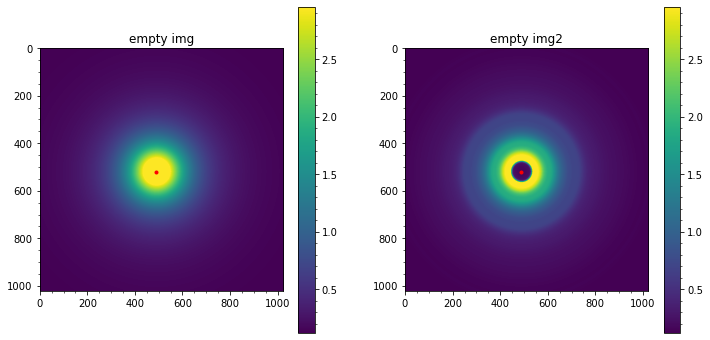

In [49]:
vmin = np.percentile(empty_img, 1)
vmax = np.percentile(empty_img, 99)

fig, [ax1, ax2] = plt.subplots(ncols =2, figsize = (12,6))
im0 = ax1.imshow(empty_img, vmin = vmin, vmax = vmax)
ax1.plot(dif.centerpos[0],dif.centerpos[1],'.', c='r' )
ax1.set_title('empty img')
plt.colorbar(im0, ax=ax1)

im1 = ax2.imshow(empty_img2, vmin = vmin, vmax = vmax)
ax2.plot(dif.centerpos[0],dif.centerpos[1],'.', c='r' )
ax2.set_title('empty img2')
plt.colorbar(im1, ax=ax2)


Text(0.5, 1.0, 'raw image - azimuthal integration \n (empty img2)')

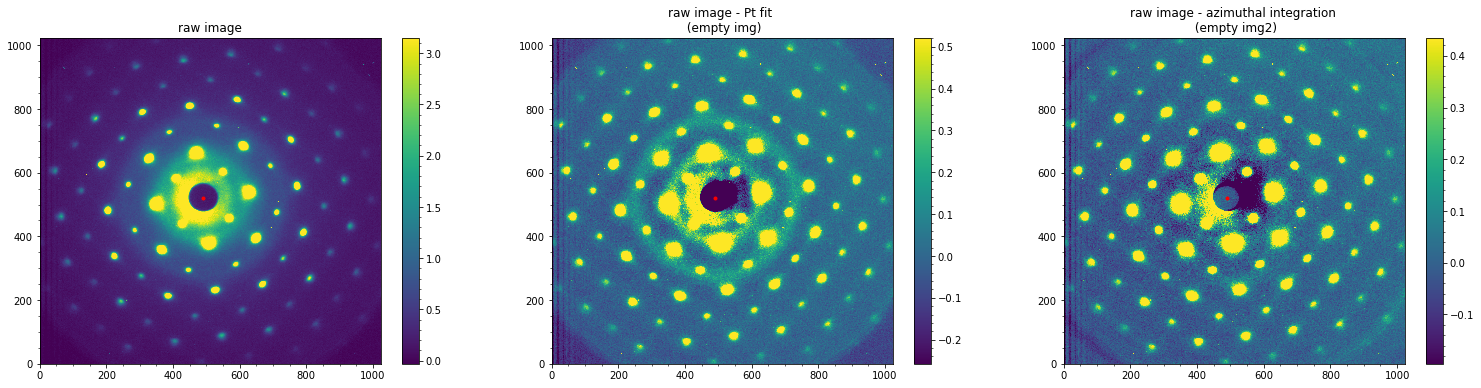

In [50]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols =3, figsize = (26,6))

vmin = np.percentile(dif.first_image - 0, 1)
vmax = np.percentile(dif.first_image - 0, 98)
im1 = ax1.pcolormesh(dif.first_image , vmin = vmin, vmax = vmax)
ax1.plot(dif.centerpos[0],dif.centerpos[1],'.', c='r' )
plt.colorbar(im1, ax=ax1)



vmin = np.percentile(dif.first_image - empty_img, 1)
vmax = np.percentile(dif.first_image - empty_img, 95)
im2 = ax2.pcolormesh(dif.first_image - empty_img , vmin = vmin, vmax = vmax)
ax2.plot(dif.centerpos[0],dif.centerpos[1],'.', c='r' )
plt.colorbar(im2, ax=ax2)



vmin = np.percentile((dif.first_image - empty_img2)[~np.isnan(dif.first_image - empty_img2)], 1)
vmax = np.percentile((dif.first_image - empty_img2)[~np.isnan(dif.first_image - empty_img2)], 95)

im3 = ax3.pcolormesh(dif.first_image - empty_img2 , vmin = vmin, vmax = vmax)
ax3.plot(dif.centerpos[0],dif.centerpos[1],'.', c='r' )
plt.colorbar(im3, ax=ax3)

ax1.set_title('raw image')

ax2.set_title('raw image - Pt fit \n (empty img)')
ax3.set_title('raw image - azimuthal integration \n (empty img2)')

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, '$\\AA^{-1}$')

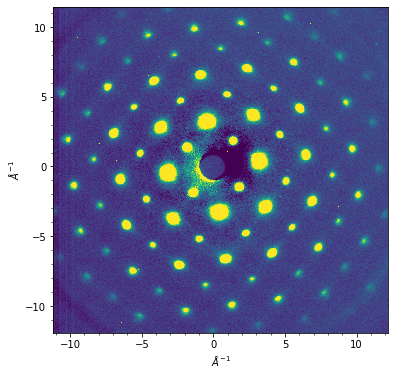

In [51]:
plt.figure(figsize = (6,6))
plt.pcolormesh(xx_A, yy_A, dif.first_image-empty_img2, vmin= vmin, vmax=vmax*2)
plt.xlabel(r'$\AA^{-1}$')
plt.ylabel(r'$\AA^{-1}$')

## Use backgrounds to analyse static data

In [52]:
dist_vals_bkg, azimuthal_vals_bkg = dif.azimuthal_average_DT(image = (dif.first_image - empty_img)*mask)

1448.1546878700494
[1.000e+00 2.000e+00 3.000e+00 ... 1.446e+03 1.447e+03 1.448e+03]


/cds/home/d/diegotur/UED/ued_dt3.py:903: RuntimeWarning: Mean of empty slice
  azimuthal_vals[i] = np.nanmean(image[mask])


In [53]:

sqrt_azimuthal_vals_bkg = np.sqrt(azimuthal_vals_bkg)
sqrt_azimuthal_vals_bkg[np.isnan(np.sqrt(azimuthal_vals_bkg))] = 0 

# Create function to get any value of Q 

# azimuthal_vals_bkg2 = azimuthal_vals_bkg
# azimuthal_vals_bkg[azimuthal_vals_bkg <= 0] = 0
# azimuthal_vals_bkg_intrp = interpolate.interp1d(coef*dist_vals_bkg, azimuthal_vals_bkg2 ) 
azimuthal_vals_bkg_intrp = interpolate.interp1d(coef*dist_vals_bkg, azimuthal_vals_bkg ) 
sqrt_azimuthal_vals_bkg_intrp = interpolate.interp1d(coef*dist_vals_bkg, sqrt_azimuthal_vals_bkg)


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


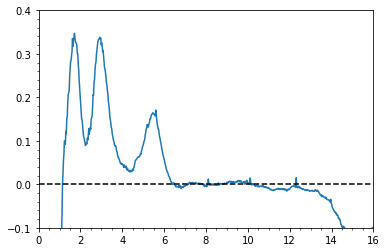

In [54]:
plt.figure()

plt.plot(coef*dist_vals_bkg, azimuthal_vals_bkg)

# plt.axvline(2*np.pi/FePt_c, ls='--', c='k')
# plt.axvline(np.sqrt((2*np.pi/FePt_a)**2 + (2*np.pi/FePt_c)**2), ls='--', c='k')
# plt.axvline(2*np.pi/FePt_a, ls='--', c='k')

plt.xlim(0,16)
# plt.axvline(2*np.pi/FePt_a)
plt.ylim(-.1,.4)
plt.axhline(0, c='k', ls= '--')

In [55]:
testx1 = dist_vals_bkg[45:700]#+dif.centerpos[0]
testy1 = 1000*azimuthal_vals_bkg[45:700] #+ dif.centerpos[1]

theta = np.pi/4
test_x2 = np.cos(theta) * testx1 - np.sin(theta) *testy1
test_y2 = np.sin(theta) * testx1 + np.cos(theta) *testy1

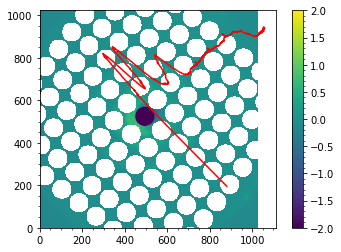

In [56]:
plt.figure()
plt.imshow(mask*(dif.first_image - empty_img), vmin = -2, vmax = 2, origin = 'lower')
# plt.plot(dist_vals_bkg[45:700]+dif.centerpos[0], azimuthal_vals_bkg[45:700] + dif.centerpos[1])
plt.plot(test_x2+dif.centerpos[0], test_y2+ dif.centerpos[1], color = 'red')
plt.colorbar()
# plt.close()

## Use empty image to subtract it from images and then re-fit Bragg peaks 

In [57]:
x = np.arange(dif.first_image.shape[0])
y = np.arange(dif.first_image.shape[1])

xx, yy = np.meshgrid(x,y)


# sel_corners = (
#     (y< ((100-0)/100)*x - 900) + (y< ((-100)/100)*x +150) + 
#     (y> ((100-0)/100)*x + 900) + (y> ((-100)/100)*x +900+900+140)
# )


image = dif.first_image

centers2 = np.zeros_like(allBragg_coord_2)

bragg_fits2 = np.zeros((10, 120, 7))
fit_erros2 = np.zeros((10, 120, 7,7))


for idx, j in enumerate(np.arange(0,max_frame,frame_step)):
    print(idx, j)
    image = dif.load_img(dif.fnames[sel_pre_t0[0][j:j+(frame_step-1)]])
#     image = ued_dt.despike(image)
#     image /= image[sel_corners].mean()
    image /= image[dif.donut_mask].mean()
    
    for i in np.arange(len(allBragg_names)//2):
    #     print(i)
        if sel_bragg_in_im[i]:
            
            ### ROI 1: 
            roi_1_lower_left = (allBragg_coord_2[i] - dif.roisize).astype(int)
            roi_1_upper_right = (allBragg_coord_2[i] + dif.roisize).astype(int)
            roi_1_selx  = np.arange(roi_1_lower_left[1],roi_1_upper_right[1])
            roi_1_sely =  np.arange(roi_1_lower_left[0],roi_1_upper_right[0])
            roi_1 = image[roi_1_selx,:][:,roi_1_sely]  - empty_img[roi_1_selx,:][:,roi_1_sely]
            vmin1 = np.percentile(roi_1, 5)
            vmax1 = np.percentile(roi_1, 95)

            ### ROI 2: 
            roi_2_lower_left = (allBragg_coord_2[::-1][i] - dif.roisize).astype(int)
            roi_2_upper_right = (allBragg_coord_2[::-1][i] + dif.roisize).astype(int)
            roi_2_selx  = np.arange(roi_2_lower_left[1],roi_2_upper_right[1])
            roi_2_sely =  np.arange(roi_2_lower_left[0],roi_2_upper_right[0])
            roi_2 = image[roi_2_selx,:][:,roi_2_sely]  - empty_img[roi_2_selx,:][:,roi_2_sely]
            vmin2 = np.percentile(roi_2, 5)
            vmax2 = np.percentile(roi_2, 95)

            ### Fit ROIs with a 2D gaussian: 
        #     def twoD_Gaussian(xx_yy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
            initial_guess_1 = (2,allBragg_coord_2[i][0],allBragg_coord_2[i][1],10,10,0,vmin1)
            xx_yy_1 = (xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely])
            popt_1, pcov_1 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_1, roi_1.ravel(), p0=initial_guess_1)

            initial_guess_2 = (2,allBragg_coord_2[::-1][i][0],allBragg_coord_2[::-1][i][1],10,10,0,vmin2)
            xx_yy_2 = (xx[roi_2_selx,:][:,roi_2_sely], yy[roi_2_selx,:][:,roi_2_sely])
            popt_2, pcov_2 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_2, roi_2.ravel(), p0=initial_guess_2)

            centers2[i]  = popt_1[1], popt_1[2]
            centers2[::-1][i] = popt_2[1], popt_2[2]
            
#             print(popt_1)

            bragg_fits2[idx][i] =popt_1
            bragg_fits2[idx][::-1][i] = popt_2
#             print(bragg_fits[idx][i])
            
            fit_erros2[idx][i] = pcov_1
            fit_erros2[idx][::-1][i] = pcov_2


        else:
    #         print(f'nay nb: {i} and {np.arange(120)[::-1][i]}')
            pass


0 0


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the s

Text(0.5, 1.0, 'image - empty_img2')

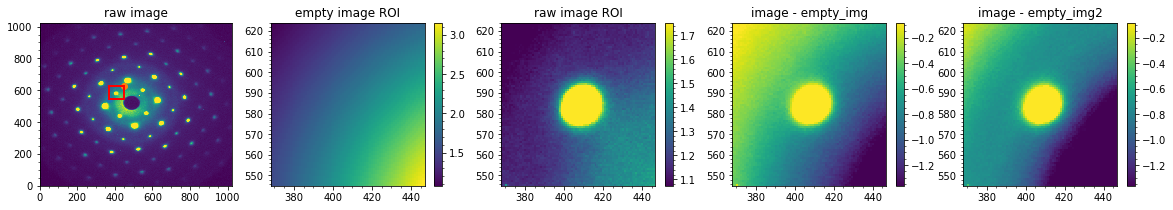

In [58]:
axs = []
fig, axs = plt.subplots(ncols = 5, figsize = (20,3))


vmin = np.percentile(dif.first_image, 1)
vmax = np.percentile(dif.first_image, 99)
rect = patch.Rectangle(roi_1_lower_left, (roi_1_upper_right-roi_1_lower_left)[0], (roi_1_upper_right-roi_1_lower_left)[1] ,
                      edgecolor = 'red',fill=False, lw=2 )
im4 = axs[0].pcolormesh(dif.first_image, vmin = vmin, vmax = vmax)
axs[0].scatter(roi_1_lower_left[0], roi_1_lower_left[1])
axs[0].scatter(roi_1_upper_right[0], roi_1_upper_right[1])
axs[0].add_patch(rect)
axs[0].set_title('raw image')


im0 = axs[1].pcolormesh(xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely], 
                        empty_img[roi_1_selx,:][:,roi_1_sely])
plt.colorbar(im0, ax=axs[1])
axs[1].set_title('empty image ROI')

vmin = np.percentile(image[roi_1_selx,:][:,roi_1_sely], 5)
vmax = np.percentile(image[roi_1_selx,:][:,roi_1_sely], 95)
im1 = axs[2].pcolormesh(xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely],
                        image[roi_1_selx,:][:,roi_1_sely], vmin= vmin, vmax = vmax)
plt.colorbar(im1, ax=axs[2])
axs[2].set_title('raw image ROI')

vmin = np.percentile(image[roi_1_selx,:][:,roi_1_sely] - empty_img[roi_1_selx,:][:,roi_1_sely], 5)
vmax = np.percentile(image[roi_1_selx,:][:,roi_1_sely] - empty_img[roi_1_selx,:][:,roi_1_sely], 95)
im2 = axs[3].pcolormesh(xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely],
                        image[roi_1_selx,:][:,roi_1_sely] - empty_img[roi_1_selx,:][:,roi_1_sely], vmin=vmin, vmax=vmax)
plt.colorbar(im2, ax=axs[3])
axs[3].set_title('image - empty_img')


im3 = axs[4].pcolormesh(xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely],
                        image[roi_1_selx,:][:,roi_1_sely] - empty_img2[roi_1_selx,:][:,roi_1_sely], vmin=vmin, vmax=vmax)
plt.colorbar(im3, ax=axs[4])
axs[4].set_title('image - empty_img2')


In [59]:
x = np.arange(dif.first_image.shape[0])
y = np.arange(dif.first_image.shape[1])
xx, yy = np.meshgrid(x,y)

bragg_fits3 = np.zeros((10, 120, 7))
fit_erros3 = np.zeros((10, 120, 7,7))

for idx, j in enumerate(np.arange(0,max_frame,frame_step)):
    print(idx, j)
    image = dif.load_img(dif.fnames[sel_pre_t0[0][j:j+(frame_step-1)]])
#     image = ued_dt.despike(image)
#     image /= image[sel_corners].mean()
    image /= image[dif.donut_mask].mean()

#     image = image - empty_img2
    
    for i in np.arange(len(allBragg_names)//2):
        if sel_bragg_in_im[i]:

            ### ROI 1: 
            roi_1_lower_left = (allBragg_coord_2[i] - dif.roisize).astype(int)
            roi_1_upper_right = (allBragg_coord_2[i] + dif.roisize).astype(int)
            roi_1_selx  = np.arange(roi_1_lower_left[1],roi_1_upper_right[1])
            roi_1_sely =  np.arange(roi_1_lower_left[0],roi_1_upper_right[0])
            roi_1 = image[roi_1_selx,:][:,roi_1_sely] - empty_img2[roi_1_selx,:][:,roi_1_sely]

            ### ROI 2: 
            roi_2_lower_left = (allBragg_coord_2[::-1][i] - dif.roisize).astype(int)
            roi_2_upper_right = (allBragg_coord_2[::-1][i] + dif.roisize).astype(int)
            roi_2_selx  = np.arange(roi_2_lower_left[1],roi_2_upper_right[1])
            roi_2_sely =  np.arange(roi_2_lower_left[0],roi_2_upper_right[0])
            roi_2 = image[roi_2_selx,:][:,roi_2_sely] - empty_img2[roi_2_selx,:][:,roi_2_sely]

            ### Fit ROIs with a 2D gaussian: 
        #     def twoD_Gaussian(xx_yy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
            initial_guess_1 = (2,allBragg_coord_2[i][0],allBragg_coord_2[i][1],10,10,0,0)
            xx_yy_1 = (xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely])
            popt_1, pcov_1 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_1, roi_1.ravel(), p0=initial_guess_1)

            initial_guess_2 = (2,allBragg_coord_2[::-1][i][0],allBragg_coord_2[::-1][i][1],10,10,0,0)
            xx_yy_2 = (xx[roi_2_selx,:][:,roi_2_sely], yy[roi_2_selx,:][:,roi_2_sely])
            popt_2, pcov_2 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_2, roi_2.ravel(), p0=initial_guess_2)
            
            bragg_fits3[idx][i] =popt_1
            bragg_fits3[idx][::-1][i] = popt_2
            
            fit_erros3[idx][i] = pcov_1
            fit_erros3[idx][::-1][i] = pcov_2

        else:
    #         print(f'nay nb: {i} and {np.arange(120)[::-1][i]}')
            pass


0 0


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the s

Text(0.5, 1.0, 'difference empty_img2')

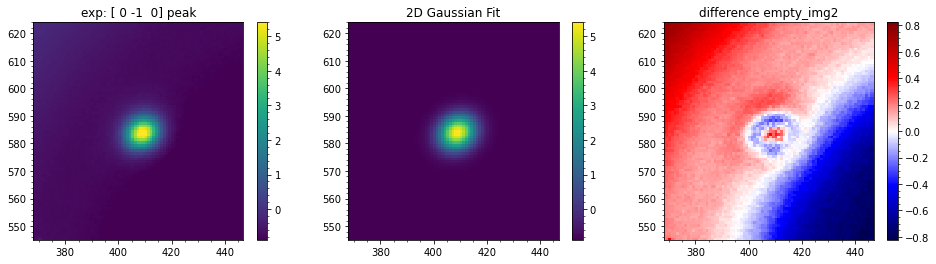

In [60]:
i=59
# i=6
# i=48
# print(sel_bragg_in_im[i])

image = dif.load_img(dif.fnames[sel_pre_t0[0][j:j+24]])
image = ued_dt.despike(image)
# image /= image[sel_corners].mean()
image = image 
image /= image[dif.donut_mask].mean()

roi_1_lower_left = (allBragg_coord_2[i] - dif.roisize).astype(int)
roi_1_upper_right = (allBragg_coord_2[i] + dif.roisize).astype(int)
roi_1_selx  = np.arange(roi_1_lower_left[1],roi_1_upper_right[1])
roi_1_sely =  np.arange(roi_1_lower_left[0],roi_1_upper_right[0])
roi_1 = image[roi_1_selx,:][:,roi_1_sely] - empty_img2[roi_1_selx,:][:,roi_1_sely]

xx_yy_1 = (xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely])

axs = []
fig, axs = plt.subplots(ncols= 3, figsize = (16/1.,4/1.))

gauss_img = ued_dt.Gaussian_2D1(xx_yy_1, *bragg_fits3[0][i]).reshape(80,80)

vmin = np.percentile(gauss_img, 0)
vmax = np.percentile(gauss_img, 100)

im0 = axs[0].pcolormesh(xx_yy_1[0], xx_yy_1[1],roi_1, vmin=vmin, vmax=vmax)
im1 = axs[1].pcolormesh(xx_yy_1[0], xx_yy_1[1], ued_dt.Gaussian_2D1(xx_yy_1, *bragg_fits3[0][i]).reshape(80,80), vmin=vmin, vmax=vmax )
# plt.colorbar(im0, ax=axs[1])


vmin = np.percentile(roi_1 - ued_dt.Gaussian_2D1(xx_yy_1, *bragg_fits3[0][i]).reshape(80,80), 0)
vmax = np.percentile(roi_1 - ued_dt.Gaussian_2D1(xx_yy_1, *bragg_fits3[0][i]).reshape(80,80), 100)
vmax = np.max((np.abs(vmin), vmax))

im2 = axs[2].pcolormesh(xx_yy_1[0], xx_yy_1[1],roi_1 - ued_dt.Gaussian_2D1(xx_yy_1, *bragg_fits3[0][i]).reshape(80,80),cmap='seismic', vmin=-vmax, vmax=vmax )

plt.colorbar(im0, ax=axs[0])
plt.colorbar(im1, ax=axs[1])
plt.colorbar(im2, ax=axs[2])


axs[0].set_title(f'exp: {allBragg_indices_2[i]} peak')
axs[1].set_title(f'2D Gaussian Fit')
axs[2].set_title(f'difference empty_img2')




### Check for image center drift with fitting results

use the bragg spot positions fitted with the 2D Gaussian to find the average center of the image.


In [61]:
i=3
avg_fit = (0.5*(bragg_fits2[i, ::-1, :] + bragg_fits2[i,:,:]))[sel_bragg_in_im][:-1]
test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))


cent_test2 = np.zeros((int(max_frame/frame_step),2))
for i in np.arange(int(max_frame/frame_step)):
    
    avg_fit = (0.5*(bragg_fits2[i, ::-1, :] + bragg_fits2[i,:,:]))[sel_bragg_in_im][:-1]
    test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))
    
    cent_test2[i] = avg_fit[test_sel, 1:3].mean(axis = 1)[0]

Text(0, 0.5, 'y pos (px)')

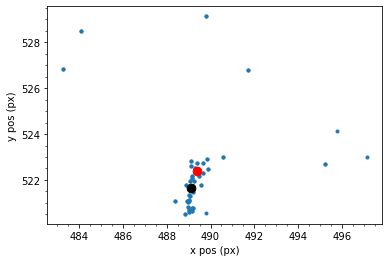

In [62]:

plt.figure()

# i=0
avg_fit = (0.5*(bragg_fits2[i, ::-1, :] + bragg_fits2[i,:,:]))[sel_bragg_in_im][:-1]
test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))

plt.plot(avg_fit[test_sel,1], 
            avg_fit[test_sel,2], '.', color=f'C{i}')
plt.scatter(cent_test2[i][0],cent_test2[i][1], color=f'r', s=75, zorder=100)
plt.scatter(dif.centerpos[0], dif.centerpos[1], color='k',zorder=100, s=75)

plt.xlabel('x pos (px)')
plt.ylabel('y pos (px)')

# Time Binning

## load data and actual binning

In [63]:
# takes a couple of minutes ... 

dif.i0_params = np.zeros((len(dif.fnames_I0),6))

for idx, fname_I0 in enumerate(dif.fnames_I0):
    dif.i0_params[idx] = ued_dt.load_and_fit_i0(fname_I0)


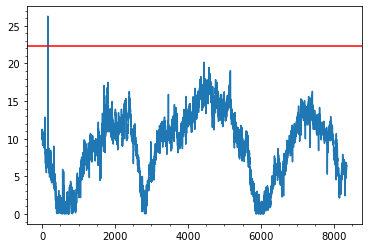

In [64]:
plt.figure()
plt.plot(np.sqrt( (dif.i0_params[:,1] - np.mean(dif.i0_params[:,1]))**2 + (dif.i0_params[:,2] - np.mean(dif.i0_params[:,2]))**2 ) )
plt.axhline(np.std(np.sqrt( (dif.i0_params[:,1] - np.mean(dif.i0_params[:,1]))**2 + (dif.i0_params[:,2] - np.mean(dif.i0_params[:,2]))**2 ))*5, c='r')

/cds/home/d/diegotur/UED/ued_dt3.py:505: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fnames_binned = np.array([self.fnames[sel_filter][sel] for sel in self.binmap])
/cds/home/d/diegotur/UED/ued_dt3.py:506: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  try: self.fnames_I0_binned = np.array([self.fnames_I0[sel_filter][sel] for sel in self.binmap])


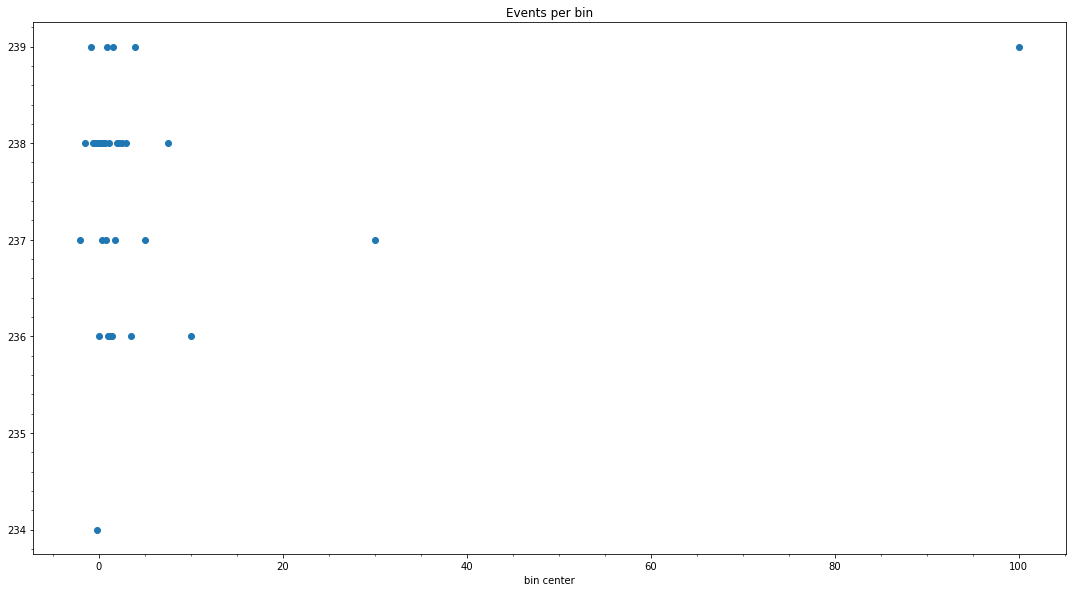

In [65]:
dif.bin_delays(precission=0.1, filter_with_i0 = True )

In [66]:
dif.bin_images()

Averaging diffraction images


  0%|          | 0/35 [00:00<?, ?it/s]

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


237
237

238
238

239
239

238
238

238
238

238
238

234
234

238
238

236
236

238
238

238
238

238
238

237
237

238
238

238
238

238
238

237
237

Fitting Failed!!!! for coords 550;604
maxshift acheived
/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan113/images-ANDOR1/ANDOR1_longDelay-028-273.21409450_0001.tif
239
238

Fitting Failed!!!! for coords 550;604
maxshift acheived
/cds/group/ued/data/ueduu0701/FePt/20190715/Run/20190715_0252//scan003/images-ANDOR1/ANDOR1_longDelay-013-273.19910500_0001.tif
236
235

238
238

236
236

236
236

239
239

237
237

238
238

238
238

238
238

238
238

236
236

239
239

237
237

238
238

236
236

237
237

239
239



# Time Resolved Analysis of Bragg Peaks

## Fit Braggs over time delays

In [67]:
tmp_hk = np.zeros((120,2))
for i in np.arange(len(allBragg_names)):
    tmp_h = 0
    counter = 0
    if allBragg_names[i][counter] == '-':
        tmp_h = -1*int(allBragg_names[i][counter+1])
        counter += 2
    else:
        tmp_h = int(allBragg_names[i][counter])
        counter += 1

    if allBragg_names[i][counter] == '-':
        tmp_k = -1*int(allBragg_names[i][counter+1])
        counter += 2
    else:
        tmp_k = int(allBragg_names[i][counter])
        counter += 1

    tmp_hk[i] = tmp_h, tmp_k

In [68]:
# %%timeit
# this loop takes 2s per scattering pattern 
#set xx and yy coordinate frame 

x = np.arange(dif.first_image.shape[0])
y = np.arange(dif.first_image.shape[1])

xx, yy = np.meshgrid(x,y)

image = dif.first_image

centers_binned_delays = np.zeros_like(allBragg_coord_2)

bragg_fits_binned_delays = np.zeros((len(dif.binned_images), 120, 7))
fit_erros_binned_delays = np.zeros((len(dif.binned_images), 120, 7,7))


for idx, j in enumerate(np.arange(len(dif.binned_images))):
    print(idx, j)
#     image = dif.load_img(dif.fnames[sel_pre_t0[0][j:j+24]])
    image = dif.binned_images[idx] - empty_img2
#     image = dif.binned_images[idx] - empty_img
        
#     image = ued_dt.despike(image)
#     image /= image[sel_corners].mean()


    for i in np.arange(len(allBragg_names)):
        if sel_bragg_in_im[i]:

            ### ROI 1: 
            roi_1_lower_left = (allBragg_coord_2[i] - dif.roisize).astype(int)
            roi_1_upper_right = (allBragg_coord_2[i] + dif.roisize).astype(int)
            roi_1_selx  = np.arange(roi_1_lower_left[1],roi_1_upper_right[1])
            roi_1_sely =  np.arange(roi_1_lower_left[0],roi_1_upper_right[0])
            roi_1 = image[roi_1_selx,:][:,roi_1_sely] #- empty_img[roi_1_selx,:][:,roi_1_sely]

            ### Fit ROIs with a 2D gaussian: 
            initial_guess_1 = (10,allBragg_coord_2[i][0],allBragg_coord_2[i][1],7.5,7.5,0,0)

            xx_yy_1 = (xx[roi_1_selx,:][:,roi_1_sely], yy[roi_1_selx,:][:,roi_1_sely])
            popt_1, pcov_1 = opt.curve_fit(ued_dt.Gaussian_2D1, xx_yy_1, roi_1.ravel(), p0=initial_guess_1)

            centers_binned_delays[i]  = popt_1[1], popt_1[2]
            bragg_fits_binned_delays[idx][i] =popt_1
            
            fit_erros_binned_delays[idx][i] = pcov_1


        else:
            pass

dif.bragg_fits_binned_delays = bragg_fits_binned_delays
dif.fit_erros_binned_delays = fit_erros_binned_delays
dif.centers_binned_delays = centers_binned_delays

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34


### Check how the center of the image shifts ... 

In [69]:
# errors to standard deviation

fit_erros_binned_delays_sigma= np.zeros((fit_erros_binned_delays.shape[0:-1]))
for idx, j in enumerate(np.arange(len(dif.binned_images))):
    for i in np.arange(len(allBragg_names)):
        if sel_bragg_in_im[i]:
            fit_erros_binned_delays_sigma[idx][i] = np.sqrt(np.diag(fit_erros_binned_delays[idx][i]))

error_fit_all_I_I0 = np.abs(bragg_fits_binned_delays / bragg_fits_binned_delays[0]) * np.sqrt(
    
    ((fit_erros_binned_delays_sigma / bragg_fits_binned_delays)**2) +  
    (fit_erros_binned_delays_sigma[0] / bragg_fits_binned_delays[0])**2

)






/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [70]:
error_fit_all_I_I0[5, 81][0]

0.001478499101412744

In [71]:
centers_time = np.zeros((len(dif.bincenters), 2))
centers_time_errors = np.zeros((len(dif.bincenters), 2))

for t_idx in range(len(dif.bincenters)):
    
    center_good_bragg_mask = copy.copy(sel_bragg_in_im)
    
    centers_tmp_x = 0.5*(bragg_fits_binned_delays[t_idx, :, 1][::-1] + bragg_fits_binned_delays[t_idx, :, 1])
    centers_tmp_x2 = centers_tmp_x[center_good_bragg_mask]
    
    errors_tmp_x = np.sqrt( 0.25*fit_erros_binned_delays_sigma[t_idx, :, 1][::-1]**2  + 0.25*fit_erros_binned_delays_sigma[t_idx, :, 1]**2 )
    errors_tmp_x2 = errors_tmp_x[center_good_bragg_mask]
    

    centers_tmp_y = 0.5*(bragg_fits_binned_delays[t_idx, :, 2][::-1] + bragg_fits_binned_delays[t_idx, :, 2])
    centers_tmp_y2 = centers_tmp_y[center_good_bragg_mask]
    
    errors_tmp_y = np.sqrt( 0.25*fit_erros_binned_delays_sigma[t_idx, :, 2][::-1]**2  + 0.25*fit_erros_binned_delays_sigma[t_idx, :, 2]**2 )
    errors_tmp_y2 = errors_tmp_y[center_good_bragg_mask]
    
    
    center_good_bragg_mask[np.where(centers_tmp_x < centers_tmp_x2.mean()*0.9)] = False
    center_good_bragg_mask[np.where(centers_tmp_y < centers_tmp_y2.mean()*0.9)] = False

    centers_tmp_x = centers_tmp_x[center_good_bragg_mask]
    centers_tmp_y = centers_tmp_y[center_good_bragg_mask]
    
    errors_tmp_x = errors_tmp_x[center_good_bragg_mask]
    errors_tmp_y = errors_tmp_y[center_good_bragg_mask]
    
    centers_time[t_idx] = np.asarray([centers_tmp_x.mean(), centers_tmp_y.mean()] )
    n = sum(center_good_bragg_mask)/2
    
    centers_time_errors[t_idx] = np.asarray([errors_tmp_x.mean(), errors_tmp_y.mean()])/np.sqrt(n)
#     centers_time_errors[t_idx] = np.asarray([np.std(centers_tmp_x), np.std(centers_tmp_y)])

dif.centerpos_time = centers_time
dif.centers_time_errors = centers_time_errors


(-2.0, 8.0)

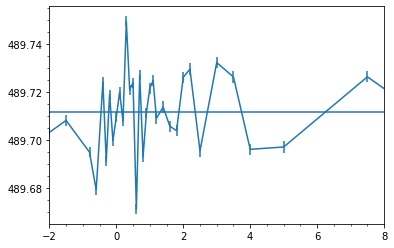

In [72]:
# center moving over time 
plt.errorbar(dif.bincenters, dif.centerpos_time[:,0], yerr =  dif.centers_time_errors[:,0] )
plt.axhline(dif.centerpos_time[:,0].mean())
plt.xlim(-2,8)

In [73]:
#code from the first fit... 

i=3
avg_fit = (0.5*(bragg_fits2[i, ::-1, :] + bragg_fits2[i,:,:]))[sel_bragg_in_im][:-1]
test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))


cent_test2 = np.zeros((int(max_frame/frame_step),2))
for i in np.arange(int(max_frame/frame_step)):
    
    avg_fit = (0.5*(bragg_fits2[i, ::-1, :] + bragg_fits2[i,:,:]))[sel_bragg_in_im][:-1]
    test_sel = np.where((avg_fit[:,2] != 0.)&(avg_fit[:,1] != 0.))
    
    cent_test2[i] = avg_fit[test_sel, 1:3].mean(axis = 1)[0]


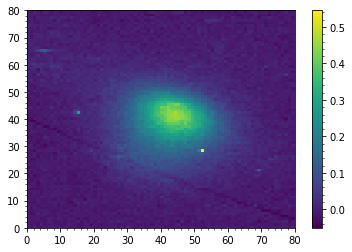

In [74]:
plt.figure()
plt.pcolormesh(roi_1)
plt.colorbar()

In [75]:
a_list =         np.zeros(bragg_fits_binned_delays[:,sel_bragg_in_im,1:3 ].shape[0:2])
a_list_errors =  np.zeros(bragg_fits_binned_delays[:,sel_bragg_in_im,1:3 ].shape[0:2])

for j in np.arange(len(a_list)):    
    for i in np.arange(len(a_list[0,:])):
        a_list[j][i] = dt.find_a(bragg_fits_binned_delays[j,sel_bragg_in_im,1:3 ][i], 
                            dif.centerpos_time[j],allBragg_indices_2[sel_bragg_in_im][i], coef=coef )
        
        a_list_errors[j][i] = dt.find_a_error(bragg_fits_binned_delays[j,sel_bragg_in_im,1:3 ][i], 
                                     dif.centerpos_time[j],allBragg_indices_2[sel_bragg_in_im][i], 
                                     
                                     dif.centers_time_errors[j],
                                     fit_erros_binned_delays_sigma[j,sel_bragg_in_im,1:3 ][i], 
                                     coef=coef )
dif.a_list = a_list
dif.a_list_errors = a_list_errors

In [76]:
q_list = np.zeros(bragg_fits_binned_delays[:,:,1:3 ].shape[0:2])
q_list_errors = np.zeros(bragg_fits_binned_delays[:,:,1:3 ].shape[0:2])

for j in np.arange(len(q_list)):    
    for i in np.arange(len(q_list[0,:])):
        q_list[j][i] = dt.find_q(bragg_fits_binned_delays[j,:,1:3 ][i], 
                            dif.centerpos_time[j], coef=coef )
        
        q_list_errors[j][i] = dt.find_q_error(bragg_fits_binned_delays[j,:,1:3 ][i], 
                                     dif.centerpos_time[j],
                                     
                                     dif.centers_time_errors[j],
                                     fit_erros_binned_delays_sigma[j,:,1:3 ][i], 
                                     coef=coef )
dif.q_list = q_list
dif.q_list_errors = q_list_errors

(-2.0, 8.0)

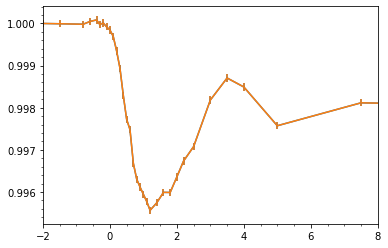

In [77]:
plt.figure()
plt.errorbar(dif.bincenters, q_list[:, 59]/q_list[:, 59][0], yerr = dt.norm_error(q_list[:, 59], q_list_errors[:,59]))
plt.errorbar(dif.bincenters, a_list[:, 40]/a_list[:, 40][0], yerr = dt.norm_error(a_list[:, 40], a_list_errors[:,40]))
plt.xlim(-2,8)

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


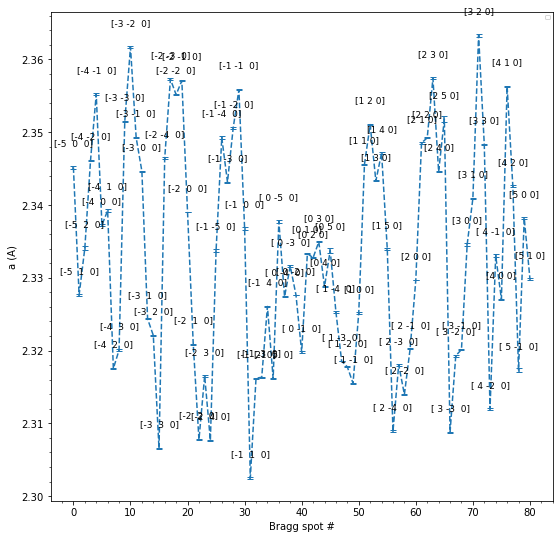

In [78]:
fig = plt.figure(figsize = (9,9))
cmap = plt.get_cmap('cool')
j=0
plt.errorbar(np.arange(len(a_list[j])), a_list[j], yerr=a_list_errors[j],ls='--', capsize=3)
for i, label in enumerate(allBragg_indices_2[sel_bragg_in_im]):
    plt.text(i, a_list[j][i]+0.003, label, fontsize=9, ha='center')

plt.xlabel('Bragg spot #')
plt.ylabel('a (A)')
plt.legend(ncol = 3, fontsize = 6 )

# fig.savefig('test_fig.eps')

In [79]:
2*np.pi/(a_list[0:4].mean())

2.6927850221745873

(0.0, 140.0)

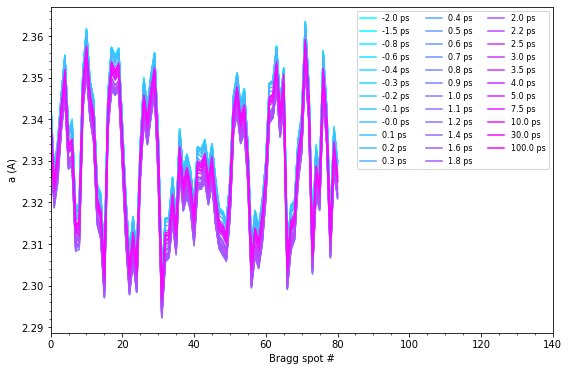

In [80]:
plt.figure(figsize = (9,6))
cmap = plt.get_cmap('cool')

for j in np.arange(len(a_list)):
    color = cmap(float(j)/len(a_list))
    plt.plot(a_list[j], 
             color = color,
             label = f'{np.round(dif.bincenters[j], 3)} ps')
plt.xlabel('Bragg spot #')
plt.ylabel('a (A)')
plt.legend(ncol = 3, fontsize = 8 )
plt.xlim(0, 140)

In [81]:
sorted_braggs = np.argsort(a_list[0])

<ErrorbarContainer object of 3 artists>

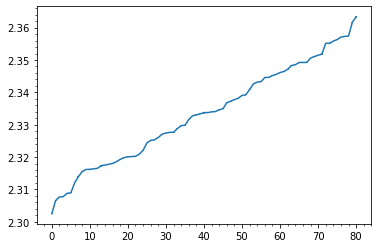

In [82]:
plt.figure()
plt.errorbar(np.arange(len(a_list[0][sorted_braggs])),a_list[0][sorted_braggs],  a_list_errors[0][sorted_braggs])


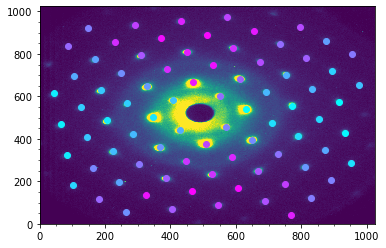

In [83]:
vmin = np.percentile(dif.first_image, 5)
vmax = np.percentile(dif.first_image, 98)
cmap = plt.get_cmap('cool')


plt.figure()
plt.pcolormesh(dif.first_image,vmin=vmin, vmax=vmax)
for i, pos in enumerate(allBragg_coord_2[sel_bragg_in_im][sorted_braggs]):
    color = cmap(float(i)/len(allBragg_coord_2[sel_bragg_in_im][sorted_braggs]))
    plt.scatter(pos[0], pos[1], color=color, label = f'{i} st')

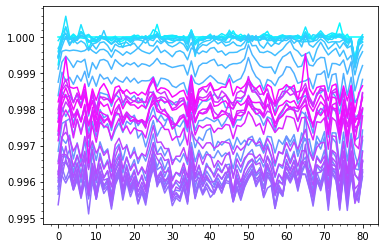

In [84]:
plt.figure()
for j in np.arange(len(a_list)):   
    color = cmap(float(j)/len(a_list))
    plt.plot(a_list[j]/a_list[0], c= color)

In [85]:
sel_pret0 = dif.bincenters < -0.5

In [86]:
a_list_norm_errors = np.zeros_like(a_list)
for i in range(a_list_norm_errors.shape[1]):
    a_list_norm_errors[:,i] = dt.norm_error(a_list[:,i], a_list_errors[:,i])
a_list_mean_norm_errors = np.sqrt( np.sum((a_list_norm_errors/a_list_norm_errors.shape[1])**2, axis =1) )

(-2.5, 20.0)

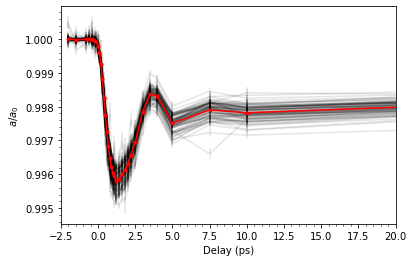

In [87]:
plt.figure()
for i in np.arange(a_list[0,:].shape[0]):

    pass

    plt.errorbar(
        dif.bincenters,
        a_list[:,i]/a_list[sel_pret0,i].mean(), yerr=a_list_norm_errors[:,i], color='k', alpha=0.1,  label='')
    

plt.errorbar(dif.bincenters,np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='', color = 'red',zorder=np.inf)

plt.xlabel('Delay (ps)')
plt.ylabel('$a/a_0$')
plt.xlim(-2.5,20)


In [88]:
igor_bragg_list = [
    [0,-1,0],
#     [0,1,0],
    [1,1,0],
    [2,0,0],
    [2,1,0],
    [2,2,0],
    [3,0,0],
#     [4,0,0],

#     [2,2,0],
#     [3,0,0],
#     [3,1,0],
#     [3,2,0],
#     [4,0,0],
#     [4,1,0],
#     [3,3,0]
]


## Position and Amplitude of different Braggs over time

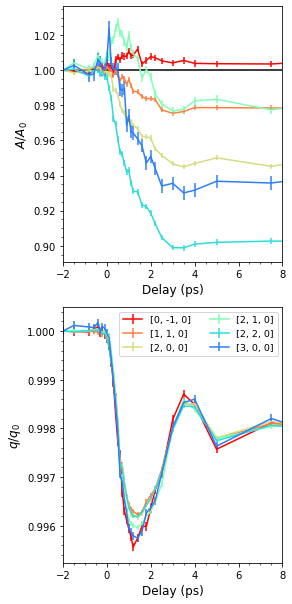

In [89]:
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize = (5/1.2, 10.2/1.2))
# fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize = (5/1.2/3, 10.2/1.2))

cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    fits = bragg_fits_binned_delays[:,sel_bragg,:]    
    fit_errors = fit_erros_binned_delays_sigma[:,sel_bragg,:] 
    
    q = q_list[:,sel_bragg][:,0]
    q_error = q_list_errors[:,sel_bragg][:,0]
    
    I_tmp = fits[:,0,0]
    I_tmp_error = fit_errors[:,0,0]
    
    I_tmp_norm = I_tmp/I_tmp[0]
    I_tmp_norm_error = dt.norm_error(I_tmp, I_tmp_error) 
    
    q_norm = q/q[0]
    q_norm_error = dt.norm_error(q, q_error) 

    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    
    ax1.errorbar(dif.bincenters, I_tmp_norm,yerr=I_tmp_norm_error,ls='-', color = color, label = bragg)    
    ax2.errorbar(dif.bincenters, q_norm, yerr=1*q_norm_error, ls='-',  color = color, label = bragg)
    
ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$A/A_0$', fontsize = 12)
# ax1.legend(fontsize = 12)
ax1.set_xlim(-2,8)
# ax1.set_xlim(8, 100)



ax2.set_xlabel('Delay (ps)', fontsize = 12)
ax2.set_ylabel('$q/q_0$', fontsize = 12)
ax2.legend(ncol = 2, fontsize = 9.5)
ax1.axhline(1, c='k')
ax2.set_xlim(-2,8)
# ax2.set_xlim(8, 100)

plt.tight_layout()

# fig.savefig('paper_figs_tmp/peak_dynamics', dpi = 300)

#### Other parameters of the Fit 

(-2.0, 8.0)

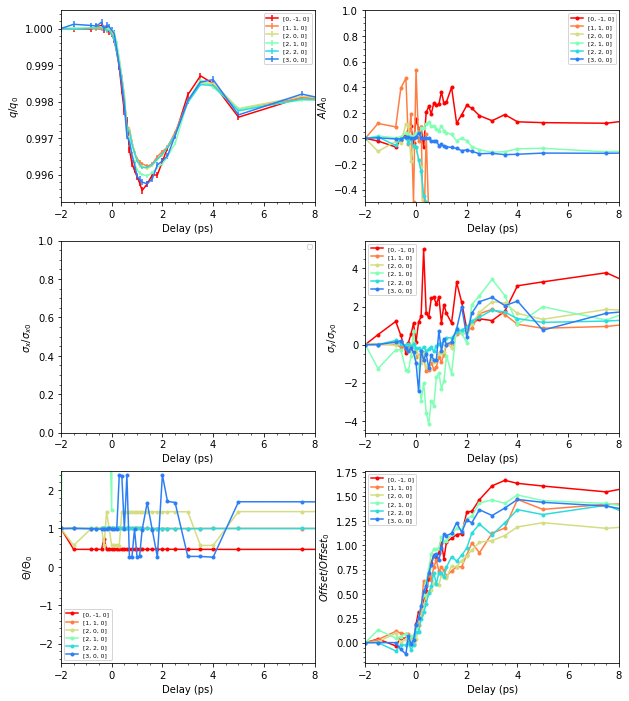

In [90]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(ncols = 2,nrows = 3, figsize = (10/1.0,12/1.0))
cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    
    fits = bragg_fits_binned_delays[:,sel_bragg,:]    
    fit_errors = fit_erros_binned_delays_sigma[:,sel_bragg,:]  
    
    q = q_list[:,sel_bragg][:,0]
    q_error = q_list_errors[:,sel_bragg][:,0]
    
    I_tmp = fits[:,0,0]
    I_tmp_error = fit_errors[:,0,0]
    
    I_tmp_norm = I_tmp/I_tmp[0]
    I_tmp_norm_error = dt.norm_error(I_tmp, I_tmp_error) 
    
    q_norm = q/q[0]
    q_norm_error = dt.norm_error(q, q_error) 
    
    
    
#     fits = bragg_fits_binned_delays[:,sel_bragg,:]
# #     q = np.sqrt((fits[:,0,1] - dif.centerpos[0])**2 + (fits[:,0,2] - dif.centerpos[1])**2)
#     q = np.sqrt((fits[:,0,1] - dif.centerpos_time[:,0])**2 + (fits[:,0,2] - dif.centerpos_time[:,1])**2)
    
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    
    
    ax2.plot(dif.bincenters, fits[:,0,0]-fits[:,0,0][0], '.-', color = color, label = bragg)
#     ax1.plot(dif.bincenters, fits[:,0,0], '.-', color = color, label = bragg)

#     ax3.plot(dif.bincenters, np.abs(fits[:,0,3])/np.abs(fits[:,0,3][0]), '.-', color = color, label = bragg)
#     ax4.plot(dif.bincenters, np.abs(fits[:,0,4])/np.abs(fits[:,0,4][0]), '.-', color = color, label = bragg)
    ax4.plot(dif.bincenters, ((fits[:,0,4]*fits[:,0,3])-(fits[:,0,4][0]*fits[:,0,3][0]))/((fits[:,0,4]*fits[:,0,3])-(fits[:,0,4][0]*fits[:,0,3][0]))[-1], '.-', color = color, label = bragg)

    
    ax5.plot(dif.bincenters, np.mod(fits[:,0,5], 2*np.pi)/np.mod(fits[:,0,5][0], 2*np.pi), '.-', color = color, label = bragg)
#     ax5.plot(dif.bincenters, fits[:,0,5]-fits[:,0,5][0], '.-', color = color, label = bragg)

    ax6.plot(dif.bincenters, (fits[:,0,6]-fits[:,0,6][0])/(fits[:,0,6]-fits[:,0,6][0])[-1], '.-', color = color, label = bragg)
#     ax6.plot(dif.bincenters, fits[:,0,6]-fits[:,0,6][0], '.-', color = color, label = bragg)


#     ax1.plot(dif.bincenters, q_norm, '.-', color = color, label = bragg)
    ax1.errorbar(dif.bincenters, q_norm, yerr=q_norm_error, color = color, label = bragg)
    
ax2.set_xlabel('Delay (ps)')
ax2.set_ylabel('$A/A_0$')
ax2.legend(fontsize = 6)
ax2.set_xlim(-2,8)
ax2.set_ylim(-0.5,1)


ax1.set_xlabel('Delay (ps)')
ax1.set_ylabel('$q/q_0$')
ax1.legend(fontsize = 6)
ax1.set_xlim(-2,8)



ax3.set_xlabel('Delay (ps)')
ax3.set_ylabel('$\sigma_x / \sigma_{x0}$')
ax3.legend(fontsize = 6)
ax3.set_xlim(-2,8)

ax4.set_xlabel('Delay (ps)')
ax4.set_ylabel('$\sigma_y / \sigma_{y0}$')
ax4.legend(fontsize = 6)
ax4.set_xlim(-2,8)
# ax4.set_ylim(0.98,1.02)


ax5.set_xlabel('Delay (ps)')
ax5.set_ylabel('$ \Theta / \Theta_0 $')
ax5.legend(fontsize = 6)
ax5.set_xlim(-2,8)
# ax5.set_ylim(-1/5,1/5)
ax5.set_ylim(-2.5,2.5)

ax6.set_xlabel('Delay (ps)')
ax6.set_ylabel('$Offset / Offset_0$')
ax6.legend(fontsize = 6)
# ax6.set_ylim(0.75,2)

ax6.set_xlim(-2,8)



Text(0.5, 1.0, 'Area of Bragg')

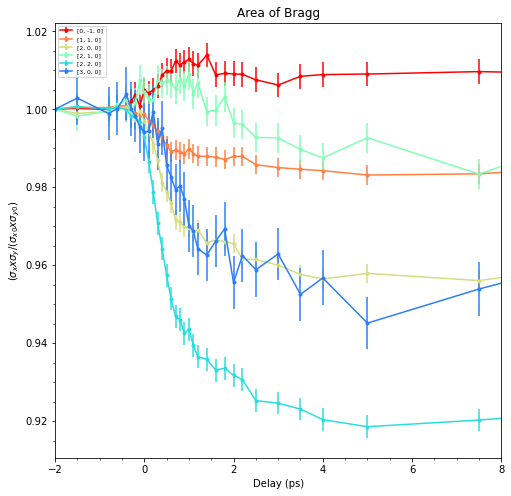

In [91]:
fig, ax = plt.subplots(figsize = (8,8))
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    
    fits = bragg_fits_binned_delays[:,sel_bragg,:]    
    fit_errors = fit_erros_binned_delays_sigma[:,sel_bragg,:]  
    
    I_tmp = fits[:,0,0]
    I_tmp_error = fit_errors[:,0,0]
    
    I_tmp_norm = I_tmp/I_tmp[0]
    I_tmp_norm_error = dt.norm_error(I_tmp, I_tmp_error) 
    
    bragg_pos_tmp = fits[:,0,1:3]
    bragg_pos_error_tmp = fit_erros_binned_delays_sigma[:,0,1:3]
    
    I_vol_tmp = fits[:,0,0]*fits[:,0,4]*fits[:,0,3]
    I_vol_err_tmp = np.abs(I_vol_tmp)*np.sqrt( (fit_errors[:,0,0]/fits[:,0,0])**2 + (fit_errors[:,0,3]/fits[:,0,3])**2 + (fit_errors[:,0,4]/fits[:,0,4])**2 )
    
    
#     q = find_q(bragg_pos_tmp.T, dif.centerpos_time.T, coef=coef)
#     q_error = find_q_error(bragg_pos_tmp.T, dif.centerpos_time.T, dif.centers_time_errors.T, bragg_pos_error_tmp.T, coef = coef)
    
#     q_norm = q/q[0]
#     q_norm_error = norm_error(q, q_error) 
    
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    ax.errorbar(dif.bincenters, I_vol_tmp/I_vol_tmp[0], yerr=dt.norm_error(I_vol_tmp, I_vol_err_tmp) ,marker='.',  color = color, label = bragg)


ax.set_xlabel('Delay (ps)')
ax.set_ylabel('$ (\sigma_x x \sigma_y / ( \sigma_{x0} x \sigma_{y0} )$')
ax.legend(fontsize = 6)
ax.set_xlim(-2,8)
ax.set_title('Area of Bragg')

## Create a symetrised dataset for better SNR by exploiting symmetry

In [92]:
# imp.reload(I_UED_dt)

In [93]:
# create vectors where to put the info


bragg_fits_simetrised = np.zeros_like(bragg_fits_binned_delays)## all values are legit exept the position that will probably avg to zero ... 
                                                               #should make something for that at some point I guess
    
bragg_fits_simetrised_q = np.zeros((bragg_fits_binned_delays.shape[0],bragg_fits_binned_delays.shape[1]) )
bragg_fits_simetrised_areas = np.zeros((bragg_fits_binned_delays.shape[0],bragg_fits_binned_delays.shape[1]) )
nb_of_eqivalent_braggs = np.zeros(len(allBragg_indices_2))

q_vecs = copy.copy(q_list) #np.zeros((len(dif.bincenters), bragg_fits_binned_delays.shape[1]))
bragg_areas = np.zeros((len(dif.bincenters), bragg_fits_binned_delays.shape[1]))


bragg_fits_simetrised_errors = np.zeros_like(bragg_fits_simetrised )

bragg_fits_simetrised_q_errors = np.zeros_like(bragg_fits_simetrised_q )
bragg_fits_simetrised_areas_errors = np.zeros_like(bragg_fits_simetrised_areas )
nb_of_eqivalent_braggs_errors = np.zeros_like(nb_of_eqivalent_braggs )

q_vecs_errors = copy.copy(q_list_errors)
bragg_areas_errors = np.zeros_like(bragg_areas )

#this is a first loop where I only need to loop over time
# with this I can write bargg areas and Bragg erros... turned out not to be so necessary in the end 
for t_idx in range(len(dif.bincenters)):
#     q_vecs[t_idx] = coef*np.sqrt((bragg_fits_binned_delays[t_idx,:,1] - dif.centerpos_time[t_idx,0])**2 + (bragg_fits_binned_delays[t_idx,:,2] - dif.centerpos_time[t_idx,1])**2)
    bragg_areas[t_idx] = bragg_fits_binned_delays[t_idx,:,3]*bragg_fits_binned_delays[t_idx,:,4]
    bragg_areas_errors[t_idx] = np.sqrt( bragg_areas[t_idx]*( (fit_erros_binned_delays_sigma[t_idx,:,3]/bragg_fits_binned_delays[t_idx,:,3])**2 +
                                                             (fit_erros_binned_delays_sigma[t_idx,:,4]/bragg_fits_binned_delays[t_idx,:,4])**2 ) )

# Here is where I save symmetrised peaks, the information here is still degenerated, but it's useful to work with older functions
for i in range(120):
    h,k,l = allBragg_indices_2[i]
    idx_list = I_UED_dt.select_braggs_Bragg(h,k, allBragg_indices_2)
    nb_of_eqivalent_braggs[i] = np.unique(idx_list).shape[0]
    
    bragg_fits_simetrised[:,i] = bragg_fits_binned_delays[:,idx_list].mean(axis = 1)
    bragg_fits_simetrised_q[:,i] = q_vecs[:, idx_list].mean(axis = 1)   
    bragg_fits_simetrised_areas[:,i] = bragg_areas[:, idx_list].mean(axis = 1)   

    bragg_fits_simetrised_errors[:,i] = fit_erros_binned_delays_sigma[:,idx_list].mean(axis = 1)/np.sqrt(nb_of_eqivalent_braggs[i])
    bragg_fits_simetrised_q_errors[:,i] = q_vecs_errors[:, idx_list].mean(axis = 1) /np.sqrt(nb_of_eqivalent_braggs[i])
    bragg_fits_simetrised_areas_errors[:,i] = bragg_areas_errors[:, idx_list].mean(axis = 1) /np.sqrt(nb_of_eqivalent_braggs[i])   
    
# Save info to dif container
dif.bragg_fits_simetrised  = bragg_fits_simetrised
dif.bragg_fits_simetrised_q = bragg_fits_simetrised_q
dif.bragg_fits_simetrised_areas = bragg_fits_simetrised_areas
dif.bragg_fits_simetrised_errors = bragg_fits_simetrised_errors
dif.bragg_fits_simetrised_q_errors = bragg_fits_simetrised_q_errors
dif.bragg_fits_simetrised_areas_errors = bragg_fits_simetrised_areas_errors

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


### Here I create a compact array, where I only keep 1 Bragg spot value from all of the symmetric ones 

In [94]:
tmp_idx_arr = np.arange(120)
tmp_idx_arr2 = np.arange(120)

already_done = np.array([])
compact = np.array([ bragg_fits_simetrised[:,0,:] ])
compact_errors = np.array([ bragg_fits_simetrised[:,0,:] ])

q_symmetrised_compact = np.array([ bragg_fits_simetrised_q[:,0] ])
q_symmetrised_compact_errors = np.array([ bragg_fits_simetrised_q[:,0] ])

areas_symmetrised_compact = np.array([ bragg_fits_simetrised_q[:,0] ])
areas_symmetrised_compact_errors = np.array([ bragg_fits_simetrised_q[:,0] ])

compact_hkl = np.array([(0,0)])

count = 0 

for i in tmp_idx_arr:
    
    h,k,l = allBragg_indices_2[i]
    idxs = np.unique(I_UED_dt.select_braggs_Bragg(h,k, allBragg_indices_2) )
    
    if (idxs[0] not in already_done):
        already_done = np.append(already_done, idxs)
        compact_hkl =  np.append(compact_hkl, [[h,k]],axis = 0 )
        
        q_symmetrised_compact = np.append(q_symmetrised_compact, [bragg_fits_simetrised_q[:,i]], axis = 0)
        q_symmetrised_compact_errors = np.append(q_symmetrised_compact_errors, [bragg_fits_simetrised_q_errors[:,i]], axis = 0)
        
        areas_symmetrised_compact = np.append(areas_symmetrised_compact, [bragg_fits_simetrised_areas[:,i]], axis = 0)
        areas_symmetrised_compact_errors = np.append(areas_symmetrised_compact_errors, [bragg_fits_simetrised_areas_errors[:,i]], axis = 0)
        
        compact = np.append(compact, [bragg_fits_simetrised[:,i,:]], axis = 0 )
        compact_errors = np.append(compact_errors, [bragg_fits_simetrised_errors[:,i,:]], axis = 0 )
        count += 1
        
        
compact_hkl= compact_hkl[1:]*(-1)  

q_symmetrised_compact = q_symmetrised_compact[1:]
q_symmetrised_compact_errors = q_symmetrised_compact_errors[1:]

areas_symmetrised_compact = areas_symmetrised_compact[1:]
areas_symmetrised_compact_errors = areas_symmetrised_compact_errors[1:]

compact = compact[1:]
compact_errors = compact_errors[1:]

# And now we save into the dif container again


dif.compact_hkl = compact_hkl
dif.q_symmetrised_compact = q_symmetrised_compact
dif.q_symmetrised_compact_errors = q_symmetrised_compact_errors
dif.areas_symmetrised_compact = areas_symmetrised_compact
dif.areas_symmetrised_compact_errors = areas_symmetrised_compact_errors
dif.compact = compact
dif.compact_errors  = compact_errors



In [95]:
As = compact[:,:,0]*compact[:,:,3]*compact[:,:,4]
As2 = compact[:,:,0]*areas_symmetrised_compact


As_errors = np.abs(As)*np.sqrt( (compact_errors[:,:,0]/compact[:,:,0])**2 + (compact_errors[:,:,3]/compact[:,:,3])**2 + (compact_errors[:,:,4]/compact[:,:,4])**2 )
As2_errors = np.abs(As2)*np.sqrt( (compact_errors[:,:,0]/compact[:,:,0])**2 + (areas_symmetrised_compact_errors/areas_symmetrised_compact)**2 )

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


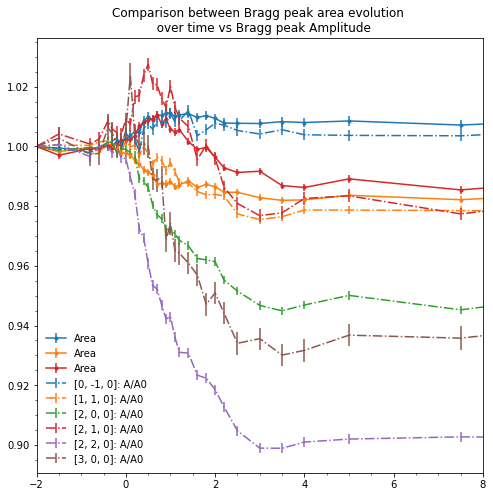

In [96]:
plt.figure(figsize = (8,8))
plt.errorbar(dif.bincenters, As[19]/As[19,0],yerr = dt.norm_error(As[19], As_errors[19]), marker ='.', c='C0', label = 'Area')
plt.errorbar(dif.bincenters, As[18]/As[18,0],yerr = dt.norm_error(As[18], As_errors[18]), marker ='.', c='C1', label = 'Area')
# plt.errorbar(dif.bincenters, As[17]/As[17,0],yerr = dt.norm_error(As[17], As_errors[17]), marker ='.', c='C2', label = 'Area')
plt.errorbar(dif.bincenters, As[16]/As[16,0],yerr = dt.norm_error(As[16], As_errors[16]), marker ='.', c='C3', label = 'Area')

for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    sel_bragg_sym = (compact_hkl[:,0] == bragg[0])&(compact_hkl[:,1] == bragg[1])
    
    fits = compact[sel_bragg_sym]
    fit_errors = compact_errors[sel_bragg_sym]
    
    fits = np.swapaxes(fits,0,1)
    fit_errors = np.swapaxes(fit_errors,0,1)
    
    fits = bragg_fits_binned_delays[:,sel_bragg,:]    
    fit_errors = fit_erros_binned_delays_sigma[:,sel_bragg,:]  
    
    I_tmp = fits[:,0,0]
    I_tmp_error = fit_errors[:,0,0]
    
    I_tmp_norm = I_tmp/I_tmp[0]
    I_tmp_norm_error = dt.norm_error(I_tmp, I_tmp_error) 
    
    bragg_pos_tmp = fits[:,0,1:3]
    bragg_pos_error_tmp = fit_erros_binned_delays_sigma[:,0,1:3]
    
    I_vol_tmp = fits[:,0,0]*fits[:,0,4]*fits[:,0,3]
    I_vol_err_tmp = np.abs(I_vol_tmp)*np.sqrt( (fit_errors[:,0,0]/fits[:,0,0])**2 + (fit_errors[:,0,3]/fits[:,0,3])**2 + (fit_errors[:,0,4]/fits[:,0,4])**2 )
    
    color = f'C{j}'
#     cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    plt.errorbar(dif.bincenters, I_tmp/I_tmp[0], yerr=dt.norm_error(I_tmp, I_tmp_error) ,ls='-.',  color = color, label = str(bragg) + ': A/A0' )


plt.xlim(-2,8)
plt.title('Comparison between Bragg peak area evolution \n  over time vs Bragg peak Amplitude')
plt.legend(frameon = False)

\## Alternative DW study: trying to measure the B factors of Pt and Fe 

Taken from Warrens book example of Chapter 5

In [97]:
print(np.asarray(compact_hkl).shape )
print(np.asarray(q_symmetrised_compact).shape )
print(np.asarray(areas_symmetrised_compact).shape )

(20, 2)
(20, 35)
(20, 35)


# Debye Waller Factor Analysis

## Load and plot Jakub's and Pablo's DW factors

In [98]:
q_25_00_00=np.asarray([2.5, 0, 0]) #rlu
dw_25_00_00 = pd.read_csv(
    '/cds/home/d/diegotur/UED/FePt/ext_data/DWF_2-5_0-0_0-0.out',
delimiter='   ',)
data_25_00_00=dict()
data_25_00_00['data'] = dw_25_00_00
data_25_00_00['q'] = q_25_00_00


data_dict = dict()
data_dict[0] = data_25_00_00


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


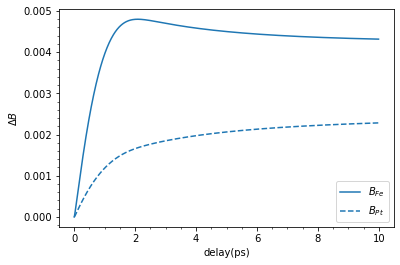

In [99]:
plt.figure(facecolor = 'white')

i=0
plt.plot(np.arange(1000)/100,
         data_dict[i]['data']['Unnamed: 3']/np.linalg.norm(data_dict[i]['q'])**2 - (data_dict[i]['data']['Unnamed: 3']/np.linalg.norm(data_dict[i]['q'])**2)[0], 
         c=f'C{i}', ls='-', label = r'$B_{Fe}$')
plt.plot( np.arange(1000)/100,
         data_dict[i]['data']['Unnamed: 5']/np.linalg.norm(data_dict[i]['q'])**2 - (data_dict[i]['data']['Unnamed: 5']/np.linalg.norm(data_dict[i]['q'])**2)[0],
         c=f'C{i}', ls='--', label = '$B_{Pt}$')
plt.xlabel('delay(ps)')
plt.ylabel(r'$\Delta B$')
plt.legend()

## Use the "Warren method" to get B factors by fitting slopes

In [100]:
a1_t = np.zeros(35)
a2_t = np.zeros(35)

b1_t = np.zeros(35)
b2_t = np.zeros(35)

for i in np.arange(35):
    
    amps_t0 = compact[:,i,0]
    amps_t0_error = compact_errors[:,i,0]
#     print(compact_errors[:,i,0].shape)
# 
#     amps_t0 = As2[:,i] # with integrated intensities over the whole bragg peak
#     amps_t0_error = As2_errors[:,i]
    
#     amps_t0 = As[:,i] # with integrated intensities over the whole bragg peak
#     amps_t0_error = As_errors[:,i]

    q_vecs_t0 = q_symmetrised_compact[:,i]
    q_vecs_t0_error = q_symmetrised_compact_errors[:,i]
    
    amps_t_corrected = (np.sqrt(amps_t0 + azimuthal_vals_bkg_intrp(q_vecs_t0)) - sqrt_azimuthal_vals_bkg_intrp(q_vecs_t0))**2
#     amps_t_corrected = amps_t0

#     amps_t_corrected_sqrt = amps_t_corrected#np.sqrt(amps_t_corrected)
#     amps_t_corrected_sqrt_errors = amps_t0_error#amps_t_corrected_sqrt * np.sqrt((amps_t0_error/(2*amps_t_corrected))**2)
    amps_t_corrected_sqrt = np.sqrt(amps_t_corrected)
    amps_t_corrected_sqrt_errors = amps_t_corrected_sqrt * np.sqrt((amps_t0_error/(2*amps_t_corrected))**2)
    
    sel_even = np.sum(np.asarray(compact_hkl), axis = 1) %2 == 0
    sel_odd =  np.sum(np.asarray(compact_hkl), axis = 1) %2 == 1

    sel_even_not_nan = ~np.isnan(np.sqrt(amps_t_corrected[sel_even]))&(amps_t_corrected[sel_even]  !=0 )
    sel_odd_not_nan =  ~np.isnan(np.sqrt(amps_t_corrected[sel_odd ]))

    test_q_array = np.arange(np.min(q_vecs_t0), np.max(q_vecs_t0), 0.1)
    even_sorted_args = np.argsort(q_vecs_t0[sel_even][sel_even_not_nan])
    odd_sorted_args  = np.argsort(q_vecs_t0[sel_odd ][sel_odd_not_nan ])

    
    spl_Warren_Q_even = interpolate.splrep(q_vecs_t0[sel_even][sel_even_not_nan][even_sorted_args], 
                                           amps_t_corrected_sqrt[sel_even][sel_even_not_nan][even_sorted_args], 
                                           k =2 )
    spl_Warren_Q_even_high = interpolate.splrep(q_vecs_t0[sel_even][sel_even_not_nan][even_sorted_args], 
                                           (amps_t_corrected_sqrt+amps_t_corrected_sqrt_errors)[sel_even][sel_even_not_nan][even_sorted_args], 
                                           k =2 )
    spl_Warren_Q_even_low = interpolate.splrep(q_vecs_t0[sel_even][sel_even_not_nan][even_sorted_args], 
                                           (amps_t_corrected_sqrt-amps_t_corrected_sqrt_errors)[sel_even][sel_even_not_nan][even_sorted_args], 
                                           k =2 )    
    
    
    
    
    spl_Warren_Q_odd =  interpolate.splrep(q_vecs_t0[sel_odd][sel_odd_not_nan][odd_sorted_args], 
                                           amps_t_corrected_sqrt[sel_odd][sel_odd_not_nan][odd_sorted_args],
                                           k =2 )
    spl_Warren_Q_odd_high =  interpolate.splrep(q_vecs_t0[sel_odd][sel_odd_not_nan][odd_sorted_args], 
                                           (amps_t_corrected_sqrt+amps_t_corrected_sqrt_errors)[sel_odd][sel_odd_not_nan][odd_sorted_args],
                                           k =2 )
    spl_Warren_Q_odd_low =  interpolate.splrep(q_vecs_t0[sel_odd][sel_odd_not_nan][odd_sorted_args], 
                                           (amps_t_corrected_sqrt-amps_t_corrected_sqrt_errors)[sel_odd][sel_odd_not_nan][odd_sorted_args],
                                           k =2 )
    
    
    Warren_Q_even = interpolate.splev(test_q_array, spl_Warren_Q_even)
    Warren_Q_even_high = interpolate.splev(test_q_array, spl_Warren_Q_even_high)
    Warren_Q_even_low = interpolate.splev(test_q_array, spl_Warren_Q_even_low)

    Warren_Q_odd  = interpolate.splev(test_q_array, spl_Warren_Q_odd)
    Warren_Q_odd_high  = interpolate.splev(test_q_array, spl_Warren_Q_odd_high)
    Warren_Q_odd_low  = interpolate.splev(test_q_array, spl_Warren_Q_odd_low)

    
    Warren_Q_even_plot = interpolate.splev(q_vecs_t0, spl_Warren_Q_even)
    Warren_Q_odd_plot  = interpolate.splev(q_vecs_t0, spl_Warren_Q_odd)
    
    Warren_Q_even_plot_high = interpolate.splev(q_vecs_t0, spl_Warren_Q_even_high)
    Warren_Q_odd_plot_high  = interpolate.splev(q_vecs_t0, spl_Warren_Q_odd_high)
    Warren_Q_even_plot_low = interpolate.splev(q_vecs_t0, spl_Warren_Q_even_low)
    Warren_Q_odd_plot_low  = interpolate.splev(q_vecs_t0, spl_Warren_Q_odd_low)
    
    
    
    
    Warren_f_Fe = dt.electron_form_factor(test_q_array, element = 'Fe') # I am too tired for being considering error on q ...
    Warren_f_Pt = dt.electron_form_factor(test_q_array, element = 'Pt') # I am too tired for being considering error on q ...
    Warren_f_Fe_errors = np.zeros_like(Warren_f_Fe)
    Warren_f_Pt_errors = np.zeros_like(Warren_f_Pt)
    
    Warren_f_Fe_plot = dt.electron_form_factor(q_vecs_t0, element = 'Fe')
    Warren_f_Pt_plot = dt.electron_form_factor(q_vecs_t0, element = 'Pt') 
    Warren_f_Fe_plot_errors = np.zeros_like(Warren_f_Fe_plot) 
    Warren_f_Pt_plot_errors = np.zeros_like(Warren_f_Pt_plot)    
    
    warren_sum = np.log((Warren_Q_even + Warren_Q_odd)/(2*Warren_f_Pt))
    warren_dif = np.log(np.abs(Warren_Q_even - Warren_Q_odd)/(2*Warren_f_Fe) )
    Warren_Q_even_errors = (Warren_Q_even_high - Warren_Q_odd_low)/2
    Warren_Q_odd_errors  =( Warren_Q_odd_high - Warren_Q_odd_low)/2
    
    warren_sum_plot = np.log((Warren_Q_even_plot + Warren_Q_odd_plot)/(2*Warren_f_Pt_plot))
    warren_dif_plot = np.log(np.abs(Warren_Q_even_plot - Warren_Q_odd_plot)/(2*Warren_f_Fe_plot) )
    Warren_Q_even_errors_plot = (Warren_Q_even_plot_high - Warren_Q_odd_plot_low)/2
    Warren_Q_odd_errors_plot  =( Warren_Q_odd_plot_high - Warren_Q_odd_plot_low)/2
    
    
    #############################################################################
    ## Calulate error the Sum and difference from both                       ####
    #############################################################################
    dw_sum__dfpt = -1/Warren_f_Pt
    dw_dif__dffe = -1/Warren_f_Fe
    dw_sum__dQeven = 1/(Warren_Q_even + Warren_Q_odd)
    dw_dif__dQeven = 1/(Warren_Q_even - Warren_Q_odd)
    dw_sum__dQodd = 1/(Warren_Q_even + Warren_Q_odd)
    dw_dif__dQodd = -1/(Warren_Q_even - Warren_Q_odd)
    
    warren_sum_errors = np.sqrt( dw_sum__dfpt**2 *Warren_f_Pt_errors**2 + 
                                dw_sum__dQeven**2 *Warren_Q_even_errors**2 + 
                                dw_sum__dQodd**2  *Warren_Q_odd_errors**2 )
    
    warren_dif_errors = np.sqrt( dw_dif__dffe**2 *Warren_f_Fe_errors**2 + 
                                dw_dif__dQeven**2 *Warren_Q_even_errors**2 + 
                                dw_dif__dQodd**2  *Warren_Q_odd_errors**2 )
    
    
    #############################################################################
    ## Now we check the same for the plotting warren difference / sum         ###
    #############################################################################
    dw_sum__dfpt_plot = -1/Warren_f_Pt_plot
    dw_dif__dffe_plot = -1/Warren_f_Fe_plot 
    dw_sum__dQeven_plot = 1/(Warren_Q_even_plot + Warren_Q_odd_plot)
    dw_dif__dQeven_plot = 1/(Warren_Q_even_plot - Warren_Q_odd_plot)
    dw_sum__dQodd_plot = 1/(Warren_Q_even_plot + Warren_Q_odd_plot)
    dw_dif__dQodd_plot = -1/(Warren_Q_even_plot - Warren_Q_odd_plot)
    
    warren_sum_errors_plot = np.sqrt( dw_sum__dfpt_plot**2 *Warren_f_Pt_plot_errors**2 + 
                                dw_sum__dQeven_plot**2 *Warren_Q_even_errors_plot**2 + 
                                dw_sum__dQodd_plot**2  *Warren_Q_odd_errors_plot**2 )
    
    warren_dif_errors_plot = np.sqrt( dw_dif__dffe_plot**2 *Warren_f_Fe_plot_errors**2 + 
                                dw_dif__dQeven_plot**2 *Warren_Q_even_errors_plot**2 + 
                                dw_dif__dQodd_plot**2  *Warren_Q_odd_errors_plot**2 )
    
    #################
    ##   Fitting   ##
    #################
    
    
#     max_q = 50#This one was on before... 
#     max_q = 100#

#     max_q = 80#
#     min_q = 40

    max_q = 50#
    min_q = 0.9*np.min(q_vecs_t0)**2   
    
#     max_q = 5**2#test for Hermann
#     max_q = 8**2 

#     sel_low_q = test_q_array**2 < max_q
    sel_low_q = (test_q_array**2 < max_q)&(test_q_array**2 > min_q )
    
    a1, b1 = np.polyfit((test_q_array**2)[sel_low_q] ,  warren_sum[sel_low_q], 1)
    a2, b2 = np.polyfit((test_q_array**2)[sel_low_q] ,  warren_dif[sel_low_q], 1)
    
    a1_t[i] = a1 
    a2_t[i] = a2 
    
    b1_t[i] = b1 
    b2_t[i] = b2 
    

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in log
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in log


Text(0, 0.5, 'Fitted Amplitdue (arb. units)')

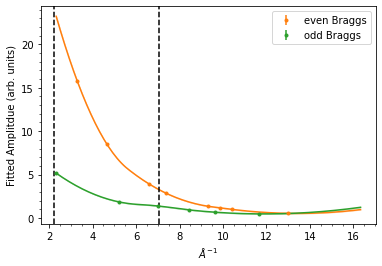

In [101]:
plt.figure()

plt.plot(test_q_array, Warren_Q_even, c='C1', )
plt.fill_between(test_q_array, Warren_Q_even_low, Warren_Q_even_high,color='C1', alpha = 0.2)
plt.errorbar(q_vecs_t0[sel_even], amps_t_corrected_sqrt[sel_even], yerr=amps_t_corrected_sqrt_errors[sel_even]  ,marker ='.', linestyle='', c='C1',  label = 'even Braggs')

plt.plot(test_q_array, Warren_Q_odd,c='C2',)
plt.fill_between(test_q_array, Warren_Q_odd_low, Warren_Q_odd_high,color='C2', alpha = 0.2)
plt.errorbar(q_vecs_t0[sel_odd], (amps_t_corrected_sqrt[sel_odd]), yerr=amps_t_corrected_sqrt_errors[sel_odd] , marker='.', linestyle='', c='C2', label = 'odd Braggs')

plt.axvline(np.sqrt(max_q), c='k', ls='--')
plt.axvline(np.sqrt(min_q), c='k', ls='--')
plt.legend()
plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel('Fitted Amplitdue (arb. units)')
# plt.xlim(2,4)
# plt.ylim(12,12.1)

In [102]:
# amps_t_corrected_sqrt_errors.shape

Coef factor (red line): 1.3179472398846


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


Text(0, 0.5, '$ ln( \\frac{0(Q_{even} \\pm Q_{odd})}{2f} )$')

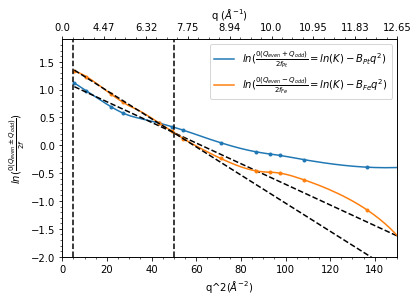

In [103]:
# plt.figure()
fig, ax = plt.subplots()

# ax.plot(test_q_array**2, np.log((Warren_Q_even + Warren_Q_odd)/(2*Warren_f_Pt) ), label = r'$ln(K) - B_{Pt} q^2 $' + f': $K = {np.round(b1_t[-1],3)} , BPt = {-np.round(a1_t[-1], 3)}$'  )
ax.plot(test_q_array**2, np.log((Warren_Q_even + Warren_Q_odd)/(2*Warren_f_Pt) ), label = r'$ ln( \frac{0(Q_{even} + Q_{odd})}{2f_{Pt}} = ln(K) - B_{Pt} q^2  )$')#+ f': $K = {np.round(b1_t[-1],3)} , BPt = {-np.round(a1_t[-1], 3)}$'  )

ax.plot(q_vecs_t0**2, np.log((Warren_Q_even_plot + Warren_Q_odd_plot)/(2*Warren_f_Pt_plot) ),'.', c='C0' )
ax.plot(test_q_array**2, b1_t[-1] + a1_t[-1]*test_q_array**2, '--', c='k', )

# ax.plot(test_q_array**2, np.log((Warren_Q_even - Warren_Q_odd)/(2*Warren_f_Fe) ), label = r'$ln(K) - B_{Fe} q^2 $' + f': $K = {np.round(b2_t[-1],3)} , BFe = {-np.round(a2_t[-1], 3)}$'  )
ax.plot(test_q_array**2, np.log((Warren_Q_even - Warren_Q_odd)/(2*Warren_f_Fe) ), label = r'$ ln( \frac{0(Q_{even} - Q_{odd})}{2f_{Fe}} = ln(K) - B_{Fe} q^2  )$' )#+ f': $K = {np.round(b2_t[-1],3)} , BFe = {-np.round(a2_t[-1], 3)}$'  )

ax.plot(q_vecs_t0**2, np.log((Warren_Q_even_plot - Warren_Q_odd_plot)/(2*Warren_f_Fe_plot) ),'.', c='C1' )
ax.plot(test_q_array**2, b2_t[-1] + a2_t[-1]*test_q_array**2, '--', c='k', )

# ax.axhline(0.5*(b1_t[-1] + b2_t[-1]), ls='--', color='r')
print(f'Coef factor (red line): {0.5*(b1_t[-1] + b2_t[-1])}')

ax.set_xlim(0,150)
ax.set_ylim(-2,1.9)

# ax.set_xlim(0,300)
# ax.set_xlim(0,80)

# ax.set_ylim(-1.5,1.5)
ax.axvline(max_q, c='k', ls='--')
ax.axvline(min_q, c='k', ls='--')

ax2 = ax.twiny()
ticks = ax.get_xticks()
ax2.set_xticks(ticks);
ax2.set_xticklabels(np.round(np.sqrt(ticks), 2))
ax2.set_xlabel('q ' + r'$(\AA^{-1}) $')
# ax2.plot(q_vecs_t0, np.zeros_like(q_vecs_t0), alpha = 0)
# ax2.set_xlim(0,np.sqrt(300) )

ax.legend()

ax.set_xlabel(r'q^2' + r'$ (\AA^{-2}) $')
ax.set_ylabel(r'$ ln( \frac{0(Q_{even} \pm Q_{odd})}{2f} )$')

Coef factor (red line): 1.3179472398846


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, '$ ln( \\frac{0(Q_{even} \\pm Q_{odd})}{2f} )$')

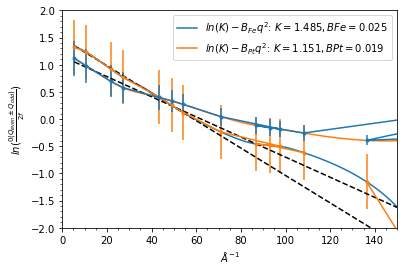

In [104]:
plt.figure()

plt.plot(test_q_array**2, np.log((Warren_Q_even - Warren_Q_odd)/(2*Warren_f_Fe) ), label = r'$ln(K) - B_{Fe} q^2 $' + f': $K = {np.round(b2_t[-1],3)} , BFe = {-np.round(a2_t[-1], 3)}$'  )
plt.errorbar(q_vecs_t0**2, np.log((Warren_Q_even_plot - Warren_Q_odd_plot)/(2*Warren_f_Fe_plot) ),yerr =warren_dif_errors_plot, marker= '.', color='C1' )
plt.plot(test_q_array**2, (b2_t[-1]) + a2_t[-1]*test_q_array**2, '--', c='k', )

plt.plot(test_q_array**2, np.log((Warren_Q_even + Warren_Q_odd)/(2*Warren_f_Pt) ), label = r'$ln(K) - B_{Pt} q^2 $' + f': $K = {np.round(b1_t[-1],3)} , BPt = {-np.round(a1_t[-1], 3)}$'  )
plt.errorbar(q_vecs_t0**2, np.log((Warren_Q_even_plot + Warren_Q_odd_plot)/(2*Warren_f_Pt_plot) ),yerr =warren_sum_errors_plot, marker= '.', color='C0' )
plt.plot(test_q_array**2, (b1_t[-1]) + a1_t[-1]*test_q_array**2, '--', c='k', )

print(f'Coef factor (red line): {0.5*(b1_t[-1] + b2_t[-1])}')

plt.xlim(0,300/2)
plt.ylim(-2.,2) 
plt.legend()

plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel(r'$ ln( \frac{0(Q_{even} \pm Q_{odd})}{2f} )$')

In [105]:
print(-a1_t[0])
print(-a2_t[0])

0.017648837978571287
0.02403755511777808


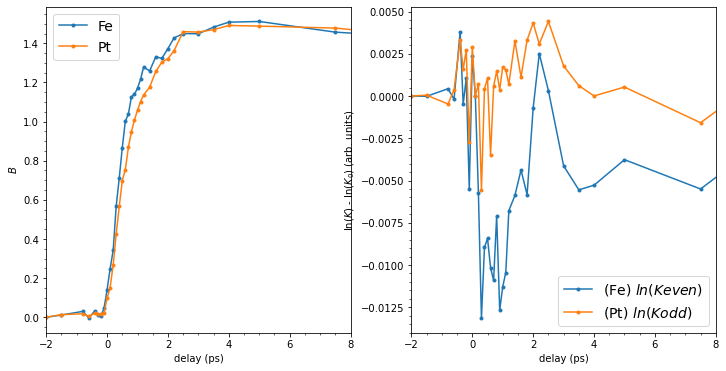

In [106]:
fig, [ax1, ax2] = plt.subplots(ncols = 2, figsize =( 12,6))

ax1.plot(dif.bincenters, (-a2_t + a2_t[0])/(-a2_t + a2_t[0])[-1], '.-', label = 'Fe')
ax1.plot(dif.bincenters, (-a1_t + a1_t[0])/(-a1_t + a1_t[0])[-1], '.-', label = 'Pt')


ax1.set_ylabel(r'$B$')
ax1.set_xlabel('delay (ps)')
# ax1.set_xlim(-2, 15)
ax1.set_xlim(-2, 8)

ax1.legend(fontsize = 14)

ax2.plot(dif.bincenters, np.exp(b2_t) - np.exp(b2_t)[0]  , '.-', label =r'(Fe) $ ln(Keven) $')
ax2.plot(dif.bincenters, np.exp(b1_t) - np.exp(b1_t)[0]  , '.-', label = r'(Pt) $ ln(Kodd) $')

ax2.set_xlim(-2, 8)

# ax2.set_xlim(-2, 15)
ax2.set_xlabel('delay (ps)')
ax2.set_ylabel('ln($K$) - ln($K_0$) (arb. units)')
ax2.legend(fontsize = 14)

In [107]:
print((b1_t[0:5]).mean())
print((b2_t[0:5]).mean())

print('\n')

print(np.exp(b1_t[0:5]).mean())
print(np.exp(b2_t[0:5]).mean())

1.1513369904287285
1.4859749469139227


3.1624184973545644
4.419272126977523


### Using Fitted values to create a scattering pattern to check quality of the Fit

In [108]:
hk_idx_2 = np.asarray(hk_idx)

#### This uses the fitted slopes for every time and the average constant for the odd and even Braggs

In [109]:
#1 Recalculate Intensities with the DW factors
B_Fe = -a2_t
B_Pt = -a1_t
prop_factor_t = (np.exp(0.5*b1_t + 0.5*b2_t)**2)
amp_DW_Warren_method = np.zeros((dif.bincenters.shape[0], 120))
amp_DW_Warren_120idx = np.zeros((dif.bincenters.shape[0], 120))

b1_t_mean = b1_t.mean()
b2_t_mean = b2_t.mean()

for t_idx in np.arange(dif.bincenters.shape[0]):

#     q_vecs_tmp = coef*np.sqrt((bragg_fits_binned_delays[t_idx,:,1] - dif.centerpos_time[t_idx,0])**2 + (bragg_fits_binned_delays[t_idx,:,2] - dif.centerpos_time[t_idx,1])**2)
    q_vecs_t0 = bragg_fits_simetrised_q[t_idx]
    
#     amp_DW_Warren_120idx[t_idx] = I_UED_dt.I_UED_f_warren_120idx(Bfe=B_Fe[t_idx], Bpt=B_Pt[t_idx]*1, K_odd = K1_avg, K_even = K2_avg,bragg_q=q_vecs_t0, allBragg_indices_2=allBragg_indices_2  ) #OG with avg times
    amp_DW_Warren_120idx[t_idx] = I_UED_dt.I_UED_f_warren_120idx(Bfe=B_Fe[t_idx], Bpt=B_Pt[t_idx], K_odd = np.exp(b2_t)[t_idx], K_even = np.exp(b1_t)[t_idx],bragg_q=q_vecs_t0, allBragg_indices_2=allBragg_indices_2  ) #OG time dependent


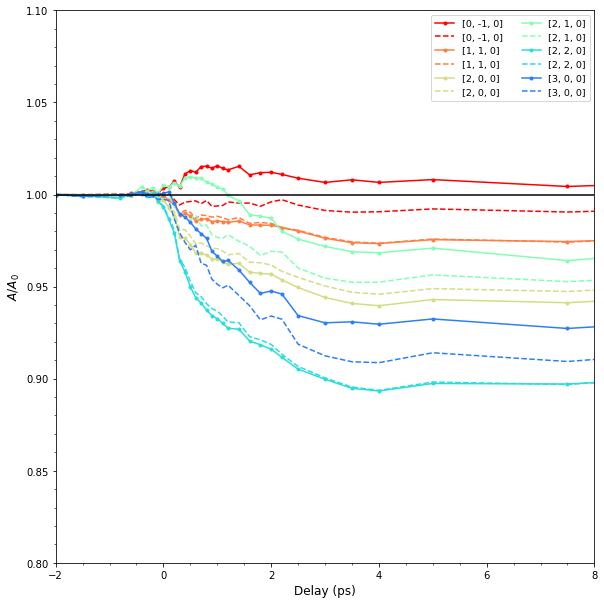

In [110]:
fig, ax1 = plt.subplots(nrows =1, figsize = (10.2/1.2, 10.2/1.2))
cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    fits = bragg_fits_binned_delays[:,sel_bragg,:]
#     fits = bragg_fits_simetrised[:,sel_bragg,:]

#     amps_t0 = bragg_fits_simetrised[i,:,0]

#     q = coef*np.sqrt((fits[:,0,1] - dif.centerpos[0])**2 + (fits[:,0,2] - dif.centerpos[1])**2)
    q = bragg_fits_simetrised_q[:,sel_bragg]
    q.shape= len(q)
    
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    
#     amp_corrected = (np.sqrt(fits[:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2
    amp_corrected = (np.sqrt(bragg_fits_simetrised[:,sel_bragg,:][:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2

    ax1.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
#     ax1.plot(dif.bincenters, amp_DW_Warren_method[:, sel_bragg] / amp_DW_Warren_method[0, sel_bragg], '--', color = color, label = bragg)
    ax1.plot(dif.bincenters, amp_DW_Warren_120idx[:, sel_bragg] / amp_DW_Warren_120idx[0, sel_bragg], '--', color = color, label = bragg)


    
ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$A/A_0$', fontsize = 12)
ax1.set_xlim(-2,8)
ax1.set_ylim(0.8,1.1)

# ax1.set_xlim(-2,20)


ax1.legend(ncol = 2, fontsize = 9.5)
ax1.axhline(1, c='k')
plt.tight_layout()


### previous method doesn't seem so good. Fit with a fixef K1 and K2, the Bfactors change

In [111]:
print((b1_t_mean))
print((b2_t_mean))

1.1514178558380648
1.4848105198028385


In [112]:
def fixed_linear_k1(x,a1):
    constant1 = b1_t_mean
#     k1 = np.log(K1_avg)
#     k1 = np.log(0.5*K2_avg+ 0.5*K1_avg)

    
    return a1*x + constant1

def fixed_linear_k2(x,a2):

#     k2 = np.log(K2_avg)
    constant2 = b2_t_mean
#     k2 = np.log(0.5*K2_avg+ 0.5*K1_avg)

    return a2*x + constant2

In [113]:
a1_t_kfixed = np.zeros(35)
a2_t_kfixed = np.zeros(35)

a1_t_kfixed_cov = np.zeros(35)
a2_t_kfixed_cov = np.zeros(35)

for i in np.arange(35):
    
    amps_t0 = compact[:,i,0]

    q_vecs_t0 = q_symmetrised_compact[:,i]
    
    amps_t_corrected = (np.sqrt(amps_t0 + azimuthal_vals_bkg_intrp(q_vecs_t0)) - sqrt_azimuthal_vals_bkg_intrp(q_vecs_t0))**2
#     amps_t_corrected = amps_t0



    sel_even = np.sum(np.asarray(compact_hkl), axis = 1) %2 ==0
    sel_odd =  np.sum(np.asarray(compact_hkl), axis = 1) %2 ==1
    test_q_array = np.arange(np.min(q_vecs_t0), np.max(q_vecs_t0), 0.1)

    even_sorted_args = np.argsort(q_vecs_t0[sel_even][sel_even_not_nan])
    odd_sorted_args = np.argsort(q_vecs_t0[sel_odd][sel_odd_not_nan])

    spl_Warren_Q_even = interpolate.splrep(q_vecs_t0[sel_even][sel_even_not_nan][even_sorted_args], 
                                           np.sqrt(amps_t_corrected[sel_even][sel_even_not_nan][even_sorted_args]), 
                                           k =2)
    spl_Warren_Q_odd =  interpolate.splrep(q_vecs_t0[sel_odd][sel_odd_not_nan][odd_sorted_args], 
                                           np.sqrt(amps_t_corrected[sel_odd][sel_odd_not_nan][odd_sorted_args]) 
                                          )
    # Warren Q : interpolated energy dependence for odd/even peaks separatedly
    Warren_Q_even2 = interpolate.splev(test_q_array, spl_Warren_Q_even)
    Warren_Q_odd2  = interpolate.splev(test_q_array, spl_Warren_Q_odd)
    Warren_Q_even_plot = interpolate.splev(q_vecs_t0, spl_Warren_Q_even)
    Warren_Q_odd_plot  = interpolate.splev(q_vecs_t0, spl_Warren_Q_odd)
    
    Warren_f_Fe = dt.electron_form_factor(test_q_array, element = 'Fe')
    Warren_f_Pt = dt.electron_form_factor(test_q_array, element = 'Pt')
    Warren_f_Fe_plot = dt.electron_form_factor(q_vecs_t0, element = 'Fe')
    Warren_f_Pt_plot = dt.electron_form_factor(q_vecs_t0, element = 'Pt')

    sel_low_q =( test_q_array**2 < max_q)&(test_q_array**2 > min_q)

#     
        # the good one I think 

    sum_warren_tmp = (Warren_Q_even2 + Warren_Q_odd2)
    diff_warren_tmp = (Warren_Q_even2 - Warren_Q_odd2)
    skip_odd_mask = np.where(diff_warren_tmp[sel_low_q] > 0)

    a1, a1_cov = opt.curve_fit(fixed_linear_k1, (test_q_array**2)[sel_low_q], np.log(sum_warren_tmp/(2*Warren_f_Pt) )[sel_low_q], p0=[-0.013356657435999895])
    a2, a2_cov = opt.curve_fit(fixed_linear_k2, (test_q_array**2)[sel_low_q][skip_odd_mask], np.log(diff_warren_tmp[sel_low_q][skip_odd_mask]/(2*Warren_f_Fe[sel_low_q][skip_odd_mask]) ), p0=[-0.02124717939977886])

    a1_t_kfixed[i] = a1 
    a2_t_kfixed[i] = a2 
    
    a1_t_kfixed_cov[i] = a1_cov 
    a2_t_kfixed_cov[i] = a2_cov 


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


Text(0, 0.5, '$ ln( \\frac{0(Q_{even} \\pm Q_{odd})}{2f} )$')

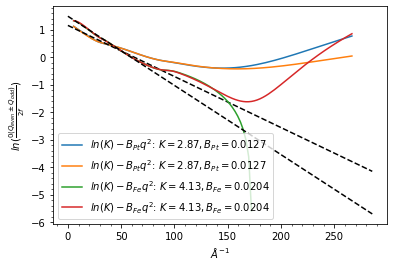

In [114]:
plt.figure()

plt.plot(test_q_array**2, np.log((Warren_Q_even + Warren_Q_odd)/(2*Warren_f_Pt) ), label = r'$ln(K) - B_{Pt} q^2 $' + r': $K = 2.87 , B_{Pt} = 0.0127$'  )
plt.plot(test_q_array**2, np.log((Warren_Q_even2 + Warren_Q_odd2)/(2*Warren_f_Pt) ), label = r'$ln(K) - B_{Pt} q^2 $' + r': $K = 2.87 , B_{Pt} = 0.0127$'  )

plt.plot(np.arange(0,17, .1)**2, fixed_linear_k1(np.arange(0,17, .1)**2,a1_t_kfixed[-1] ), '--', c='k', )

plt.plot(test_q_array**2, np.log((Warren_Q_even - Warren_Q_odd)/(2*Warren_f_Fe) ), label = r'$ln(K) - B_{Fe} q^2 $' + r': $K = 4.13 , B_{Fe} = 0.0204$'  )
plt.plot(test_q_array**2, np.log((Warren_Q_even2 - Warren_Q_odd2)/(2*Warren_f_Fe) ), label = r'$ln(K) - B_{Fe} q^2 $' + r': $K = 4.13 , B_{Fe} = 0.0204$'  )

plt.plot(np.arange(0,17, .1)**2, fixed_linear_k2(np.arange(0,17, .1)**2,a2_t_kfixed[-1] ), '--', c='k', )


plt.legend()

plt.xlabel(r'$ \AA^{-1} $')
plt.ylabel(r'$ ln( \frac{0(Q_{even} \pm Q_{odd})}{2f} )$')

In [115]:
print(-a1_t_kfixed[0])
print(-a2_t_kfixed[0])

0.017711581581000935
0.02393776554378949


In [116]:
#1 Recalculate Intensities with the DW factors
B_Fe = -a2_t_kfixed
B_Pt = -a1_t_kfixed

prop_factor_t = (np.exp(0.5*b1_t + 0.5*b2_t)**2)
amp_DW_Warren_method_kfixed = np.zeros((dif.bincenters.shape[0], 120))

K1_avg = np.exp(b1_t).mean()
K2_avg = np.exp(b2_t).mean()


for t_idx in np.arange(dif.bincenters.shape[0]):
    q_vecs_t0 = bragg_fits_simetrised_q[t_idx]    
    
#     amp_DW_Warren_method_kfixed[t_idx] = I_UED_dt.I_UED_f_warren_120idx(Bfe=B_Fe[t_idx], Bpt=B_Pt[t_idx], K_odd = K1_avg, K_even = K2_avg,bragg_q=q_vecs_t0, allBragg_indices_2=allBragg_indices_2  ) #OG with avg times
    amp_DW_Warren_method_kfixed[t_idx] = I_UED_dt.I_UED_f_warren_120idx(Bfe=B_Fe[t_idx], Bpt=B_Pt[t_idx], K_odd = 0.5*K1_avg+0.5*K2_avg, K_even = 0.5*K1_avg+0.5*K2_avg,bragg_q=q_vecs_t0, allBragg_indices_2=allBragg_indices_2  ) #OG with avg times
#     amp_DW_Warren_method_kfixed[t_idx] = I_UED_dt.I_UED_f_warren_120idx(Bfe=B_Fe[t_idx], Bpt=B_Pt[t_idx], K_odd = np.exp(b2_t)[t_idx],   K_even = np.exp(b1_t)[t_idx],  bragg_q=q_vecs_tmp,allBragg_indices_2=allBragg_indices_2  ) #OG time dependent


#### Checked the quality of the fit and somehow it's worse than before

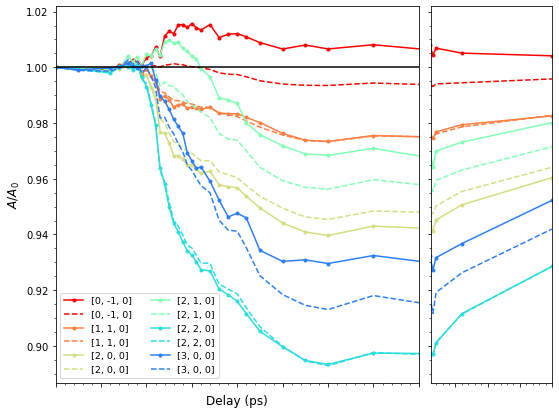

In [117]:
# fig, ax1 = plt.subplots(nrows =1, figsize = (10.2/1.2, 10.2/1.2))
fig, [ax1, ax2] = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [3, 1]}, figsize = (8,12/2))#,dpi=300)# sharex=True)

cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    fits = bragg_fits_binned_delays[:,sel_bragg,:]
    q = bragg_fits_simetrised_q[:,sel_bragg]
    q.shape= len(q)
    
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    
    amp_corrected = (np.sqrt(bragg_fits_simetrised[:,sel_bragg,:][:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2
     
    ax1.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax1.plot(dif.bincenters, amp_DW_Warren_method_kfixed[:, sel_bragg] / amp_DW_Warren_method_kfixed[0, sel_bragg], '--', color = color, label = bragg)

    ax2.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax2.plot(dif.bincenters, amp_DW_Warren_method_kfixed[:, sel_bragg] / amp_DW_Warren_method_kfixed[0, sel_bragg], '--', color = color, label = bragg)

    
ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$A/A_0$', fontsize = 12)
ax1.set_xlim(-2,6)

ax2.set_xlim(6,100)

ax1.legend(ncol = 2, fontsize = 9.5)
ax1.axhline(1, c='k')
plt.tight_layout()

fig.subplots_adjust(hspace=.05)
fig.subplots_adjust(wspace=.05)
ax2.set_yticklabels([]);

ax1.set_xticklabels([]);
ax2.set_xticklabels([]);

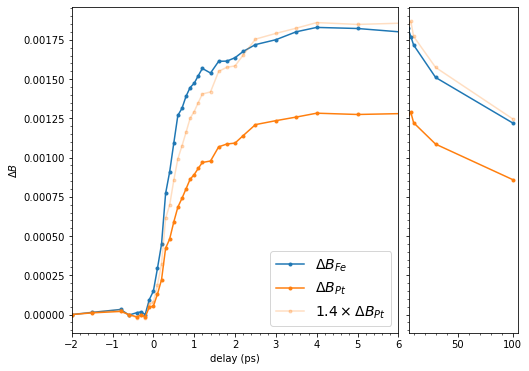

In [118]:
# fig, axs = plt.subplots(ncols=2, sharey=True,gridspec_kw={'width_ratios': [3, 1],'wspace': 0.05 }, figsize=(8/2,8/2), dpi=150)#,dpi=300)
fig, axs = plt.subplots(ncols=2, sharey=True,gridspec_kw={'width_ratios': [3, 1]}, figsize = (8,12/2))#, dpi=150)#,dpi=300)
fig.subplots_adjust(hspace=.05)
fig.subplots_adjust(wspace=.05)

axs[0].plot(dif.bincenters, (-a2_t_kfixed + a2_t_kfixed[0]), '.-', label = r'$\Delta B_{Fe}$')
axs[0].plot(dif.bincenters, 1.*(-a1_t_kfixed + a1_t_kfixed[0]), '.-', label = r'$\Delta B_{Pt}$')
axs[1].plot(dif.bincenters, (-a2_t_kfixed + a2_t_kfixed[0]), '.-', label = r'$\Delta B_{Fe}$')
axs[1].plot(dif.bincenters, 1.*(-a1_t_kfixed + a1_t_kfixed[0]), '.-', label = r'$\Delta B_{Pt}$')

axs[0].plot(dif.bincenters, 1.45*(-a1_t_kfixed + a1_t_kfixed[0]), '.-',c='C1', alpha = 0.25, label = r'$1.4 \times \Delta B_{Pt}$')
axs[1].plot(dif.bincenters, 1.45*(-a1_t_kfixed + a1_t_kfixed[0]), '.-',c='C1', alpha = 0.25, label = r'$1.4 \times \Delta B_{Pt}$')

axs[0].set_ylabel(r'$\Delta B$')
axs[0].set_xlabel('delay (ps)')
axs[0].set_xlim(-2,6)
axs[1].set_xlim(6,105)

axs[0].legend(fontsize = 14)

In [119]:
print(' B_Fe (t<0)' +' ' + str(-a2_t_kfixed[0]) )
print(' B_Pt (t<0)' +' ' + str(-a1_t_kfixed[0]) )

 B_Fe (t<0) 0.02393776554378949
 B_Pt (t<0) 0.017711581581000935


## Fitting Amp/Amp0 instead

In [120]:
tmp_a0 = compact[:,0,0] # keeps only amplitudes at t0 
good_bragg_fit_mask = tmp_a0!= 0 # this is boolean mask that indexes all braggs of interest 

amps_tmp  = compact[:,:,0] # keeps all time delays
amps_tmp = amps_tmp[good_bragg_fit_mask,:]


q_vecs_tmp = q_symmetrised_compact[:,0][good_bragg_fit_mask] # ! need to change this !!! 

print(max_q)
#filter out q vetors higher than 10 A-1
sel_low_q =  q_vecs_tmp**2 < max_q
# sel_low_q =  q_vecs_tmp**2 < 300
# sel_low_q =  q_vecs_tmp**2 < 50

q_vecs_tmp = q_vecs_tmp[sel_low_q]

amps_tmp = amps_tmp[sel_low_q, :]
good_bragg_fit_mask[np.where(good_bragg_fit_mask)[0][~sel_low_q]] = False

tmp_a0 = tmp_a0[good_bragg_fit_mask]  

amps_tmp = amps_tmp.T/tmp_a0

50


In [121]:
# a small name change to make it compatible with some old code
y_fit_all = amps_tmp

In [122]:
# to date, I haven't found a better way to define the function bellow....
test = ''
for i in np.arange(35):
    test = test + f'Bpt{i}, '
print(test)

Bpt0, Bpt1, Bpt2, Bpt3, Bpt4, Bpt5, Bpt6, Bpt7, Bpt8, Bpt9, Bpt10, Bpt11, Bpt12, Bpt13, Bpt14, Bpt15, Bpt16, Bpt17, Bpt18, Bpt19, Bpt20, Bpt21, Bpt22, Bpt23, Bpt24, Bpt25, Bpt26, Bpt27, Bpt28, Bpt29, Bpt30, Bpt31, Bpt32, Bpt33, Bpt34, 


In [123]:
# to date, I haven't found a better way to define the function bellow....
test = ''
for i in np.arange(35):
    test = test + f'Bfe{i}, '
print(test)

Bfe0, Bfe1, Bfe2, Bfe3, Bfe4, Bfe5, Bfe6, Bfe7, Bfe8, Bfe9, Bfe10, Bfe11, Bfe12, Bfe13, Bfe14, Bfe15, Bfe16, Bfe17, Bfe18, Bfe19, Bfe20, Bfe21, Bfe22, Bfe23, Bfe24, Bfe25, Bfe26, Bfe27, Bfe28, Bfe29, Bfe30, Bfe31, Bfe32, Bfe33, Bfe34, 


In [124]:
def DW_func_test(q,
                 Bpt0, Bpt1, Bpt2, Bpt3, Bpt4, Bpt5, Bpt6, Bpt7, Bpt8, Bpt9, Bpt10, Bpt11, Bpt12, Bpt13, Bpt14, Bpt15, Bpt16, Bpt17,
                 Bpt18, Bpt19, Bpt20, Bpt21, Bpt22, Bpt23, Bpt24, Bpt25, Bpt26, Bpt27, Bpt28, Bpt29, Bpt30, Bpt31, Bpt32, Bpt33, Bpt34, 
                 
                 Bfe0, Bfe1, Bfe2, Bfe3, Bfe4, Bfe5, Bfe6, Bfe7, Bfe8, Bfe9, Bfe10, Bfe11, Bfe12, Bfe13, Bfe14, Bfe15, Bfe16, Bfe17, Bfe18,
                 Bfe19, Bfe20, Bfe21, Bfe22, Bfe23, Bfe24, Bfe25, Bfe26, Bfe27, Bfe28, Bfe29, Bfe30, Bfe31, Bfe32, Bfe33, Bfe34, 
                 
                 BPT0, BFE0):
    '''
    '''
    
    y_out = np.asarray([])
    
    Bpt_list = [Bpt0, Bpt1, Bpt2, Bpt3, Bpt4, Bpt5, Bpt6, Bpt7, Bpt8, Bpt9, Bpt10, Bpt11, Bpt12, Bpt13, Bpt14, Bpt15, Bpt16, Bpt17,
                 Bpt18, Bpt19, Bpt20, Bpt21, Bpt22, Bpt23, Bpt24, Bpt25, Bpt26, Bpt27, Bpt28, Bpt29, Bpt30, Bpt31, Bpt32, Bpt33, Bpt34,]
    
    Bfe_list = [ Bfe0, Bfe1, Bfe2, Bfe3, Bfe4, Bfe5, Bfe6, Bfe7, Bfe8, Bfe9, Bfe10, Bfe11, Bfe12, Bfe13, Bfe14, Bfe15, Bfe16, Bfe17, Bfe18,
                 Bfe19, Bfe20, Bfe21, Bfe22, Bfe23, Bfe24, Bfe25, Bfe26, Bfe27, Bfe28, Bfe29, Bfe30, Bfe31, Bfe32, Bfe33, Bfe34,]
    for i in range(len(Bpt_list)):
        Bpt = Bpt_list[i]
        Bfe = Bfe_list[i]

        y_tmp = I_UED_dt.I_UED_f_warren_prop_norm2(Bfe, Bpt,BFE0, BPT0, q, compact_hkl[good_bragg_fit_mask])
        y_out = np.append(y_out,y_tmp)

    return y_out



def DW_func_test2(q_arr,
                 Bpt0, Bpt1, Bpt2, Bpt3, Bpt4, Bpt5, Bpt6, Bpt7, Bpt8, Bpt9, Bpt10, Bpt11, Bpt12, Bpt13, Bpt14, Bpt15, Bpt16, Bpt17,
                 Bpt18, Bpt19, Bpt20, Bpt21, Bpt22, Bpt23, Bpt24, Bpt25, Bpt26, Bpt27, Bpt28, Bpt29, Bpt30, Bpt31, Bpt32, Bpt33, Bpt34, 
                 
                 Bfe0, Bfe1, Bfe2, Bfe3, Bfe4, Bfe5, Bfe6, Bfe7, Bfe8, Bfe9, Bfe10, Bfe11, Bfe12, Bfe13, Bfe14, Bfe15, Bfe16, Bfe17, Bfe18,
                 Bfe19, Bfe20, Bfe21, Bfe22, Bfe23, Bfe24, Bfe25, Bfe26, Bfe27, Bfe28, Bfe29, Bfe30, Bfe31, Bfe32, Bfe33, Bfe34, 
                 
                 BPT0, BFE0):
    '''
    '''
    q_arr2 = q_arr.reshape((good_bragg_fit_mask.sum(),35))
    y_out = np.asarray([])
    
    Bpt_list = [Bpt0, Bpt1, Bpt2, Bpt3, Bpt4, Bpt5, Bpt6, Bpt7, Bpt8, Bpt9, Bpt10, Bpt11, Bpt12, Bpt13, Bpt14, Bpt15, Bpt16, Bpt17,
                 Bpt18, Bpt19, Bpt20, Bpt21, Bpt22, Bpt23, Bpt24, Bpt25, Bpt26, Bpt27, Bpt28, Bpt29, Bpt30, Bpt31, Bpt32, Bpt33, Bpt34,]
    
    Bfe_list = [ Bfe0, Bfe1, Bfe2, Bfe3, Bfe4, Bfe5, Bfe6, Bfe7, Bfe8, Bfe9, Bfe10, Bfe11, Bfe12, Bfe13, Bfe14, Bfe15, Bfe16, Bfe17, Bfe18,
                 Bfe19, Bfe20, Bfe21, Bfe22, Bfe23, Bfe24, Bfe25, Bfe26, Bfe27, Bfe28, Bfe29, Bfe30, Bfe31, Bfe32, Bfe33, Bfe34,]
    for i in range(len(Bpt_list)):
        q = q_arr2[:,i]
        Bpt = Bpt_list[i]
        Bfe = Bfe_list[i]

        y_tmp = I_UED_dt.I_UED_f_warren_prop_norm2(Bfe, Bpt,BFE0, BPT0, q, compact_hkl[good_bragg_fit_mask])
        y_out = np.append(y_out,y_tmp)

    return y_out



In [125]:
p0 = [ *(-a1_t_kfixed), *(-a2_t_kfixed),  (-a1_t_kfixed)[0], (-a2_t_kfixed)[0]]

In [126]:
%%time
# popt, pcov = opt.curve_fit(DW_func_test,
# #                           q_vecs_t0[good_bragg_fit_mask],
#                            q_vecs_tmp,
#                            y_fit_all.ravel(),
#                            p0 = p0,
# #                            bounds = (0, np.inf)
#                           )


# %%time
popt, pcov = opt.curve_fit(DW_func_test2,
#                           q_vecs_t0[good_bragg_fit_mask],
                           q_symmetrised_compact[:,:][good_bragg_fit_mask].ravel(), 
                           y_fit_all.ravel(),
                           p0 = p0,
#                            bounds = (0, np.inf)
                          )

/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:279: RuntimeWarning: overflow encountered in square
  out[tmp_idx_odd] = (np.exp(-mfe[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2 / (np.exp(-mfe0[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt0[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:279: RuntimeWarning: invalid value encountered in true_divide
  out[tmp_idx_odd] = (np.exp(-mfe[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2 / (np.exp(-mfe0[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt0[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:291: RuntimeWarning: overflow encountered in square
  out[tmp_idx_even] = (np.exp(-mfe[tmp_idx_even])*f_Fe[tmp_idx_even] + np.exp(-mpt[tmp_idx_even])*f_Pt[tmp_idx_even])**2 / (np.exp(-mfe0[tmp_idx_even])*f_Fe[tmp_idx_even] + np.exp(-mpt0[tmp_idx_even])*f_Pt[tmp_idx_even])**2
/cds/home/d/diegotur/UED/Fe

CPU times: user 4min 1s, sys: 323 ms, total: 4min 2s
Wall time: 4min 1s


In [127]:
Bpt_time_test_warren_glob = popt[:35]
Bfe_time_test_warren_glob = popt[35:70]
BPT0 = popt[-2]
BFE0 = popt[-1]


perr = np.sqrt(np.diag(pcov))
pcov_B_fit = copy.copy(pcov)

Bpt_time_test_warren_glob_error = perr[:35]
Bfe_time_test_warren_glob_error = perr[35:70]

BPT0_err = perr[-2]
BFE0_err = perr[-1]


In [128]:

fe_err_tmp = np.abs(Bfe_time_test_warren_glob_error - Bfe_time_test_warren_glob_error[0])
pt_err_tmp = np.abs(Bpt_time_test_warren_glob_error - Bpt_time_test_warren_glob_error[0])

fe_err_tmp2 = np.sqrt(np.abs(Bfe_time_test_warren_glob_error**2 + Bfe_time_test_warren_glob_error[0]**2 - 2*pcov_B_fit[35:70, 35]))
pt_err_tmp2 = np.sqrt(np.abs(Bpt_time_test_warren_glob_error**2 + Bpt_time_test_warren_glob_error[0]**2 - 2*pcov_B_fit[0:35, 0]))



### fitting DW

In [129]:
p0_DW = [0.0020, 0.3, 0.0010, 2.7, 0.0012, 25.5]

popt_Fe_DW, pcov_Fe_DW = opt.curve_fit(dt.two_expssum_2_with_rec_tau , dif.bincenters[1+0:], (Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])[1+0:],p0=p0_DW,sigma=fe_err_tmp2[1+0:],  bounds = [0, np.inf])#bounds =[[0,0,0, 0,-np.inf,0],[np.inf,np.inf,np.inf, np.inf,0.000001,np.inf ]])
popt_Pt_DW, pcov_Pt_DW = opt.curve_fit(dt.two_expssum_2_with_rec_tau , dif.bincenters[1+0:], (Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])[1+0:],p0=p0_DW,sigma=pt_err_tmp2[1+0:],   bounds = [0, np.inf] )#bounds =[[0,0,0, 0,-np.inf,0],[np.inf,np.inf,np.inf, np.inf,0.000001,np.inf ]])

perr_Fe_DW = np.sqrt(np.diag(pcov_Fe_DW))
perr_Pt_DW = np.sqrt(np.diag(pcov_Pt_DW))


In [130]:
popt1_Fe = np.zeros_like(popt_Fe_DW)
popt2_Fe = np.zeros_like(popt_Fe_DW)
popt23_Fe = np.zeros_like(popt_Fe_DW)

popt1_Fe[[1,3,5]] = popt_Fe_DW[[1,3,5]]
popt1_Fe[0:2] = popt_Fe_DW[0:2]

popt2_Fe[[1,3,5]] = popt_Fe_DW[[1,3,5]]
popt2_Fe[0+2:2+2] = popt_Fe_DW[0+2:2+2]

popt23_Fe[[1,3,5]] = popt_Fe_DW[[1,3,5]]
popt23_Fe[0+2:2+4] = popt_Fe_DW[0+2:2+4]




popt1_Pt = np.zeros_like(popt_Pt_DW)
popt2_Pt = np.zeros_like(popt_Pt_DW)
popt23_Pt = np.zeros_like(popt_Pt_DW)

popt1_Pt[[1,3,5]] = popt_Pt_DW[[1,3,5]]
popt1_Pt[0:2] = popt_Pt_DW[0:2]

popt2_Pt[[1,3,5]] = popt_Pt_DW[[1,3,5]]
popt2_Pt[0+2:2+2] = popt_Pt_DW[0+2:2+2]

popt23_Pt[[1,3,5]] = popt_Pt_DW[[1,3,5]]
popt23_Pt[0+2:2+4] = popt_Pt_DW[0+2:2+4]


(-2.0, 8.0)

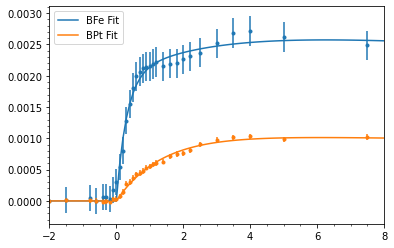

In [131]:
# plt.figure(figsize = (2,6))
plt.figure()
# 
# plt.plot(dif.bincenters, (Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])/(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])[-1],'.-', label = 'BFe')
# plt.plot(dif.bincenters, (Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])/(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])[-1] ,'.-', label = 'BPt')

# plt.errorbar(xval, yval, yerr=y_error_val, linestyle='', c=colour)

# plt.plot(    dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0],'.',c='C0', label = 'BFe')
# plt.plot(    dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0],'.', c='C1', label = 'BPt')
plt.errorbar(dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0], yerr =fe_err_tmp2, c='C0',ls='', marker = '.')
plt.errorbar(dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0], yerr =pt_err_tmp2, c='C1',ls ='', marker = '.')

tmp_delay = np.arange(-2, 101, 0.1)
plt.plot(tmp_delay, dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Fe_DW) ,'-', label = 'BFe Fit')
# plt.plot(tmp_delay, dt.two_expssum_2_with_rec_tau(tmp_delay,*popt1_Fe) ,'--',c='C0', label = '')
# plt.plot(tmp_delay, dt.two_expssum_2_with_rec_tau(tmp_delay,*popt2_Fe) ,'--',c='C0', label = '')

plt.plot(tmp_delay, dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Pt_DW) ,'-',c='C1', label = 'BPt Fit')
# plt.plot(tmp_delay, dt.two_expssum_2_with_rec_tau(tmp_delay ,*popt1_Pt) ,'--',c='C1', label = '')
# plt.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(tmp_delay ,*popt2_Pt) ,'--',c='C1', label = '')
# 
# plt.plot(dif.bincenters[dif.bincenters > 1], popt_Pt_DW[0] + dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt23_Pt)[dif.bincenters > 1] ,'--', c='C1',label = '')


plt.legend()
plt.xlim((-2,8))
# plt.xlim((8,100)) 



In [132]:
print('Fe:')
print(popt_Fe_DW)
print(perr_Fe_DW)
print(' \nPt:')
print(popt_Pt_DW)
print(perr_Pt_DW)

Fe:
[1.95926950e-03 3.03424236e-01 9.62552814e-04 2.72424853e+00
 1.16443750e-03 2.55708386e+01]
[2.68383206e-04 5.48190363e-02 3.40878181e-04 2.14734966e+00
 3.96160688e-04 1.73028895e+01]
 
Pt:
[1.08283313e-03 1.35634090e+00 6.70318242e-04 4.35855629e+01
 1.11963297e-03 4.35822321e+01]
[9.01236550e-05 1.23586496e-01 9.66928899e+05 2.65632288e+06
 9.66928899e+05 1.67492656e+06]


#### Recalculate Intensities with the DW factors

In [133]:
# compact_hkl.shape

In [134]:
# compact_hkl[i]

In [135]:

# t_idx = 0
# Bfe = B_Fe[t_idx]
# Bpt = B_Pt[t_idx]

# BFE0 = B_Fe[0:4].mean()
# BPT0 = B_Pt[0:4].mean()

# for i in np.arange(compact_hkl.shape[0]):
#     dif.compact_I_I0_symms[t_idx,i] = I_UED_dt.I_UED_f_warren_prop_norm2(
#         Bfe, Bpt,BFE0, BPT0, q_symmetrised_compact[i,t_idx], compact_hkl[i])
    
    

In [136]:
# q_symmetrised_compact[:,0]

In [137]:
B_Fe = Bfe_time_test_warren_glob
B_Pt = Bpt_time_test_warren_glob
# prop_factor_t = (np.exp(0.5*b1_t + 0.5*b2_t)**2)
# amp_DW_Warren_glob_test = np.zeros((dif.bincenters.shape[0], 120))
dif.compact_I_I0_symms = np.zeros((dif.bincenters.shape[0], compact_hkl.shape[0]))
dif.compact_I_I0_symms_m_t0 = np.zeros((dif.bincenters.shape[0], compact_hkl.shape[0]))


for t_idx in np.arange(dif.bincenters.shape[0]):
    Bfe = B_Fe[t_idx]
    Bpt = B_Pt[t_idx]

    BFe0 = B_Fe[0:4].mean()
    BPt0 = B_Pt[0:4].mean()
    
    dif.compact_I_I0_symms[t_idx,:] = I_UED_dt.I_UED_f_warren_prop_norm2(
        Bfe, Bpt,BFe0, BPt0, q_symmetrised_compact[:,t_idx], compact_hkl[:] )
    dif.compact_I_I0_symms_m_t0[t_idx,:] = I_UED_dt.I_UED_f_warren_prop_norm2(
        Bfe-BFe0, Bpt-BPt0,BFe0-BFe0, BPt0-BPt0, q_symmetrised_compact[:,t_idx], compact_hkl[:] )


/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:279: RuntimeWarning: overflow encountered in exp
  out[tmp_idx_odd] = (np.exp(-mfe[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2 / (np.exp(-mfe0[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt0[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:279: RuntimeWarning: invalid value encountered in subtract
  out[tmp_idx_odd] = (np.exp(-mfe[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2 / (np.exp(-mfe0[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt0[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:279: RuntimeWarning: overflow encountered in square
  out[tmp_idx_odd] = (np.exp(-mfe[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2 / (np.exp(-mfe0[tmp_idx_odd])*f_Fe[tmp_idx_odd] - np.exp(-mpt0[tmp_idx_odd])*f_Pt[tmp_idx_odd])**2
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_U

In [ ]:
plt.figure()
# plt.plot(dif.bincenters, dif.compact_I_I0_symms[:,-1], '.-', label = compact_hkl[-1] )
# plt.plot(dif.bincenters, dif.compact_I_I0_symms[:,-2], '.-', label = compact_hkl[-2] )
# plt.plot(dif.bincenters, dif.compact_I_I0_symms[:,-3], '.-', label = compact_hkl[-3] )
plt.plot(dif.bincenters, dif.compact_I_I0_symms[:,-4], '.-', label = compact_hkl[-4] )
plt.plot(dif.bincenters, dif.compact_I_I0_symms[:,-5], '.-', label = compact_hkl[-5] )

# plt.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:,-1], '.-', label = compact_hkl[-1] )
# plt.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:,-2], '.-', label = compact_hkl[-2] )
# plt.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:,-3], '.-', label = compact_hkl[-3] )
plt.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:,-4], '.-', label = compact_hkl[-4] )
plt.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:,-5], '.-', label = compact_hkl[-5] )

plt.xlim(-2,6)
plt.axhline(1, ls='--', c='k')
plt.legend()

In [146]:

B_Fe = Bfe_time_test_warren_glob
B_Pt = Bpt_time_test_warren_glob
# prop_factor_t = (np.exp(0.5*b1_t + 0.5*b2_t)**2)
amp_DW_Warren_glob_test = np.zeros((dif.bincenters.shape[0], 120))


for t_idx in np.arange(dif.bincenters.shape[0]):
    Bfe = B_Fe[t_idx]
    Bpt = B_Pt[t_idx]

    
    for i in np.arange(120):

        h, k = tmp_hk[i]
       
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        p0 = copy.copy(bragg_fits_binned_delays[t_idx,i])

#         amp_DW_Warren_method_kfixed[t_idx,i] = I_UED_f_warren_prop2(Bfe=Bfe, Bpt=Bpt, K_odd = K1_avg, K_even = K2_avg, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
        amp_DW_Warren_glob_test[t_idx,i] = I_UED_dt.I_UED_f_warren_prop_norm(Bfe, Bpt, B_Fe[0], B_Pt[0], bragg_pos, hk_idx, i=idx )#i=idx_array_tmp.astype(int)  )
    

/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:240: RuntimeWarning: overflow encountered in exp
  return np.exp( 2*(np.log(np.exp(-mfe)*f_Fe + np.exp(-mpt)*f_Pt ) - np.log(np.exp(-mfe0)*f_Fe + np.exp(-mpt0)*f_Pt) ) )
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:240: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp( 2*(np.log(np.exp(-mfe)*f_Fe + np.exp(-mpt)*f_Pt ) - np.log(np.exp(-mfe0)*f_Fe + np.exp(-mpt0)*f_Pt) ) )
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:238: RuntimeWarning: overflow encountered in exp
  return np.exp( 2*(np.log(np.exp(-mpt)*f_Pt-np.exp(-mfe)*f_Fe) - np.log(np.exp(-mpt0)*f_Pt-np.exp(-mfe0)*f_Fe) ) )
/cds/home/d/diegotur/UED/FePt/UED_FePt/I_UED_dt.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp( 2*(np.log(np.exp(-mpt)*f_Pt-np.exp(-mfe)*f_Fe) - np.log(np.exp(-mpt0)*f_Pt-np.exp(-mfe0)*f_Fe) ) )


## Test the fit: see how the peaks look like by only introducing the Fit 

### Paper figure 1

In [157]:
igor_bragg_list = [
   [1,0,0],
   [1,1,0],
   [2,0,0],
   [2,1,0],
   [2,2,0],
   [3,0,0],
#     [3,1,0],
#     [3,2,0],
#     [4,0,0],
#     [4,1,0],
#     [3,3,0]
]

In [ ]:
fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, gridspec_kw={'width_ratios': [3, 1]}, figsize = (8,12))#,dpi=300)# sharex=True)

fig.subplots_adjust(hspace=.05)
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

ax1.axhline(1, lw=0.5, c='k')
ax2.axhline(1, lw=0.5, c='k')
cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    sel_bragg_sym = (compact_hkl[:,0] == bragg[0])&(compact_hkl[:,1] == bragg[1])
    fits = compact[sel_bragg_sym]
    fit_errors = compact_errors[sel_bragg_sym]
    fits = np.swapaxes(fits,0,1)
    fit_errors = np.swapaxes(fit_errors,0,1)
    q = q_symmetrised_compact[sel_bragg_sym][0]
    
#     amp_corrected = (np.sqrt(fits[:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2
    amp_corrected = fits[:,0,0]

    I_tmp = amp_corrected
    I_tmp_error = fit_errors[:,0,0]
    
    color = cmap((len(igor_bragg_list) - float(j)+0)/(len(igor_bragg_list)+0))
#     color = cmap((len(igor_bragg_list) - float(j)+0)/(len(igor_bragg_list)+5))

    ax1.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax1.plot(dif.bincenters, amp_DW_Warren_glob_test[:, sel_bragg], '--', color = color)
#     ax1.plot(dif.bincenters, dif.compact_I_I0_symms[:, sel_bragg_sym], '--', color = color)
#     ax1.plot(dif.bincenters, dif.compact_I_I0_symms_m_t0[:, sel_bragg_sym], '--', color = color)

    ax2.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax2.plot(dif.bincenters, dif.compact_I_I0_symms[:, sel_bragg_sym], '--', color = color)
    

#     ax2.plot(dif.bincenters, amp_DW_Warren_glob_test[:, sel_bragg], '--', color = color)
    
# ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$I/I_0$', fontsize = 14)
ax1.legend(fontsize = 10, frameon=False)
ax1.set_xlim(-2,6)
ax2.set_xlim(6,105)

ax1.set_ylim(0.88, 1.025)
ax2.set_ylim(0.88, 1.025) 

# ax1.set_ylim(0.77, 1.025)
# ax2.set_ylim(0.77, 1.025) 

ax2.set_yticklabels([]);

ax1.set_xticklabels([]);
ax2.set_xticklabels([]);


ax3.errorbar(dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0], yerr =fe_err_tmp2, c='C0',ls='-',marker = '.', label = r'$\Delta B_{Fe}$')
ax3.errorbar(dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0], yerr =pt_err_tmp2, c='C1',ls ='-',marker = '.', label = r'$\Delta B_{Pt}$')


# ax3.errorbar(dif.bincenters,2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.25, ls ='-.',marker = '.', label = r'$\Delta B_{Pt} \times 2.6$')


ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt_Fe_DW) ,'--')
# ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt1_Fe) ,'--',c='C0')

ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt_Pt_DW) ,'--',c='C1')
# ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt1_Pt) ,'--',c='C1')
ax3.errorbar(dif.bincenters, 2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.',)
# ax3.errorbar(dif.bincenters, 2.2*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.',)

ax3.set_xlim((-2,6))
ax3.set_ylim((-0.0004,0.0031))


ax4.errorbar(dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0], yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', )
ax4.errorbar(dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0], yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', )
ax4.errorbar(dif.bincenters, 2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.', )
# ax4.errorbar(dif.bincenters, 2.2*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.', )

ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt_Fe_DW) ,'--', label = 'BFe Fit')
# ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt1_Fe) ,'--',c='C0', label = '')

ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt_Pt_DW) ,'--',c='C1', label = 'BPt Fit')
# ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt1_Pt) ,'--',c='C1', label = '')

ax4.set_xlim((6, 105))
ax4.set_ylim((-0.0004,0.0031))

ax4.set_yticklabels([]);


ax3.set_ylabel('$\Delta B_s$', fontsize = 14)
ax3.set_xlabel('Delay (ps)', fontsize = 14)
ax3.legend(fontsize = 8*2, frameon=False, loc='upper left')



ax3.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='x', labelsize=20)

ax3.tick_params(axis='y', labelsize=20)

# ax1.set_xticklabels(fontsize = 10*3);
# ax2.set_xticklabels(fontsize = 10*3);


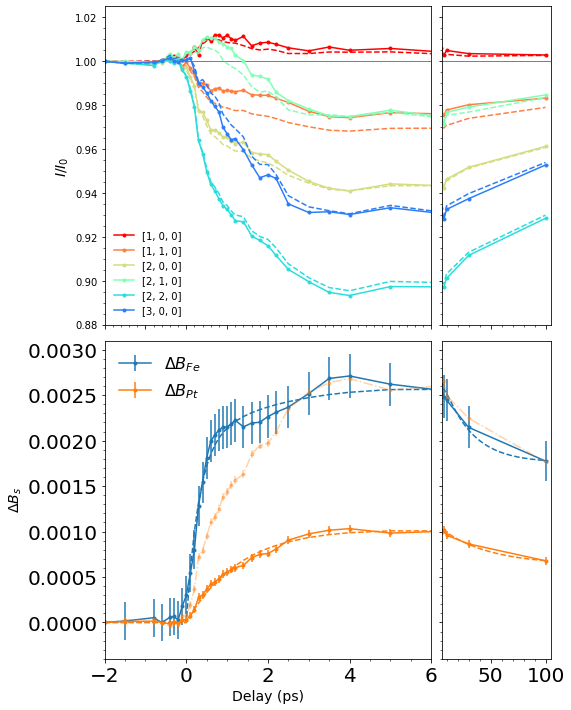

In [163]:
fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, gridspec_kw={'width_ratios': [3, 1]}, figsize = (8,12))#,dpi=300)# sharex=True)

fig.subplots_adjust(hspace=.05)
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

ax1.axhline(1, lw=0.5, c='k')
ax2.axhline(1, lw=0.5, c='k')
cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    sel_bragg_sym = (compact_hkl[:,0] == bragg[0])&(compact_hkl[:,1] == bragg[1])
    fits = compact[sel_bragg_sym]
    fit_errors = compact_errors[sel_bragg_sym]
    fits = np.swapaxes(fits,0,1)
    fit_errors = np.swapaxes(fit_errors,0,1)
    q = q_symmetrised_compact[sel_bragg_sym][0]
    
#     amp_corrected = (np.sqrt(fits[:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2
    amp_corrected = fits[:,0,0]

    I_tmp = amp_corrected
    I_tmp_error = fit_errors[:,0,0]
    
    color = cmap((len(igor_bragg_list) - float(j)+0)/(len(igor_bragg_list)+0))
#     color = cmap((len(igor_bragg_list) - float(j)+0)/(len(igor_bragg_list)+5))

    ax1.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax1.plot(dif.bincenters, amp_DW_Warren_glob_test[:, sel_bragg], '--', color = color)

    ax2.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax2.plot(dif.bincenters, amp_DW_Warren_glob_test[:, sel_bragg], '--', color = color)
    
# ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$I/I_0$', fontsize = 14)
ax1.legend(fontsize = 10, frameon=False)
ax1.set_xlim(-2,6)
ax2.set_xlim(6,105)

ax1.set_ylim(0.88, 1.025)
ax2.set_ylim(0.88, 1.025) 

# ax1.set_ylim(0.77, 1.025)
# ax2.set_ylim(0.77, 1.025) 

ax2.set_yticklabels([]);

ax1.set_xticklabels([]);
ax2.set_xticklabels([]);


ax3.errorbar(dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0], yerr =fe_err_tmp2, c='C0',ls='-',marker = '.', label = r'$\Delta B_{Fe}$')
ax3.errorbar(dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0], yerr =pt_err_tmp2, c='C1',ls ='-',marker = '.', label = r'$\Delta B_{Pt}$')


# ax3.errorbar(dif.bincenters,2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.25, ls ='-.',marker = '.', label = r'$\Delta B_{Pt} \times 2.6$')


ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt_Fe_DW) ,'--')
# ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt1_Fe) ,'--',c='C0')

ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt_Pt_DW) ,'--',c='C1')
# ax3.plot(dif.bincenters, dt.two_expssum_2_with_rec_tau(dif.bincenters,*popt1_Pt) ,'--',c='C1')
ax3.errorbar(dif.bincenters, 2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.',)
# ax3.errorbar(dif.bincenters, 2.2*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.',)

ax3.set_xlim((-2,6))
ax3.set_ylim((-0.0004,0.0031))


ax4.errorbar(dif.bincenters, Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0], yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', )
ax4.errorbar(dif.bincenters, Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0], yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', )
ax4.errorbar(dif.bincenters, 2.6*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.', )
# ax4.errorbar(dif.bincenters, 2.2*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1',alpha = 0.35, ls ='-.',marker = '.', )

ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt_Fe_DW) ,'--', label = 'BFe Fit')
# ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt1_Fe) ,'--',c='C0', label = '')

ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt_Pt_DW) ,'--',c='C1', label = 'BPt Fit')
# ax4.plot(np.arange(-2,100,0.1), dt.two_expssum_2_with_rec_tau(np.arange(-2,100,0.1),*popt1_Pt) ,'--',c='C1', label = '')

ax4.set_xlim((6, 105))
ax4.set_ylim((-0.0004,0.0031))

ax4.set_yticklabels([]);


ax3.set_ylabel('$\Delta B_s$', fontsize = 14)
ax3.set_xlabel('Delay (ps)', fontsize = 14)
ax3.legend(fontsize = 8*2, frameon=False, loc='upper left')



ax3.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='x', labelsize=20)

ax3.tick_params(axis='y', labelsize=20)

# ax1.set_xticklabels(fontsize = 10*3);
# ax2.set_xticklabels(fontsize = 10*3);


## Fitting method: fit like Hermann suggested ( as a function of time instead of q) 

In [164]:
### Hermann suggested: -

In [165]:


odd_sel =  (np.sum(compact_hkl, axis = 1) % 2).astype(bool)
evn_sel = ~(np.sum(compact_hkl, axis = 1) % 2).astype(bool)

sort_odd = np.argsort(q_symmetrised_compact[odd_sel,0])
sort_evn = np.argsort(q_symmetrised_compact[evn_sel,0])

#initialise values for hkl indexes
q_sim_odd = q_symmetrised_compact[odd_sel,0][sort_odd]
q_sim_evn = q_symmetrised_compact[evn_sel,0][sort_evn]

hkl_odd_sorted = compact_hkl[odd_sel][sort_odd]
hkl_evn_sorted = compact_hkl[evn_sel][sort_evn]

#### Filter out zero values
amps_sim = compact[:,:, 0]

# load amp values
amps_sim_odd = amps_sim[odd_sel,0][sort_odd]
amps_sim_evn = amps_sim[evn_sel,0][sort_evn]

q_sim_odd = q_sim_odd[amps_sim_odd.astype(bool)]
q_sim_evn = q_sim_evn[amps_sim_evn.astype(bool)]

hkl_odd_sorted = hkl_odd_sorted[amps_sim_odd.astype(bool)]
hkl_evn_sorted = hkl_evn_sorted[amps_sim_evn.astype(bool)]



lims_evn = q_sim_evn[[0,-1]]
lims_odd = q_sim_odd[[0,-1]]

q_interp = np.concatenate([q_sim_odd, q_sim_evn]) # GEH
hkl_interp = np.concatenate([hkl_odd_sorted, hkl_evn_sorted])

# hkl_interp = hkl_interp[q_interp >= np.asarray([lims_evn[0], lims_odd[0]]).max() ]
# q_interp =     q_interp[q_interp >= np.asarray([lims_evn[0], lims_odd[0]]).max() ]

hkl_interp = hkl_interp[q_interp <= np.asarray([lims_evn[1], lims_odd[1]]).min() ]
q_interp =     q_interp[q_interp <= np.asarray([lims_evn[1], lims_odd[1]]).min() ]

hkl_order = np.argsort(q_interp)
print(q_interp.shape)
print(hkl_order.shape)
print('')


Q2B1_t = np.zeros((35, q_interp.shape[0]))
Q2B2_t = np.zeros((35, q_interp.shape[0]))
q_t = np.zeros((35, q_interp.shape[0]))


for t_idx in np.arange(35):
# t_idx = 0

    q_sim_odd = q_symmetrised_compact[odd_sel,t_idx][sort_odd]
    q_sim_evn = q_symmetrised_compact[evn_sel,t_idx][sort_evn]

    amps_sim_odd = amps_sim[odd_sel,t_idx][sort_odd]
    amps_sim_evn = amps_sim[evn_sel,t_idx][sort_evn]

    # Filter out zero values
    q_sim_odd = q_sim_odd[amps_sim_odd.astype(bool)]
    q_sim_evn = q_sim_evn[amps_sim_evn.astype(bool)]

    amps_sim_odd = amps_sim_odd[amps_sim_odd.astype(bool)]
    amps_sim_evn = amps_sim_evn[amps_sim_evn.astype(bool)]

    #Interpolation
    spl_Warren_odd = interpolate.splrep(q_sim_odd, amps_sim_odd, k=2)
    spl_Warren_evn = interpolate.splrep(q_sim_evn, amps_sim_evn, k=2)

    lims_evn = q_sim_evn[[0,-1]]
    lims_odd = q_sim_odd[[0,-1]]


    q_interp = np.concatenate([q_sim_odd, q_sim_evn]) # GEH
    print(q_interp.shape)
#     q_interp = q_interp[q_interp >= np.asarray([lims_evn[0], lims_odd[0]]).max() ]
    q_interp = q_interp[q_interp <= np.asarray([lims_evn[1], lims_odd[1]]).min() ]

    q_interp = np.sort(q_interp)

    W_odd = interpolate.splev(q_interp, spl_Warren_odd)
    W_evn = interpolate.splev(q_interp, spl_Warren_evn)

    W_dif = np.sqrt(W_evn) - np.sqrt(W_odd)
    W_sum = np.sqrt(W_evn) + np.sqrt(W_odd)

    Q2B1 = np.log(0.5*W_dif)#/ q_interp**2
    Q2B2 = np.log(0.5*W_sum)#/ q_interp**2
    
    Q2B1_t[t_idx] = Q2B1
    Q2B2_t[t_idx] = Q2B2
    q_t[t_idx] = q_interp


(14,)
(14,)

(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)
(16,)


0
1
2
3
4
5
6
7
8
9
10
11
12
13


(-0.1, 0.2)

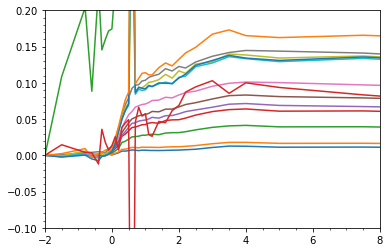

In [166]:
cmap = plt.get_cmap('rainbow')
idx_list = np.arange(len(Q2B1_t[0,:]))
plt.figure()
for i in idx_list:
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list)) 
    print(i)
    plt.plot(dif.bincenters, -(Q2B1_t - Q2B1_t[0])[:, i], '-' )
plt.xlim(-2,8)
plt.ylim(-0.1, 0.2)

In [167]:
label_strings = [hkl_interp[hkl_order][i][0].astype(str) +' '+ hkl_interp[hkl_order][i][1].astype(str) for i in np.arange(len(q_t[0]))]

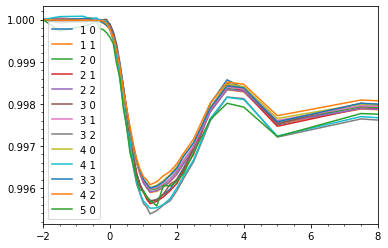

In [168]:
plt.figure()
for i in np.arange(13):
    plt.plot(dif.bincenters, (q_t[:,i] / q_t[0,i]), label = label_strings[i] )
plt.xlim(-2, 8)
plt.legend()

[1 0]
[2 1]
[3 0]
[3 2]
[4 1]
[5 0]


(-50.0, 600.0)

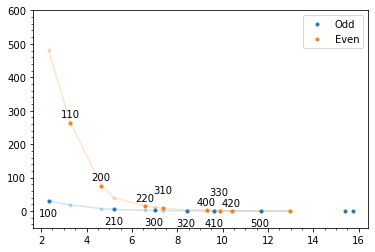

In [169]:

plt.figure()
plt.plot(q_interp, W_odd,'.-', c='C0', alpha = 0.2, )
plt.plot(q_interp, W_evn,'.-', c='C1', alpha = 0.2, )

#loop over odd
for i in np.arange(13):
    txt = (hkl_interp[hkl_order][i][0].astype(str) + '' +
           hkl_interp[hkl_order][i][1].astype(str) + '0')

    if (hkl_interp[hkl_order].sum(axis = 1) % 2 ).astype(bool)[i]:
        print(hkl_interp[hkl_order][i])
        plt.annotate(txt, (q_interp[i], W_odd[i]), xytext=(-10,-15), textcoords='offset points')
    
    else:
        if (hkl_interp[hkl_order][i][0] != 3):
            plt.annotate(txt, (q_interp[i], W_evn[i]), xytext=(-10, 5), textcoords='offset points')
        else:
            plt.annotate(txt, (q_interp[i], W_evn[i]), xytext=(-10, 15), textcoords='offset points')

        
plt.plot(q_sim_odd,amps_sim_odd, '.',c='C0', label = 'Odd')
plt.plot(q_sim_evn,amps_sim_evn, '.',c='C1', label = 'Even')

plt.legend()
plt.ylim(-50, 600)



[1 0]
[2 1]
[3 0]
[3 2]
[4 1]
[5 0]


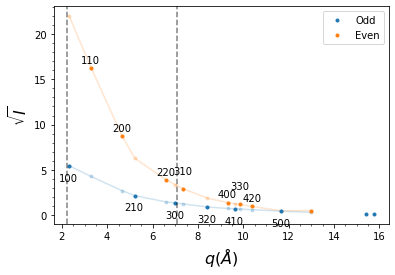

In [170]:
fig, ax = plt.subplots()
plt.plot(q_interp, np.sqrt(W_odd),'.-', c='C0', alpha = 0.2, )
plt.plot(q_interp, np.sqrt(W_evn),'.-', c='C1', alpha = 0.2, )

#loop over odd
for i in np.arange(13):
    txt = (hkl_interp[hkl_order][i][0].astype(str) + '' +
           hkl_interp[hkl_order][i][1].astype(str) + '0')

    if (hkl_interp[hkl_order].sum(axis = 1) % 2 ).astype(bool)[i]:
        print(hkl_interp[hkl_order][i])
        ax.annotate(txt, (q_interp[i], np.sqrt(W_odd[i])), xytext=(-10,-15), textcoords='offset points')
    
    else:
        if (hkl_interp[hkl_order][i][0] != 3):
            ax.annotate(txt, (q_interp[i], np.sqrt(W_evn[i])), xytext=(-10, 5), textcoords='offset points')
        else:
            ax.annotate(txt, (q_interp[i], np.sqrt(W_evn[i])), xytext=(-10, 15), textcoords='offset points')

        
ax.plot(q_sim_odd,np.sqrt(amps_sim_odd), '.',c='C0', label = 'Odd')
ax.plot(q_sim_evn,np.sqrt(amps_sim_evn), '.',c='C1', label = 'Even')
ax.axvline(np.sqrt(max_q), c='k', ls='--', alpha = 0.5)
ax.axvline(np.sqrt(min_q), c='k', ls='--', alpha = 0.5)
ax.set_ylabel(r'$\sqrt{I}$', fontsize = 16)
ax.set_xlabel(r'$q (\AA)$', fontsize = 16)

ax.legend()
# plt.ylim(-50, 600)



## Alternative fitting method: fit through a simulated image

In [171]:
## ##IDEA #1: fit while giving smaller errors to the brightest data (?)
##
## ##IDEA #2: Symetrise your peaks !!! 
##            The fuckery may be coming from the fact that peaks that are supposed to be identical are not in reality .... treat the avg peak intensity ... |
##
##
##

In [172]:
def plot_rectangles (A2, A3, color = 'red', size= 10 ):#int(bz_len/10)):
    '''
    I don't rebember where I got this function from,  probably Igor's 
    '''
    poly,poly_points = ued_dt.rect_profile(*bragg_fits_binned_delays[0,A2][1:3],*bragg_fits_binned_delays[0,A3][1:3],size)
    ax.plot([poly_points[0][1], poly_points[0][2]], [poly_points[1][1], poly_points[1][2]], color = color)
    ax.plot([poly_points[0][2], poly_points[0][3]], [poly_points[1][2], poly_points[1][3]], color = color)
    ax.plot([poly_points[0][3], poly_points[0][0]], [poly_points[1][3], poly_points[1][0]], color = color)
    ax.plot([poly_points[0][0], poly_points[0][1]], [poly_points[1][0], poly_points[1][1]], color = color)

### Create simulated image with the bragg fits for t = -2 ps

In [173]:
%%time
sim_img = np.zeros((1024,1024))
for i in np.arange(120):
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*bragg_fits_binned_delays[0,i]).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
    if ~np.isnan(im_tmp[0,0]):
        sim_img += im_tmp

/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: divide by zero encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: invalid value encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1921: RuntimeWarning: invalid value encountered in double_scalars
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: invalid value encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: divide by zero encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)


CPU times: user 3.37 s, sys: 29.6 ms, total: 3.4 s
Wall time: 3.4 s


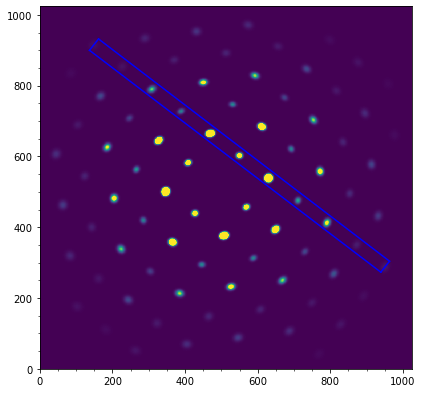

In [174]:
A2,B2,C2,D2,E2,F2,G2,H2 = I_UED_dt.select_braggs_Bragg(h=-1, k=-5, allBragg_indices_2=allBragg_indices_2)
A3,B3,C3,D3,E3,F3,G3,H3 = I_UED_dt.select_braggs_Bragg(h=-1, k=5, allBragg_indices_2=allBragg_indices_2)

fig, ax = plt.subplots(figsize = (8/1.2,8/1.2))

plot_rectangles (A2=A2, A3=A3, color = 'blue', size = 20)
im = ax.pcolormesh(sim_img, vmin = -0, vmax = 10,)


In [175]:
t_idx = 0
image = dif.binned_images[t_idx]

In [176]:
profile = skimage.measure.profile_line(image.T,
                                   bragg_fits_binned_delays[t_idx,A2][1:3],
                                   bragg_fits_binned_delays[t_idx,A3][1:3],
                                   linewidth =  15#int(bz_len/10)
                                       , order=0)


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  """


In [177]:
x_tmp = coef*(np.arange(len(profile))-len(profile)//2)

In [178]:
profile_nobkg = skimage.measure.profile_line(image.T - empty_img2.T,
                                   bragg_fits_binned_delays[t_idx,A2][1:3],
                                   bragg_fits_binned_delays[t_idx,A3][1:3],
                                   linewidth =  15#int(bz_len/10)
                                       , order=0)


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  """


In [179]:
# profile_fitted_img = skimage.measure.profile_line(image.T - empty_img2.T,
profile_fitted_img = skimage.measure.profile_line(sim_img.T,
                                   bragg_fits_binned_delays[t_idx,A2][1:3],
                                   bragg_fits_binned_delays[t_idx,A3][1:3],
                                   linewidth =  15#int(bz_len/10)
                                       , order=0)


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  


In [180]:
hk_idx_2 = np.asarray(hk_idx)


intensities = np.zeros(9)
qs = np.zeros(9)

h= 1
k= 0

for i, h in enumerate(np.arange(-4,5)):
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
    qs[i] = np.sign(h)*np.linalg.norm(bragg_pos[idx])
    intensities[i] = I_UED[idx]

    

In [181]:
%%time
sim_img2 = np.zeros((1024,1024))
for i in np.arange(120):
    h, k = tmp_hk[i]
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
   
    p0 = copy.copy(bragg_fits_binned_delays[0,i])
    p0[0] =  4*I_UED[idx]
    
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*bragg_fits_binned_delays[0,i]).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
    if ~np.isnan(im_tmp[0,0]):
        sim_img2 += im_tmp
sim_img2 += empty_img2

CPU times: user 3.44 s, sys: 0 ns, total: 3.44 s
Wall time: 3.44 s


In [182]:
peak_idx_list = []
for i in [-5,-4,-3,-2,-1,0,1,2,3,4,5]: peak_idx_list.append(I_UED_dt.select_braggs_Bragg(h=-1, k=i, allBragg_indices_2=allBragg_indices_2)[0]) 

In [183]:
%%time
sim_img2 = np.zeros((1024,1024))
for i in np.arange(120):
# for i in peak_idx_list:
#     print(i)

    h, k = tmp_hk[i]
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
   
    p0 = copy.copy(bragg_fits_binned_delays[0,i])
    p0[0] =  4*I_UED[idx]
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]    

    if ~np.isnan(im_tmp[0,0]):
        sim_img2 += im_tmp
sim_img2 += empty_img2

CPU times: user 3.39 s, sys: 2.18 ms, total: 3.39 s
Wall time: 3.39 s


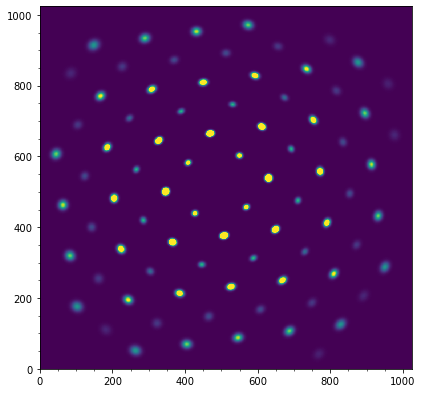

In [184]:
fig, ax = plt.subplots(figsize = (8/1.2,8/1.2))
ax.pcolormesh(sim_img2 - empty_img2, vmin = -0, vmax = 10,)


### A fully simulated image takes too long, creating a reduced image with only a few Braggs

In [185]:
%%time
profile2 = skimage.measure.profile_line(sim_img2.T,
                                   bragg_fits_binned_delays[t_idx,A2][1:3],
                                   bragg_fits_binned_delays[t_idx,A3][1:3],
                                   linewidth =  15#int(bz_len/10)
                                       , order=0)


CPU times: user 67.1 ms, sys: 5.16 ms, total: 72.3 ms
Wall time: 65.8 ms


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  """


In [186]:
%%time

alpha = 6.
Bfe = 0.01660462290744712  # from Jakubs DFT
Bpt = 0.009399430338440849 # from Jakubs DFT 

Bfe = 0.016
Bpt = 0.007

sim_img3 = np.zeros((1024,1024))
for i in peak_idx_list:
    h, k = tmp_hk[i]
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
    p0 = copy.copy(bragg_fits_binned_delays[0,i])
    p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=2., K2=3.0, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
    if ~np.isnan(im_tmp[0,0]):
        sim_img3 += im_tmp
sim_img3 = sim_img3 + 2*np.sqrt(sim_img3)*np.sqrt(np.abs(empty_img2-empty_img))
sim_img3 += empty_img2


profile3 = skimage.measure.profile_line(sim_img3.T,
                                   bragg_fits_binned_delays[t_idx,A2][1:3],
                                   bragg_fits_binned_delays[t_idx,A3][1:3],
                                   linewidth =  15#int(bz_len/10)
                                       , order=0)


CPU times: user 475 ms, sys: 1.09 ms, total: 476 ms
Wall time: 474 ms


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.


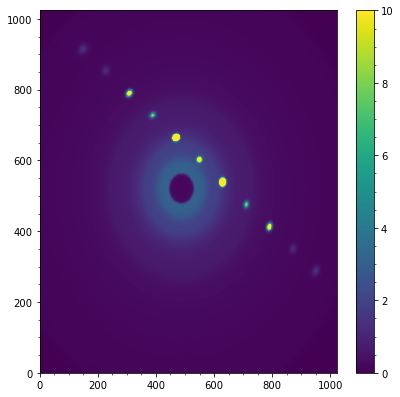

In [187]:
fig, ax = plt.subplots(figsize = (8/1.2,8/1.2))
im = ax.pcolormesh(sim_img3 , vmin = -0, vmax = 10,)
plt.colorbar(im, ax=ax)

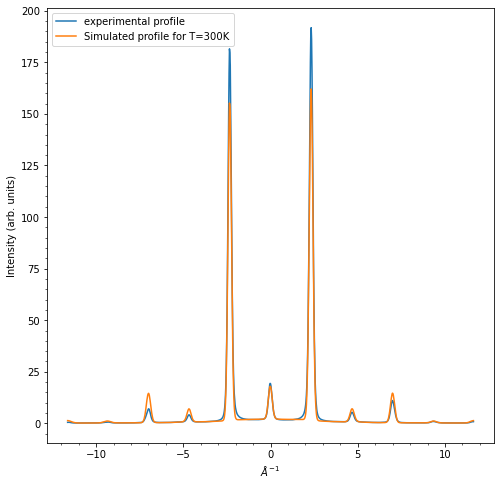

In [188]:
bottom = np.asarray([0,0,1,3,0,3,1,0,0])

plt.figure(figsize = (8,8))

plt.plot(coef*(np.arange(len(profile)) -len(profile)//2) , profile, label='experimental profile')
# plt.plot(coef*(np.arange(len(profile)) -len(profile)//2) , profile_fitted_img, label='fitted profile')
# plt.bar(qs, height=3.8*intensities, bottom=bottom ,width=0.25,color='C1', label = 'simulated intensity')

# plt.plot(coef*(np.arange(len(profile)) -len(profile)//2) , profile2,label = 'profile with simulated intensities' )
plt.plot(coef*(np.arange(len(profile3)) -len(profile3)//2) , profile3, label='Simulated profile for T=300K')

# plt.scatter(qs, 4*intensities)
plt.xlabel('$\AA^{-1}$')
plt.ylabel('Intensity (arb. units)')

plt.legend()
# plt.ylim(-1, 59)
# plt.ylim(-5, 75)
# plt.xlim(1, 7)
# plt.axvline((2.02*np.pi/FePt_a))
# plt.axvline(2*(2.02*np.pi/FePt_a))

In [189]:
x.shape

(1024,)

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


Text(0, 0.5, '$\\AA ^{-1}$')

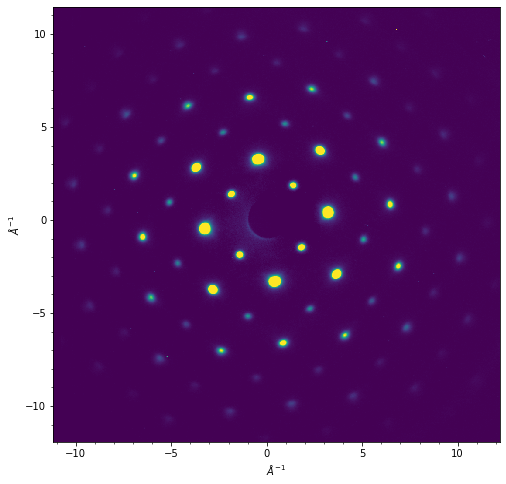

In [190]:
### Bragg points
x = np.arange(1024)
plt.figure(figsize = (8,8))
plt.pcolormesh(coef*(x-dif.centerpos[0]),coef*(x-dif.centerpos[1]), (dif.first_image - empty_img2), vmin = -0, vmax = 10, )
plt.xlabel('$\AA ^{-1}$')
plt.ylabel('$\AA ^{-1}$')




### Using the reduced image to fit the DW factors

In [191]:
def fit_bragg_debye_waller_with_amp(x, alpha = 7, Bfe = 0.018, Bpt = 0.009, K1=2., K2= 1.):
    '''
    calculates the bragg intensity of calculating from tabulated electronic scattering factors:
    takes debye waller factorrs Bfe and Bpt and a proportionality constant. 
    
    Input: 
        alpha : proprtionality factor for the whole scattering trace
        Bfe : B factor for Fe ( the thing in the DW exponential that doesn't depend on q)
        Bpt : B factor for Pt ( the thing in the DW exponential that doesn't depend on q)
    Returns:
        a line profile with the different bragg spots
    '''
    sim_img3 = np.zeros((1024,1024))
    for i in peak_idx_list:
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        
        p0 = copy.copy(bragg_fits_binned_delays[0,i])
        p0[0] = alpha*I_UED_dt.I_UED_f(Bfe=Bfe, Bpt=Bpt, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
        
        im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
        if ~np.isnan(im_tmp[0,0]):
            sim_img3 += im_tmp
    sim_img3 += empty_img2


    profile3 = skimage.measure.profile_line(sim_img3.T,
                                       bragg_fits_binned_delays[t_idx,A2][1:3],
                                       bragg_fits_binned_delays[t_idx,A3][1:3],
                                       linewidth =  15#int(bz_len/10)
                                           , order=0)

    x_tmp = coef*(np.arange(len(profile)) -len(profile)//2)

    f_profile = interpolate.interp1d(x_tmp,profile3)
    
    return f_profile(x)

In [192]:
def fit_bragg_debye_waller_with_2amps(x,Bfe = 0.018, Bpt = 0.009, K1= 2, K2= 3):
    '''
    calculates the bragg intensity of calculating from tabulated electronic scattering factors:
    takes debye waller factorrs Bfe and Bpt and a proportionality constant. 
    
    Input: 
        alpha : proprtionality factor for the whole scattering trace
        Bfe : B factor for Fe ( the thing in the DW exponential that doesn't depend on q)
        Bpt : B factor for Pt ( the thing in the DW exponential that doesn't depend on q)
    Returns:
        a line profile with the different bragg spots
    '''

    t_idx = 0

    sim_img3 = np.zeros((1024,1024))
    for i in peak_idx_list:
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        p0 = copy.copy(bragg_fits_binned_delays[0,i])
        p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    
        im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
        if ~np.isnan(im_tmp[0,0]):
            sim_img3 += im_tmp
    sim_img3 += empty_img2

    profile3 = skimage.measure.profile_line(sim_img3.T,
                                       bragg_fits_binned_delays[t_idx,A2][1:3],
                                       bragg_fits_binned_delays[t_idx,A3][1:3],
                                       linewidth =  15 #int(bz_len/10)
                                           , order=0)

    x_tmp = coef*(np.arange(len(profile)) -len(profile)//2)
    f_profile = interpolate.interp1d(x_tmp,profile3)
    
    return f_profile(x)

In [193]:
def fit_bragg_debye_waller_with_2_fixed_amps(x,Bfe = 0.018, Bpt = 0.009,):
    '''
    calculates the bragg intensity of calculating from tabulated electronic scattering factors:
    takes debye waller factorrs Bfe and Bpt and a proportionality constant. 
    
    Input: 
        alpha : proprtionality factor for the whole scattering trace
        Bfe : B factor for Fe ( the thing in the DW exponential that doesn't depend on q)
        Bpt : B factor for Pt ( the thing in the DW exponential that doesn't depend on q)
    Returns:
        a line profile with the different bragg spots
    '''
    K1 = 2.971984497576519 # I don't remember where these K values came to be
    K2 = 4.038059494185229 # I don't remember where these K values came to be
    
    
    t_idx = 0

    sim_img3 = np.zeros((1024,1024))
    for i in peak_idx_list:
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        p0 = copy.copy(bragg_fits_binned_delays[0,i])
        p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    
        im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
        if ~np.isnan(im_tmp[0,0]):
            sim_img3 += im_tmp
    sim_img3 += empty_img2

    profile3 = skimage.measure.profile_line(sim_img3.T,
                                       bragg_fits_binned_delays[t_idx,A2][1:3],
                                       bragg_fits_binned_delays[t_idx,A3][1:3],
                                       linewidth =  15#int(bz_len/10)
                                           , order=0)

    x_tmp = coef*(np.arange(len(profile)) -len(profile)//2)
    f_profile = interpolate.interp1d(x_tmp,profile3)
    
    return f_profile(x)

In [194]:
%%time
p0 = np.asarray([ 0.018, 0.009, 2.0, 3.0,])
popt, pcov = opt.curve_fit(fit_bragg_debye_waller_with_2amps, x_tmp, profile, p0=p0)
print(popt)

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.


[0.02411437 0.01531875 2.32510669 3.66695267]
CPU times: user 10.6 s, sys: 9.32 ms, total: 10.6 s
Wall time: 10.6 s


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.


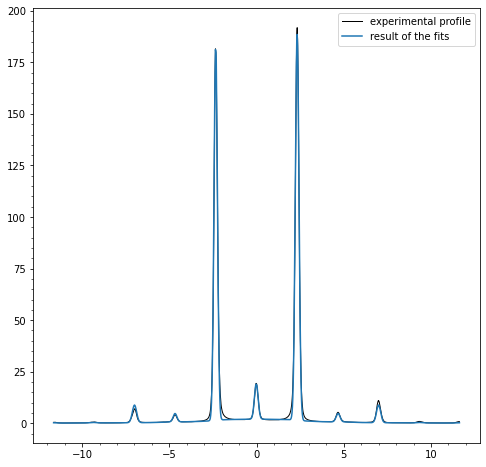

In [195]:
plt.figure(figsize = (8,8))

plt.plot(coef*(np.arange(len(profile)) -len(profile)//2) , profile, c='k', lw = 1, label = 'experimental profile')

plt.plot(x_tmp, fit_bragg_debye_waller_with_2amps(x_tmp, *popt),label = 'result of the fits' )
plt.legend()


In [196]:
sim_img4 = np.zeros((1024,1024))
for i in np.arange(120):

    Bfe = 0.0233963
    Bpt = 0.01550269       

    K1 = 2.34911852
    K2 = 3.66260168

    h, k = tmp_hk[i]
    if (h ==1 )&(k == 0):
        print(h,k)
        print(i)
        print(copy.copy(bragg_fits_binned_delays[0,i]))
        
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
    p0 = copy.copy(bragg_fits_binned_delays[0,i])
    p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
    if ~np.isnan(im_tmp[0,0]):
        sim_img4 += im_tmp
sim_img4 += empty_img2

/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: divide by zero encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: invalid value encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1921: RuntimeWarning: invalid value encountered in double_scalars
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: invalid value encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: divide by zero encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)


1.0 0.0
70
[ 3.06683615e+01  4.28116677e+02  4.40297954e+02  4.72143073e+00
  4.52078546e+00 -3.61912457e-01  2.29091920e-01]


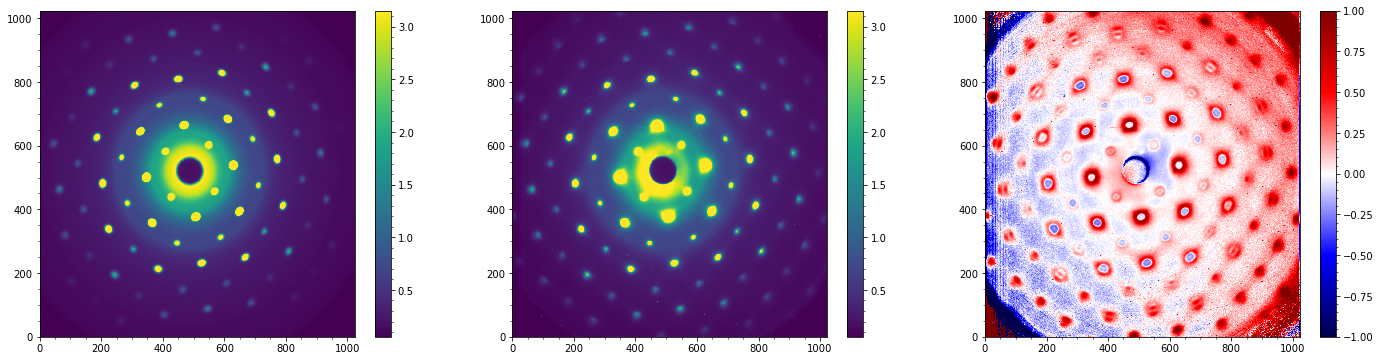

In [197]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize = (16*1.5,4*1.5))
im1 = ax1.pcolormesh(sim_img4, vmin = vmin, vmax=vmax)# - image, cmap = 'seismic')
plt.colorbar(im1, ax=ax1)

im2 = ax2.pcolormesh(image, vmin = vmin, vmax=vmax)# - image, cmap = 'seismic')
plt.colorbar(im2, ax=ax2)

im3 = ax3.pcolormesh((image - sim_img4)/(0.5*(image + sim_img4)), cmap = 'seismic', vmin = -3/3, vmax=3/3)# vmin = vmin, vmax=vmax)# - image, cmap = 'seismic')
plt.colorbar(im3, ax=ax3)

### fit for the whole time range

In [198]:
Afe_profile_time = np.zeros(len(dif.bincenters))
Apt_profile_time = np.zeros(len(dif.bincenters))

K1_profile_time = np.zeros(len(dif.bincenters))
K2_profile_time = np.zeros(len(dif.bincenters))

A_time_pcov = np.zeros((len(dif.bincenters),4,4))

for t_idx in np.arange(len(dif.bincenters)):
    print(t_idx)
    image = dif.binned_images[t_idx]
    profile = skimage.measure.profile_line(image.T,
                                       bragg_fits_binned_delays[t_idx,A2][1:3],
                                       bragg_fits_binned_delays[t_idx,A3][1:3],
                                       linewidth =  15#int(bz_len/10)
                                           , order=0)
    
    
    print(len(profile))
    x_tmp = coef*(np.arange(len(profile)) -len(profile)/2)
    
    def fit_bragg_debye_waller_without_2_fixed_amps(x, Bfe = 0.018, Bpt = 0.009, K1=2, K2=3):
        
        sim_img3 = np.zeros((1024,1024))
        for i in peak_idx_list:

            h, k = tmp_hk[i]
            idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
            p0 = copy.copy(bragg_fits_binned_delays[t_idx,i])
            p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    
            im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[t_idx,i][-1]
            if ~np.isnan(im_tmp[0,0]):
                sim_img3 += im_tmp
        sim_img3 += empty_img2
        profile3 = skimage.measure.profile_line(sim_img3.T,
                                           bragg_fits_binned_delays[t_idx,A2][1:3],
                                           bragg_fits_binned_delays[t_idx,A3][1:3],
                                           linewidth = 15 #int(bz_len/10)
                                               , order=0)

        x_tmp = coef*(np.arange(len(profile)) -len(profile)/2)
        f_profile = interpolate.interp1d(x_tmp,profile3)

        return f_profile(x)

    p0 = np.asarray([0.0233963, 0.01550269, 2.34911852, 3.66260168])
    popt, pcov = opt.curve_fit(fit_bragg_debye_waller_without_2_fixed_amps, x_tmp, profile, p0=p0)

    Afe_profile_time[t_idx] = popt[0]
    Apt_profile_time[t_idx] = popt[1]
    
    K1_profile_time[t_idx] = popt[2]
    K2_profile_time[t_idx] = popt[3]
    

    A_time_pcov[t_idx] = pcov

0
1019


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  app.launch_new_instance()
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.


1
1019
2
1019
3
1019
4
1019
5
1019
6
1019
7
1019
8
1019
9
1019
10
1018
11
1018
12
1018
13
1017
14
1017
15
1016
16
1016
17
1016
18
1016
19
1016
20
1015
21
1015
22
1016
23
1016
24
1016
25
1016
26
1017
27
1017
28
1018
29
1018
30
1017
31
1017
32
1017
33
1018
34
1018


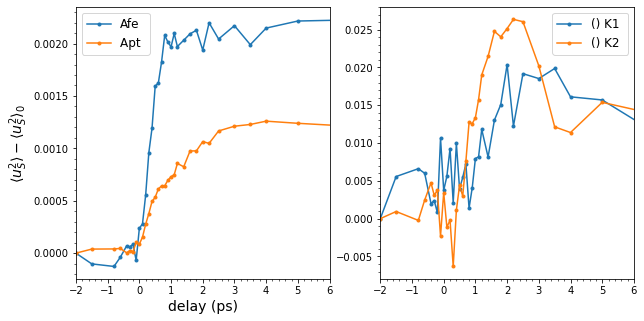

In [199]:
fig, axs = plt.subplots(ncols = 2, figsize = (10,5)) # plt.plot(dif.bincenters, Afe_time-0, '.-', label = 'Afe')

axs[0].plot(dif.bincenters, Afe_profile_time-Afe_profile_time[0], '.-', label = 'Afe')
axs[0].plot(dif.bincenters, Apt_profile_time-Apt_profile_time[0], '.-', label = 'Apt ')
axs[0].set_xlim(-2,6) 
axs[0].legend(fontsize = 12)
axs[0].set_xlabel('delay (ps)', fontsize = 14)
axs[0].set_ylabel(r'$ \langle u^{2}_{S} \rangle - \langle u^{2}_{S} \rangle_0$', fontsize = 14)

axs[1].plot(dif.bincenters, K1_profile_time-K1_profile_time[0], '.-', label = '() K1')
axs[1].plot(dif.bincenters, K2_profile_time-K2_profile_time[0], '.-', label = '() K2 ')
axs[1].set_xlim(-2,6) 
axs[1].legend(fontsize = 12)




In [200]:
K1 = 2.34911852
K2 = 3.66260168

amp_2fixed_amps = np.zeros((35,120))
for time_idx in np.arange(35):
    print(time_idx)
    BFe, Bpt = Afe_profile_time[time_idx] , Apt_profile_time[time_idx]

    for i in np.arange(120):
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        
        amp_2fixed_amps[time_idx, i] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K2_profile_time[time_idx], K2=K1_profile_time[time_idx], bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


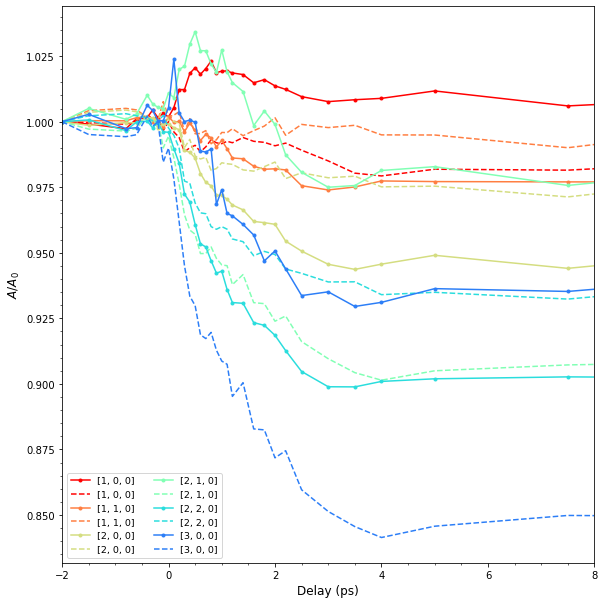

In [201]:
fig, ax1 = plt.subplots(nrows =1, figsize = (10.2/1.2, 10.2/1.2))
cmap = plt.get_cmap('rainbow')
for j, bragg in enumerate(igor_bragg_list):
    sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
    fits = bragg_fits_binned_delays[:,sel_bragg,:]
    
    q = coef*np.sqrt((fits[:,0,1] - dif.centerpos[0])**2 + (fits[:,0,2] - dif.centerpos[1])**2)
    color = cmap((len(igor_bragg_list) - float(j))/len(igor_bragg_list))
    
    amp_corrected = (np.sqrt(fits[:,0,0] + azimuthal_vals_bkg_intrp(q)) - sqrt_azimuthal_vals_bkg_intrp(q))**2
    
    ax1.plot(dif.bincenters, amp_corrected/amp_corrected[0], '.-', color = color, label = bragg)
    ax1.plot(dif.bincenters, amp_2fixed_amps[:, sel_bragg] / amp_2fixed_amps[0, sel_bragg], '--', color = color, label = bragg)


    
    
    
    
ax1.set_xlabel('Delay (ps)', fontsize = 12)
ax1.set_ylabel('$A/A_0$', fontsize = 12)
# ax1.legend(fontsize = 12)
ax1.set_xlim(-2,8)


ax1.legend(ncol = 2, fontsize = 9.5)
# ax1.axhline(1, c='k')
plt.tight_layout()


In [202]:

sim_img4 = np.zeros((1024,1024))
for i in np.arange(120):
    
    Bfe = Afe_profile_time[13]
    Bpt = Apt_profile_time[13]
    
    '''
    ! Need to find a way to use the right values of K1 and K2 throughout the code...
    '''
    
    K1 = 2.34911852
    K2 = 3.66260168
    
#     K1 = 2.971984497576519
#     K2 = 4.038059494185229    

    h, k = tmp_hk[i]
    if (h ==1 )&(k == 0):
        print(h,k)
        print(i)
        print(copy.copy(bragg_fits_binned_delays[0,i]))
        
    idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
    p0 = copy.copy(bragg_fits_binned_delays[0,i])

    p0[0] = I_UED_dt.I_UED_f_coefs(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx )
    im_tmp = ued_dt.Gaussian_2D1([xx,yy],*p0).reshape(1024,1024)-bragg_fits_binned_delays[0,i][-1]
    if ~np.isnan(im_tmp[0,0]):
        sim_img4 += im_tmp
sim_img4 += empty_img2

/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: divide by zero encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1920: RuntimeWarning: invalid value encountered in double_scalars
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1921: RuntimeWarning: invalid value encountered in double_scalars
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: invalid value encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
/cds/home/d/diegotur/UED/ued_dt3.py:1922: RuntimeWarning: divide by zero encountered in double_scalars
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)


1.0 0.0
70
[ 3.06683615e+01  4.28116677e+02  4.40297954e+02  4.72143073e+00
  4.52078546e+00 -3.61912457e-01  2.29091920e-01]


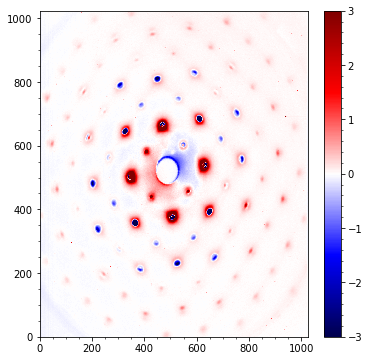

In [203]:
fig, ax3 = plt.subplots(figsize = (4*1.5,4*1.5))

im3 = ax3.pcolormesh((image - sim_img4), cmap = 'seismic', vmin = -3, vmax=3)# vmin = vmin, vmax=vmax)# - image, cmap = 'seismic')
plt.colorbar(im3, ax=ax3)

## Making a  better fitting algorithm ?????

In [205]:
Bfe_time = np.zeros(35)
Bpt_time = np.zeros(35)
K1_time = np.zeros(35)
K2_time = np.zeros(35)

pcov_time = np.zeros((35, 4,4))


for t_idx in np.arange(len(dif.bincenters)):
    
    print(t_idx)

    amps_tmp = bragg_fits_binned_delays[t_idx,:,0]
    good_bragg_fit_mask = amps_tmp!= 0
    amps_tmp = amps_tmp[good_bragg_fit_mask]

    q_vecs_tmp = coef*np.sqrt((bragg_fits_binned_delays[t_idx,:,1][good_bragg_fit_mask] - dif.centerpos[0])**2 + (bragg_fits_binned_delays[t_idx,:,2][good_bragg_fit_mask] - dif.centerpos[1])**2)

    
    #filter out q vetors higher than 10 A-1
    sel_low_q =  q_vecs_tmp**2 < 100
    q_vecs_tmp = q_vecs_tmp[sel_low_q]
    amps_tmp = amps_tmp[sel_low_q]
    good_bragg_fit_mask[np.where(good_bragg_fit_mask)[0][~sel_low_q]] = False
    ###
    
    amps_tmp_corrected = (np.sqrt(amps_tmp + azimuthal_vals_bkg_intrp(q_vecs_tmp)) - sqrt_azimuthal_vals_bkg_intrp(q_vecs_tmp))**2
    allBragg_indices_2_tmp = allBragg_indices_2[good_bragg_fit_mask]
    sel_even_tmp = np.sum(allBragg_indices_2[good_bragg_fit_mask], axis = 1) %2 ==0
    sel_odd_tmp = np.sum(allBragg_indices_2[good_bragg_fit_mask], axis = 1) %2 ==1



    amp_function_res = np.zeros(len(allBragg_indices_2_tmp))
    idx_array_tmp = np.zeros(len(np.arange(120)[good_bragg_fit_mask]))
    
    for j, i in enumerate(np.arange(120)[good_bragg_fit_mask]):
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        idx_array_tmp[j] = idx

    amp_function_res = I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))
#     print(bragg_pos[idx_array_tmp.astype(int)])
    def func_fit_all_blabla(q_vecs_tmp, Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2):
        return I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))



    p0 = np.asarray([ 0.0233963, 0.01550269,  2.34911852, 3.66260168,])
    popt, pcov = opt.curve_fit(func_fit_all_blabla, q_vecs_tmp, amps_tmp_corrected, p0=p0,)
    
    
    Bfe_time[t_idx], Bpt_time[t_idx], K1_time[t_idx], K2_time[t_idx] = popt
    pcov_time[t_idx] = pcov
    
    
    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


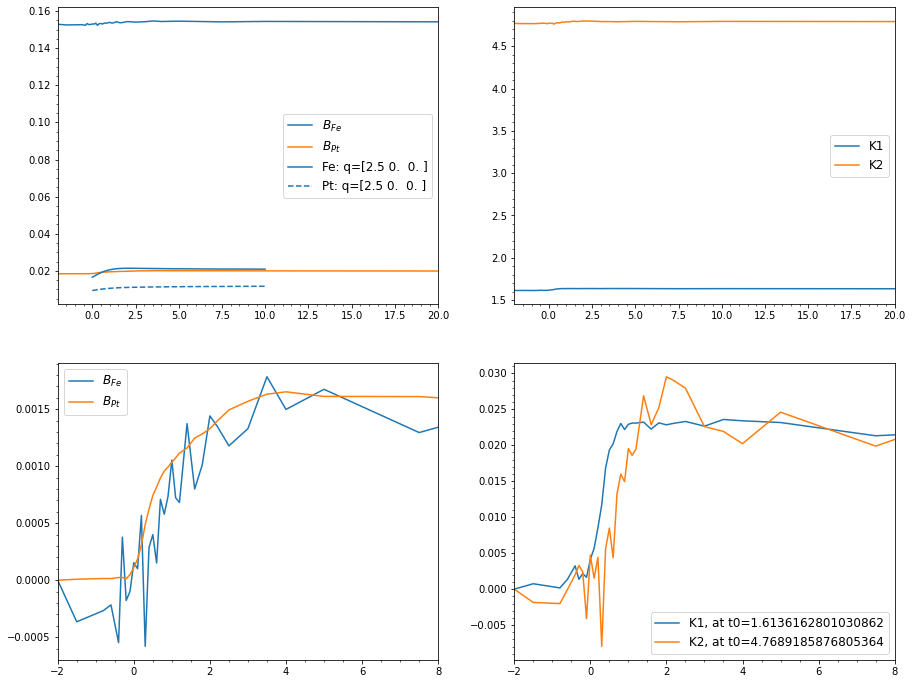

In [206]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(nrows = 2, ncols =2, figsize = (10*1.5,2*4*1.5))

ax1.plot(dif.bincenters, Bfe_time , label = '$B_{Fe}$')
ax1.plot(dif.bincenters, Bpt_time , label = '$B_{Pt}$')


ax1.plot(np.arange(1000)/100,
         data_dict[0]['data']['Unnamed: 3']/np.linalg.norm(data_dict[0]['q'])**2, 
         c=f'C{0}', ls='-', label = 'Fe: q=' + str(data_dict[0]['q']))
ax1.plot( np.arange(1000)/100,
          data_dict[0]['data']['Unnamed: 5']/np.linalg.norm(data_dict[0]['q'])**2,
         c=f'C{0}', ls='--', label = 'Pt: q=' + str(data_dict[0]['q']))



ax1.set_xlim(-2,20)
ax1.legend(fontsize = 12)


ax2.plot(dif.bincenters, K1_time, label = 'K1')
ax2.plot(dif.bincenters, K2_time, label = 'K2')

ax2.set_xlim(-2,20)
ax2.legend(fontsize = 12)




ax3.plot(dif.bincenters, (Bfe_time - Bfe_time[0]) , label = '$B_{Fe}$')
ax3.plot(dif.bincenters, (Bpt_time - Bpt_time[0]) , label = '$B_{Pt}$')

ax3.set_xlim(-2,8)
# ax3.set_ylim(-2,5)

ax3.legend(fontsize = 12)


ax4.plot(dif.bincenters, (K1_time -K1_time[0]) , label = f'K1, at t0={K1_time[0]}')
ax4.plot(dif.bincenters, (K2_time -K2_time[0]) , label = f'K2, at t0={K2_time[0]}')

ax4.set_xlim(-2,8)

ax4.legend(fontsize = 12)

In [207]:
Bfe_time2 = np.zeros(35)
Bpt_time2 = np.zeros(35)
pcov_time2 = np.zeros((35, 2,2))


for t_idx in np.arange(len(dif.bincenters)):
    
    print(t_idx)

    amps_tmp = bragg_fits_binned_delays[t_idx,:,0]
    good_bragg_fit_mask = amps_tmp!= 0
    amps_tmp = amps_tmp[good_bragg_fit_mask]

    q_vecs_tmp = coef*np.sqrt((bragg_fits_binned_delays[t_idx,:,1][good_bragg_fit_mask] - dif.centerpos[0])**2 + (bragg_fits_binned_delays[t_idx,:,2][good_bragg_fit_mask] - dif.centerpos[1])**2)
    amps_tmp_corrected = (np.sqrt(amps_tmp + azimuthal_vals_bkg_intrp(q_vecs_tmp)) - sqrt_azimuthal_vals_bkg_intrp(q_vecs_tmp))**2


    allBragg_indices_2_tmp = allBragg_indices_2[good_bragg_fit_mask]

    sel_even_tmp = np.sum(allBragg_indices_2[good_bragg_fit_mask], axis = 1) %2 ==0
    sel_odd_tmp = np.sum(allBragg_indices_2[good_bragg_fit_mask], axis = 1) %2 ==1

    amp_function_res = np.zeros(len(allBragg_indices_2_tmp))
    
    idx_array_tmp = np.zeros(len(np.arange(120)[good_bragg_fit_mask]))
    for j, i in enumerate(np.arange(120)[good_bragg_fit_mask]):
        h, k = tmp_hk[i]
        idx = np.where((hk_idx_2[:,0] == h)&(hk_idx_2[:,1] == k))[0][0]
        idx_array_tmp[j] = idx

    amp_function_res = I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))

    def func_fit_all_blabla(q_vecs_tmp, Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2):
        '''
        need to do this better, with better names... 
        '''
        return I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))


    p0 = np.asarray([ 0.018, 0.009, 2.0, 3.0,])
    popt, pcov = opt.curve_fit(func_fit_all_blabla, q_vecs_tmp, amps_tmp_corrected, p0=p0)
    
    
    Bfe_time[t_idx], Bpt_time[t_idx], K1_time[t_idx], K2_time[t_idx] = popt
    pcov_time[t_idx] = pcov
    
    
    
    def func_fit_all_peaks_K_fixed(q_vecs_tmp, Bfe=Bfe, Bpt=Bpt,):
        K1 = 1.6302100474088428 # taken from the previous fit for t< t0
        K2 = 4.773320559232641 # taken from the previous fit  for t< t0       
        return I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))
    
    
    p0 = np.asarray([ 0.018, 0.009])
    popt, pcov = opt.curve_fit(func_fit_all_peaks_K_fixed, q_vecs_tmp, amps_tmp_corrected, p0=p0)
    
    
    Bfe_time2[t_idx], Bpt_time2[t_idx] = popt
    pcov_time2[t_idx] = pcov
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


#### Gives a bad fit ( see bellow)

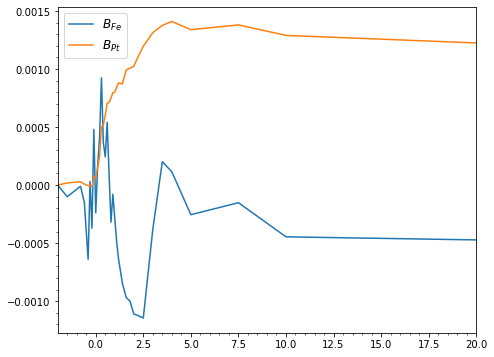

In [208]:
fig, ax1 = plt.subplots(ncols =1, figsize = (5*1.5,4*1.5))

ax1.plot(dif.bincenters, Bfe_time2 - Bfe_time2[0] , label = '$B_{Fe}$')
ax1.plot(dif.bincenters, Bpt_time2 - Bpt_time2[0] , label = '$B_{Pt}$')

ax1.set_xlim(-2,20)
ax1.legend(fontsize = 12)

#### Instead of using the initial value, let's fit K1 and K2 for all times at the same time

In [209]:
amps_time_tmp = bragg_fits_binned_delays[0:35,:,0]
amps_time_tmp
good_bragg_fit_mask = bragg_fits_binned_delays[0,:,0] != 0
amps_time_tmp = amps_time_tmp[:, good_bragg_fit_mask ]
q_vecs_tmp
#     q_vecs_tmp = coef*np.sqrt((bragg_fits_binned_delays[t_idx,:,1][good_bragg_fit_mask] - dif.centerpos[0])**2 + (bragg_fits_binned_delays[t_idx,:,2][good_bragg_fit_mask] - dif.centerpos[1])**2)

amps_tmp_corrected = (np.sqrt(amps_time_tmp + azimuthal_vals_bkg_intrp(q_vecs_tmp)) - sqrt_azimuthal_vals_bkg_intrp(q_vecs_tmp))**2


In [210]:
# def func_fit_all_peaks_K_global(q_vecs_tmp, Bfe_time3 = np.zeros(len(Bfe_time)), Bpt_time3 = np.zeros(len(Bpt_time)),K1=2., K2=4.):

a =0.018*np.ones(35).astype(float)
b = 0.009*np.ones(35).astype(float)

args = [*a, *b, K1, K2]
def func_fit_all_peaks_K_global(q_vecs_tmp, *args):

    K1 = args[-2]
    K2 = args[-1]
    y = np.zeros((35, 81))
    arg_idx = (len(args)-2)//2
    Bfe_time3 = args[:arg_idx]
    Bpt_time3 = args[arg_idx:-2]



    for t_idx2 in np.arange(35 ):
        Bfe = Bfe_time3[t_idx2].astype(float)
        Bpt = Bpt_time3[t_idx2].astype(float)

        y_tmp = I_UED_dt.I_UED_f_coefs2(Bfe=Bfe, Bpt=Bpt, K1=K1, K2=K2, bragg_pos=bragg_pos, hk_idx=hk_idx, i=idx_array_tmp.astype(int))

        y[t_idx2] = y_tmp
    
    return y.flatten()

In [211]:

a =0.018*np.ones(35).astype(float)
b = 0.009*np.ones(35).astype(float)

args = [*a, *b, K1, K2]
K1 = args[-2]
K2 = args[-1]
y = np.zeros((35, 81))
arg_idx = (len(args)-2)//2
Bfe = args[:arg_idx]
Bpt = args[arg_idx:-2]



In [212]:
p0 = [ *a, *b, K1, K2 ]
popt, pcov = opt.curve_fit(func_fit_all_peaks_K_global, q_vecs_tmp, amps_tmp_corrected.flatten(), p0=p0)

Bfe_time3 = popt[0:len(a)]
Bpt_time3 = popt[len(a):-2]
K1_3, K2_3 = popt[-1], popt[-2]

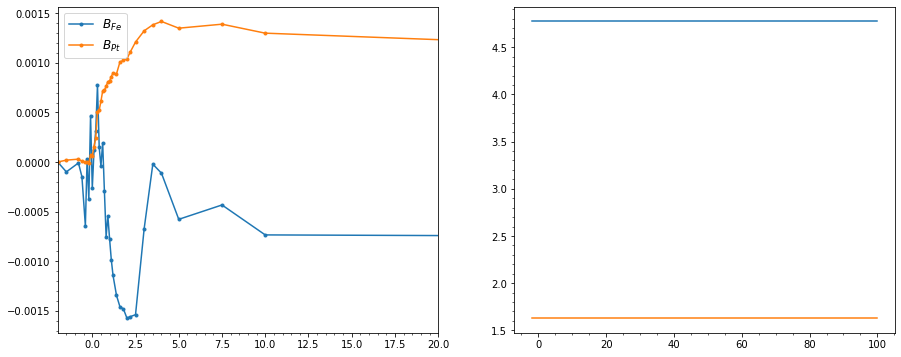

In [213]:
fig, [ax1, ax2] = plt.subplots(ncols =2, figsize = (10*1.5,4*1.5))

ax1.plot(dif.bincenters, Bfe_time3 - Bfe_time3[0] ,'.-',  label = '$B_{Fe}$')
ax1.plot(dif.bincenters, Bpt_time3 - Bpt_time3[0] ,'.-',  label = '$B_{Pt}$')

ax1.set_xlim(-2,20)
ax1.legend(fontsize = 12)

ax2.plot(dif.bincenters, K1_3*np.ones_like(dif.bincenters), label = 'K1')
ax2.plot(dif.bincenters, K2_3*np.ones_like(dif.bincenters), label = 'K2')


# Diffuse Scattering Analysis

## Initialisation of the analysis

### BZ size

In [214]:
s = 0 
len_test = len(dif.fnames)
for i in np.arange(len_test):
    i0_delay = float(dif.fnames[i][106:106+12]) # delay in mm 
    fname_delay = float(dif.fnames_I0[i][95:95+8] ) # delay in mm 
    
    i0_delay = ued_dt.mm_to_ps(i0_delay, zero = dif.t0)
    fname_delay = ued_dt.mm_to_ps(fname_delay, zero = dif.t0)

    s += np.abs(i0_delay - fname_delay)


print('precision is on the order of :')
print(str(s/len_test) + ' ps')
    

precision is on the order of :
0.0001654082665727074 ps


In [215]:
bragg = [1,0,0]
sel_bragg = (allBragg_indices_2[:,0] == bragg[0])&(allBragg_indices_2[:,1] == bragg[1])
fit1 = bragg_fits_binned_delays[:,sel_bragg,:]

bragg2 = [2,0,0]
sel_bragg2 = (allBragg_indices_2[:,0] == bragg2[0])&(allBragg_indices_2[:,1] == bragg2[1])
fit2 = bragg_fits_binned_delays[:,sel_bragg2,:]

In [216]:
bz_len = np.sqrt(np.sum((fit1[0,0,1:3] - fit2[0,0,1:3])**2))

In [217]:
sel_bragg_in_im2 = (
    (allBragg_coord_2[:,0] > 0  )&
    (allBragg_coord_2[:,0] < dif.first_image.shape[0]  )&
    (allBragg_coord_2[:,1] > 0  )&
    (allBragg_coord_2[:,1] < dif.first_image.shape[1]  )
)

### Get the coordinates of the different M and X points 

In [218]:
M_coords = np.zeros((len(allBragg_indices_2),2))
M2_coords = np.zeros((len(allBragg_indices_2),2))
M3_coords = np.zeros((2,2))
X1_coords = np.zeros((len(allBragg_indices_2),2))
X2_coords = np.zeros((len(allBragg_indices_2),2))
X3_coords = np.zeros((len(allBragg_indices_2),2))
X4_coords = np.zeros((len(allBragg_indices_2),2))

M_int = np.zeros(len(allBragg_indices_2))
M2_int = np.zeros(len(allBragg_indices_2))
X1_int = np.zeros(len(allBragg_indices_2))
X2_int = np.zeros(len(allBragg_indices_2))


for n, hkl in enumerate(allBragg_indices_2):

    if sel_bragg_in_im2[n]:
        bragg_coord = allBragg_coord_2[n]
        i= hkl[0]
        j= hkl[1]
        sel_bragg_p1_p0 = (allBragg_indices_2[:,0] == i+1)&(allBragg_indices_2[:,1] == j)&sel_bragg_in_im2
        sel_bragg_p0_p1 = (allBragg_indices_2[:,0] == i)&(allBragg_indices_2[:,1] == j+1)&sel_bragg_in_im2
        sel_bragg_m1_p0 = (allBragg_indices_2[:,0] == i-1)&(allBragg_indices_2[:,1] == j)&sel_bragg_in_im2
        sel_bragg_p0_m1 = (allBragg_indices_2[:,0] == i)&(allBragg_indices_2[:,1] == j-1)&sel_bragg_in_im2        
        
        sel_bragg_p1_p1 = (allBragg_indices_2[:,0] == i+1)&(allBragg_indices_2[:,1] == j+1)&sel_bragg_in_im2

        if sel_bragg_p1_p0.any():
            X1_coords[n] = 0.5*bragg_coord + 0.5*allBragg_coord_2[sel_bragg_p1_p0] 
        if sel_bragg_p0_p1.any():
            X2_coords[n] = 0.5*bragg_coord + 0.5*allBragg_coord_2[sel_bragg_p0_p1]

        if sel_bragg_m1_p0.any():
            X3_coords[n] = 0.5*bragg_coord + 0.5*allBragg_coord_2[sel_bragg_m1_p0] 
        if sel_bragg_p0_m1.any():
            X4_coords[n] = 0.5*bragg_coord + 0.5*allBragg_coord_2[sel_bragg_p0_m1]                
            
        if sel_bragg_p1_p1.any():
            M_coords[n] = 0.5*bragg_coord + 0.5*allBragg_coord_2[sel_bragg_p1_p1]



In [219]:
x_test2 = pd.DataFrame(data = {'h': allBragg_indices_2[:,0], 'k': allBragg_indices_2[:,1], 'l': allBragg_indices_2[:,2],
                               'x_coord':allBragg_coord_2[:,0], 'y_coord':allBragg_coord_2[:,1], 
                               'X_pt1_x_coord':X1_coords[:,0], 'X_pt1_y_coord':X1_coords[:,1],
                               'X_pt2_x_coord':X2_coords[:,0], 'X_pt2_y_coord':X2_coords[:,1],
                               'X_pt3_x_coord':X3_coords[:,0], 'X_pt3_y_coord':X3_coords[:,1],
                               'X_pt4_x_coord':X4_coords[:,0], 'X_pt4_y_coord':X4_coords[:,1],
                              })


In [220]:
x_test3 = copy.deepcopy(x_test2)

In [221]:
h, k, l = allBragg_indices_2[0]
print(i)
# load point indices
A,B,C,D,E,F,G,H = I_UED_dt.select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)

5


In [222]:
test_array = np.arange(allBragg_indices_2.shape[0])

for i in test_array:
    if i in test_array:
        h, k, l = allBragg_indices_2[i]
        print(i)
        # load point indices
        A,B,C,D,E,F,G,H = I_UED_dt.select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)
        I_UED_dt.apply_symmetry(x_test3, A,B,C,D,E,F,G,H)

        if (A in test_array):
            test_array = np.setdiff1d(test_array, A)
        if (B in test_array):
            test_array = np.setdiff1d(test_array, B)
        if (C in test_array):
            test_array = np.setdiff1d(test_array, C)
        if (D in test_array):
            test_array = np.setdiff1d(test_array, D)
        if (E in test_array):
            test_array = np.setdiff1d(test_array, E)
        if (F in test_array):
            test_array = np.setdiff1d(test_array, F)
        if (G in test_array):
            test_array = np.setdiff1d(test_array, G)
        if (H in test_array):
            test_array = np.setdiff1d(test_array, H)
            


0
applying symmetries for points (0, 109, 119, 10, 0, 109, 119, 10)
1
applying symmetries for points (1, 98, 118, 21, 11, 110, 108, 9)
all bragg spots different, exploiting mirror symmetry
2
applying symmetries for points (2, 87, 117, 32, 22, 111, 97, 8)
all bragg spots different, exploiting mirror symmetry
3
applying symmetries for points (3, 76, 116, 43, 33, 112, 86, 7)
all bragg spots different, exploiting mirror symmetry
4
applying symmetries for points (4, 65, 115, 54, 44, 113, 75, 6)
all bragg spots different, exploiting mirror symmetry
5
applying symmetries for points (5, 55, 114, 64, 55, 114, 64, 5)
12
applying symmetries for points (12, 99, 107, 20, 12, 99, 107, 20)
13
applying symmetries for points (13, 88, 106, 31, 23, 100, 96, 19)
all bragg spots different, exploiting mirror symmetry
14
applying symmetries for points (14, 77, 105, 42, 34, 101, 85, 18)
all bragg spots different, exploiting mirror symmetry
15
applying symmetries for points (15, 66, 104, 53, 45, 102, 74, 17)
a

In [223]:
h = 2
k = 0
A,B,C,D,E,F,G,H = I_UED_dt.select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)
# A_M,B_M,C_M,D_M,E_M,F_M,G_M,H_M = select_braggs(h=h, k=k, allBragg_indices_2=allBragg_indices_2)

## Look and align diffuse images

In [224]:
alinged_imgs = np.zeros_like(dif.binned_images)
alingment_warp_matrices = np.zeros( (len(dif.bincenters), *np.eye(3, 3, dtype=np.float32).shape) )

for i, image in enumerate(dif.binned_images):
    
    print(i)

    
    sz = dif.first_image.shape

    # warp_mode = cv2.MOTION_TRANSLATION
    warp_mode = cv2.MOTION_HOMOGRAPHY
    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    
    warp_matrix = np.asarray([[ 9.9841493e-01,  3.0566192e-05,  7.2229356e-01],
       [-9.8849479e-05,  9.9855351e-01,  7.7670795e-01],
       [-1.7143270e-07,  4.6574517e-08,  1.0000000e+00]], dtype=np.float32)
    
    # Specify the number of iterations.
    number_of_iterations = 200;
    
    # Specify the threshold of the increment
    # in the coarrelation coefficient between two iterations
    termination_eps = 1e-5;
    
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (

        dif.binned_images[0].astype(np.float32), 
        dif.binned_images[i].astype(np.float32),

        warp_matrix, warp_mode, criteria, 
        inputMask = None, )
    
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use warpPerspective for Homography
        aligned_image = cv2.warpPerspective (dif.binned_images[i].astype(np.float32), warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use warpAffine for Translation, Euclidean and Affine
        aligned_image = cv2.warpAffine(dif.binned_images[i].astype(np.float32), warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

    
    alinged_imgs[i] = aligned_image
    alingment_warp_matrices[i] = warp_matrix
    
    
    
#     np.save(f'recenter_data/alingned_img_{i}', aligned_image)
#     np.save(f'recenter_data/wrap_matric_{i}', warp_matrix)
    


# np.save(f'recenter_data/All_alingned_imgs', alinged_imgs)
# np.save(f'recenter_data/All_warp_matrices', alingment_warp_matrices)

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


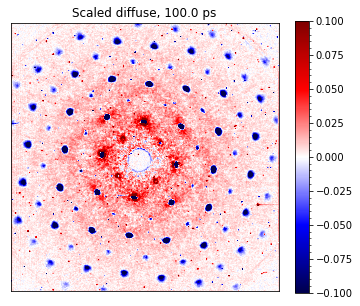

In [225]:
# Show final results
idx = 34

fig, ax2 = plt.subplots(ncols= 1, figsize = (6,5))
im2 = ax2.imshow(alinged_imgs[idx] - alinged_imgs[0], vmin = -.1, vmax= .1, cmap = 'seismic')
ax2.set_title(f'Scaled diffuse, {np.round(dif.bincenters[idx], 4)} ps')
ax2.set_xticks([]);
ax2.set_yticks([]);
plt.colorbar(im2, ax=ax2)


## Get linecuts 

In [226]:

# h = 2
# k = 0

A,B,C,D,E,F,G,H = I_UED_dt.select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)
# A_M,B_M,C_M,D_M,E_M,F_M,G_M,H_M = select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)

In [227]:
def avg_by_idx2(integ, A,B,C,D,E,F,G,H):
    '''
    '''
    val = ((integ[:,A]- integ[:,A][0:4].mean()) + 
           (integ[:,B]- integ[:,B][0:4].mean()) +
           (integ[:,C]- integ[:,C][0:4].mean()) +
           (integ[:,D]- integ[:,D][0:4].mean()) 
#            (integ[:,E]- integ[:,E][0:4].mean()) +
#            (integ[:,F]- integ[:,F][0:4].mean()) +
#            (integ[:,G]- integ[:,G][0:4].mean()) +
#            (integ[:,H]- integ[:,H][0:4].mean()) 
          )/4

    
    return val 

In [228]:
A,B,C,D,E,F,G,H = I_UED_dt.select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)
# A_M,B_M,C_M,D_M,E_M,F_M,G_M,H_M = select_braggs_Bragg(h=h, k=k, allBragg_indices_2=allBragg_indices_2)

### Use Bragg spots to take G-M and G-X paths

In [229]:
h2 = 3
k2 = 0
A2,B2,C2,D2,E2,F2,G2,H2 = I_UED_dt.select_braggs_Bragg(h=h2, k=k2, allBragg_indices_2=allBragg_indices_2)

In [230]:
h3 = h2+0
k3 = k2+1
A3,B3,C3,D3,E3,F3,G3,H3 = I_UED_dt.select_braggs_Bragg(h=h3, k=k3, allBragg_indices_2=allBragg_indices_2)

In [231]:
def plot_rectangles (A2, A3, color = 'red', size=int(bz_len/10)):
    poly,poly_points = ued_dt.rect_profile(*bragg_fits_binned_delays[0,A2][1:3],*bragg_fits_binned_delays[0,A3][1:3],size)
    ax.plot([poly_points[0][1], poly_points[0][2]], [poly_points[1][1], poly_points[1][2]], color = color)
    ax.plot([poly_points[0][2], poly_points[0][3]], [poly_points[1][2], poly_points[1][3]], color = color)
    ax.plot([poly_points[0][3], poly_points[0][0]], [poly_points[1][3], poly_points[1][0]], color = color)
    ax.plot([poly_points[0][0], poly_points[0][1]], [poly_points[1][0], poly_points[1][1]], color = color)

    

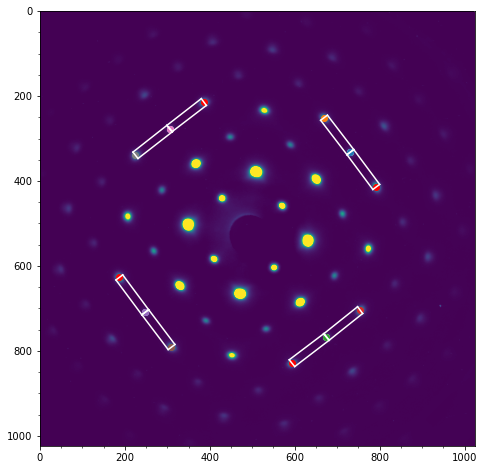

In [232]:
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(image - empty_img2, vmin = -0, vmax = 10,)

ax.scatter(bragg_fits_binned_delays[0,A2][1], bragg_fits_binned_delays[0,A2][2], color = 'white')
ax.scatter(bragg_fits_binned_delays[0,A3][1], bragg_fits_binned_delays[0,A3][2], color = 'red')
plot_rectangles (A2=A2, A3=A3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,B2][1], bragg_fits_binned_delays[0,B2][2], color = 'white')
ax.scatter(bragg_fits_binned_delays[0,B3][1], bragg_fits_binned_delays[0,B3][2], color = 'red')
plot_rectangles (A2=B2, A3=B3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,C2][1], bragg_fits_binned_delays[0,C2][2], color = 'white')
ax.scatter(bragg_fits_binned_delays[0,C3][1], bragg_fits_binned_delays[0,C3][2], color = 'red')
plot_rectangles (A2=C2, A3=C3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,D2][1], bragg_fits_binned_delays[0,D2][2], color = 'white')
ax.scatter(bragg_fits_binned_delays[0,D3][1], bragg_fits_binned_delays[0,D3][2], color = 'red')
plot_rectangles (A2=D2, A3=D3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,E2][1], bragg_fits_binned_delays[0,E2][2], )#color = 'white')
ax.scatter(bragg_fits_binned_delays[0,E3][1], bragg_fits_binned_delays[0,E3][2], )#color = 'red')
plot_rectangles (A2=E2, A3=E3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,F2][1], bragg_fits_binned_delays[0,F2][2], )#color = 'white')
ax.scatter(bragg_fits_binned_delays[0,F3][1], bragg_fits_binned_delays[0,F3][2], )#color = 'red')
plot_rectangles (A2=F2, A3=F3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,G2][1], bragg_fits_binned_delays[0,G2][2], )#color = 'white')
ax.scatter(bragg_fits_binned_delays[0,G3][1], bragg_fits_binned_delays[0,G3][2], )#color = 'red')
plot_rectangles (A2=G2, A3=G3, color = 'white')

ax.scatter(bragg_fits_binned_delays[0,H2][1], bragg_fits_binned_delays[0,H2][2], )#color = 'white')
ax.scatter(bragg_fits_binned_delays[0,H3][1], bragg_fits_binned_delays[0,H3][2], )#color = 'red')
plot_rectangles (A2=H2, A3=H3, color = 'white')


### First we get the corrdinate of all bragg spots

In [233]:
test_A = [[A2,A3], [B2,B3], [C2,C3], [D2,D3],[E2,E3],[F2,F3],[G2,G3],[H2,H3]]
# test_A = [[A2,A3], [B2,B3],[E2,E3],[F2,F3],[G2,G3],[H2,H3]] #this one works for 

for i, letter in enumerate(test_A):
    print(i, letter)

0 [92, 93]
1 [62, 52]
2 [27, 26]
3 [57, 67]
4 [62, 73]
5 [27, 28]
6 [57, 46]
7 [92, 91]


In [234]:
line_profiles = dict()
profile_length = 30
line_profiles_intrp = np.zeros((len(dif.bincenters), 8, profile_length))

for t_idx in np.arange(len(dif.bincenters)):    
#     print(t_idx)
    temp_dict = dict()
    
    image = dif.binned_images[t_idx]#- empty_img2
    for i, letter in enumerate(test_A):
        profile = skimage.measure.profile_line(image.T,
                                           bragg_fits_binned_delays[t_idx,letter[0]][1:3],
                                           bragg_fits_binned_delays[t_idx,letter[1]][1:3],
                                           linewidth =  15#int(bz_len/10)
                                               , order=0)
        
#         print(len(profile))
        # bin profile to the selected number of points: 
        profile_coords = np.arange(len(profile))
        new_x = 100*np.arange(profile_length)/profile_length
        indx_list = np.digitize(profile_coords, new_x)-1

        profile_intrp = np.zeros(profile_length)
        for j, idx in enumerate(indx_list):
            profile_intrp[idx] += profile[j]/np.sum(indx_list == idx)

        line_profiles_intrp[t_idx,i] = profile_intrp

        
    line_profiles[t_idx] = profile
    
    


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'I - I0 (arb. units)')

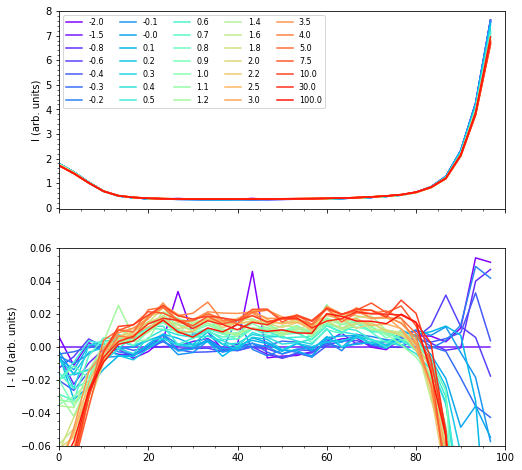

In [235]:
cmap = plt.get_cmap('rainbow')

fig, ax = plt.subplots(2, figsize = (8,8), sharex = True)
for t_idx in np.arange(len(dif.bincenters)-0)+0:
    color = cmap(float(t_idx-0)/(len(a_list)-0))
#     print(line_profiles[t_idx].shape)
    ax[1].plot(new_x, line_profiles_intrp[t_idx,3] - line_profiles_intrp[1,3], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[0].plot(new_x, line_profiles_intrp[t_idx,3],# - line_profiles_intrp[0,3], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )

# plt.ylim(-0.1/2,0.1/2)
ax[0].set_xlim(0,100)
ax[1].set_ylim(-0.06,0.06)



ax[0].legend(ncol = 5,fontsize = 8 )
ax[0].set_ylabel('I (arb. units)')

ax[1].set_ylabel('I - I0 (arb. units)')


In [236]:
symetrised_profile = np.mean(line_profiles_intrp, axis = 1)
symetrised_profile_t0 = np.mean(symetrised_profile[0:6] ,axis = 0)
symetrised_profile_t0.shape

(30,)

(3, 0)
(3, 1)


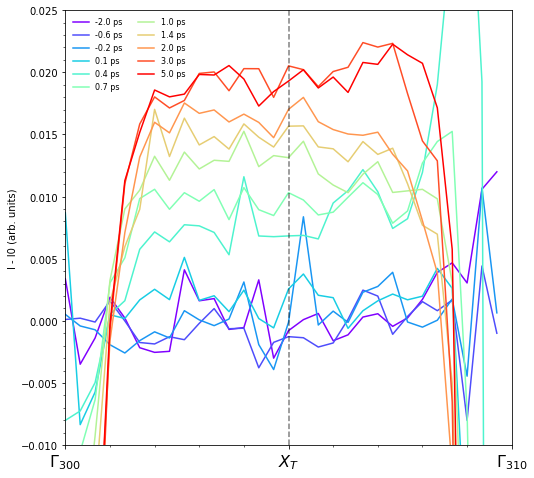

In [237]:
fig, ax = plt.subplots( figsize = (8,8), sharex = True)
for t_idx in np.arange(4, len(dif.bincenters),3)-4:

    color = cmap(float(t_idx)/(len(a_list)-5))
    
    ax.plot(new_x, 0.00*t_idx + symetrised_profile[t_idx] - symetrised_profile[1], 
            color = color, label = f'{np.round(dif.bincenters[t_idx],3)} ps' )

ax.legend(ncol = 2,fontsize = 8 , frameon = False)
ax.set_xlim([0,100])
ax.set_ylim([-0.01,0.025])

ax.set_ylabel('I - I0 (arb. units)')
ax.axvline(50,ls = '--', c='k',alpha = 0.5)

ax.set_xticks([0, 50, 100]);
ax.set_xticklabels([r'$\Gamma_{300}$',r'$X_T$', r'$\Gamma_{310}$',], fontsize = 16)
print((h2, k2))
print((h3, k3))

Text(0, 0.5, 'I - I0 (arb. units)')

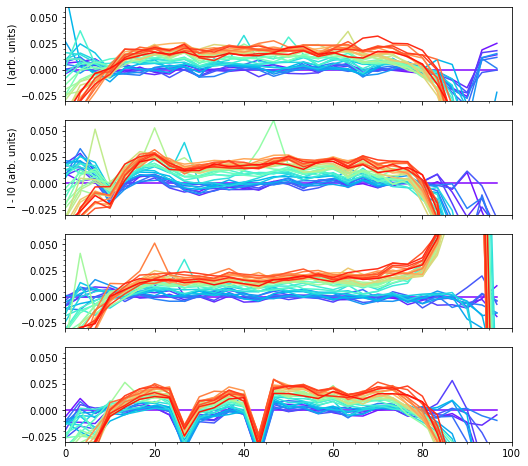

In [238]:
fig, ax = plt.subplots(4, figsize = (8,8), sharex = True)
for t_idx in np.arange(len(dif.bincenters)):
    color = cmap(float(t_idx)/len(a_list))
#     print(line_profiles[t_idx].shape)
    
    ax[0].plot(new_x, line_profiles_intrp[t_idx,0] - line_profiles_intrp[0,0], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[1].plot(new_x, line_profiles_intrp[t_idx,1] - line_profiles_intrp[0,1], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[2].plot(new_x, line_profiles_intrp[t_idx,2] - line_profiles_intrp[0,2], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[3].plot(new_x, line_profiles_intrp[t_idx,3] - line_profiles_intrp[0,3], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )


# plt.ylim(-0.1/2,0.1/2)
ax[0].set_xlim(0,100)
ax[0].set_ylim(-0.06/2,0.06)

ax[1].set_xlim(0,100)
ax[1].set_ylim(-0.06/2,0.06)
ax[2].set_xlim(0,100)
ax[2].set_ylim(-0.06/2,0.06)
ax[3].set_xlim(0,100)
ax[3].set_ylim(-0.06/2,0.06)

# ax[0].legend(ncol = 5,fontsize = 8 )
ax[0].set_ylabel('I (arb. units)')

ax[1].set_ylabel('I - I0 (arb. units)')


Text(0, 0.5, 'I - I0 (arb. units)')

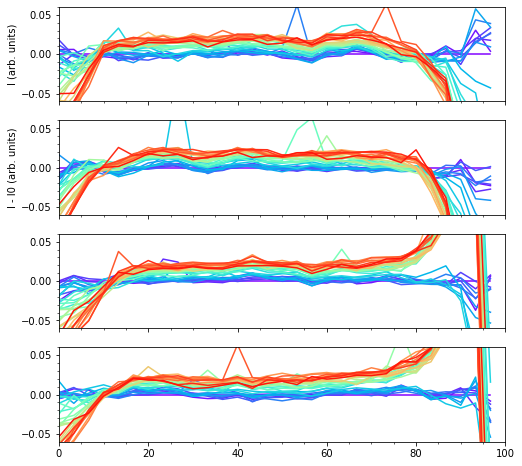

In [239]:
fig, ax = plt.subplots(4, figsize = (8,8), sharex = True)
for t_idx in np.arange(len(dif.bincenters)):
    color = cmap(float(t_idx)/len(a_list))
#     print(line_profiles[t_idx].shape)
    
    ax[0].plot(new_x, line_profiles_intrp[t_idx,4] - line_profiles_intrp[0,4], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[1].plot(new_x, line_profiles_intrp[t_idx,1+4] - line_profiles_intrp[0,1+4], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[2].plot(new_x, line_profiles_intrp[t_idx,2+4] - line_profiles_intrp[0,2+4], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )
    
    ax[3].plot(new_x, line_profiles_intrp[t_idx,3+4] - line_profiles_intrp[0,3+4], 
             color = color, label = np.round(dif.bincenters[t_idx],3) )


# plt.ylim(-0.1/2,0.1/2)
ax[0].set_xlim(0,100)
ax[0].set_ylim(-0.06,0.06)

ax[1].set_xlim(0,100)
ax[1].set_ylim(-0.06,0.06)
ax[2].set_xlim(0,100)
ax[2].set_ylim(-0.06,0.06)
ax[3].set_xlim(0,100)
ax[3].set_ylim(-0.06,0.06)

# ax[0].legend(ncol = 5,fontsize = 8 )
ax[0].set_ylabel('I (arb. units)')

ax[1].set_ylabel('I - I0 (arb. units)')


In [240]:
def norm_tmp(profile):
    subtracted = profile /profile[0:4].mean()
    return subtracted

In [241]:
def subt0_tmp(profile):
    subtracted = profile -profile[0:4].mean()
    return subtracted

## PLOTS FOR DIFFERENT BRAGG BZ

### 100 to (110, 200, 210)

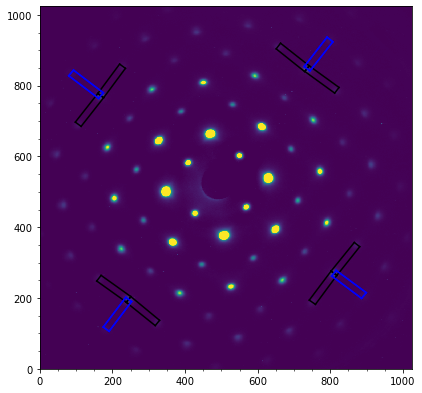

In [242]:
fig, ax = plt.subplots(figsize = (8/1.2,8/1.2))
ax.pcolormesh(image - empty_img2, vmin = -0, vmax = 10,)


h2 = 4
k2 = 0
A2,B2,C2,D2,E2,F2,G2,H2 = I_UED_dt.select_braggs_Bragg(h=h2, k=k2, allBragg_indices_2=allBragg_indices_2)

h3 = h2+0
k3 = k2+1
A3,B3,C3,D3,E3,F3,G3,H3 = I_UED_dt.select_braggs_Bragg(h=h3, k=k3, allBragg_indices_2=allBragg_indices_2)


plot_rectangles (A2=A2, A3=A3, color = 'k')
plot_rectangles (A2=B2, A3=B3, color = 'k')
plot_rectangles (A2=C2, A3=C3, color = 'k')
plot_rectangles (A2=D2, A3=D3, color = 'k')
plot_rectangles (A2=E2, A3=E3, color = 'k')
plot_rectangles (A2=F2, A3=F3, color = 'k')
plot_rectangles (A2=G2, A3=G3, color = 'k')
plot_rectangles (A2=H2, A3=H3, color = 'k')



h3 = h2+1
k3 = k2+0
A3,B3,C3,D3,E3,F3,G3,H3 = I_UED_dt.select_braggs_Bragg(h=h3, k=k3, allBragg_indices_2=allBragg_indices_2)


plot_rectangles (A2=A2, A3=A3, color = 'blue')
plot_rectangles (A2=B2, A3=B3, color = 'blue')
plot_rectangles (A2=C2, A3=C3, color = 'blue')
plot_rectangles (A2=D2, A3=D3, color = 'blue')
plot_rectangles (A2=E2, A3=E3, color = 'blue')
plot_rectangles (A2=F2, A3=F3, color = 'blue')
plot_rectangles (A2=G2, A3=G3, color = 'blue')
plot_rectangles (A2=H2, A3=H3, color = 'blue')



## Here is the q dot k

In [243]:
def profile_func(test_A, dif, retrun_intrp = False):
    '''
    Arguments:
    test_A : List of indexes, the indexes should correspond to the bragg spot
    return_intrp : if ==True always returns 100 point arrays
    
    Retruns:
    dictionary with the profiles 
    if return_intrp == True the profiles have always 100 point length
    '''

    line_profiles = dict()
    profile_length = 100
    line_profiles_intrp = np.zeros((len(dif.bincenters), len(test_A), profile_length))

    
    for t_idx in np.arange(len(dif.bincenters)):
        image = dif.binned_images[t_idx]#- empty_img2
        for i, letter in enumerate(test_A):
            profile = skimage.measure.profile_line(image.T,
                                               bragg_fits_binned_delays[t_idx,letter[0]][1:3],
                                               bragg_fits_binned_delays[t_idx,letter[1]][1:3],
                                               linewidth =  15#int(bz_len/10)
                                                   , order=0)

            profile_coords = np.arange(len(profile))
            new_x = 100*np.arange(profile_length)/profile_length
            indx_list = np.digitize(profile_coords, new_x)-1

            profile_intrp = np.zeros(profile_length)
            for j, idx in enumerate(indx_list):
                profile_intrp[idx] += profile[j]/np.sum(indx_list == idx)
            line_profiles_intrp[t_idx,i] = profile_intrp
        line_profiles[t_idx] = profile
    
    
    if retrun_intrp == True:
        return line_profiles_intrp
    else:
        return line_profiles

    

1 0


/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.


1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0


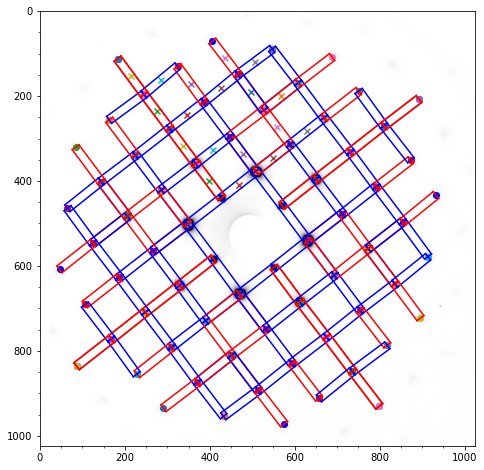

In [244]:
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(image - empty_img2, vmin = -0, vmax = 10,cmap = 'binary')

big_profile_dict_2 = dict()
big_profile_dict_3 = dict()

big_X_pos_dict_2 = dict()
big_X_pos_dict_3 = dict()

big_X_pos_dict_2_20pc = dict()
big_X_pos_dict_3_20pc = dict()
big_X_pos_dict_2_60pc = dict()
big_X_pos_dict_3_60pc = dict()


big_A1_pos_dict = dict()
big_A2_pos_dict = dict()
big_A3_pos_dict = dict()


already_start_point = np.asarray([])


iter_list = [[1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2], [3, 0], [3, 1], [3, 2],[4, 0]]

for h,k in iter_list:
    print(h,k)
    
    
# for h in range(1,4):
#     for k in range(3):
#         print(h, k)

    A1,B1,C1,D1,E1,F1,G1,H1 = I_UED_dt.select_braggs_Bragg(h=h,   k=k,   allBragg_indices_2=allBragg_indices_2)
    A2,B2,C2,D2,E2,F2,G2,H2 = I_UED_dt.select_braggs_Bragg(h=h+1, k=k,   allBragg_indices_2=allBragg_indices_2)
    A3,B3,C3,D3,E3,F3,G3,H3 = I_UED_dt.select_braggs_Bragg(h=h,   k=k+1, allBragg_indices_2=allBragg_indices_2)

    test = np.asarray([A1,B1,C1,D1,E1,F1,G1,H1])
    if ((A1 not in already_start_point)and(B1 not in already_start_point)
        and(C1 not in already_start_point)and(D1 not in already_start_point)
        and(E1 not in already_start_point)and(F1 not in already_start_point)
        and(G1 not in already_start_point)and(H1 not in already_start_point)):

        already_start_point= np.append(already_start_point,test )

        test_A = [[A1,A2], [B1,B2], [C1,C2], [D1,D2],[E1,E2],[F1,F2],[G1,G2],[H1,H2]]
        big_profile_dict_2[h,k] = profile_func(test_A, dif, retrun_intrp = True)

        test_A2 = [[A1,A3], [B1,B3], [C1,C3], [D1,D3],[E1,E3],[F1,F3],[G1,G3],[H1,H3]]
        big_profile_dict_3[h,k] = profile_func(test_A2, dif, retrun_intrp = True)

#         #### Too problematic, won't implement
#         if (bragg_fits_binned_delays[0,[A2,B2,C2,D2,E2,F2,G2,H2], 1:3] == 0.).any():
#             print('fuck')
#         else:

        big_X_pos_dict_2[h+1,k] = 0.5*(bragg_fits_binned_delays[0,A1][1:3] + bragg_fits_binned_delays[0,A2][1:3])
        big_X_pos_dict_3[h,k+1] = 0.5*(bragg_fits_binned_delays[0,A1][1:3] + bragg_fits_binned_delays[0,A3][1:3])
        
        
        big_X_pos_dict_2_20pc[h+1,k] = (0.3*bragg_fits_binned_delays[0,A1][1:3] + 0.7*bragg_fits_binned_delays[0,A2][1:3])
        big_X_pos_dict_3_20pc[h,k+1] = (0.3*bragg_fits_binned_delays[0,A1][1:3] + 0.7*bragg_fits_binned_delays[0,A3][1:3])
        big_X_pos_dict_2_60pc[h+1,k] = (0.7*bragg_fits_binned_delays[0,A1][1:3] + 0.3*bragg_fits_binned_delays[0,A2][1:3])
        big_X_pos_dict_3_60pc[h,k+1] = (0.7*bragg_fits_binned_delays[0,A1][1:3] + 0.3*bragg_fits_binned_delays[0,A3][1:3])
        
        
        
        big_A1_pos_dict[h,k]   = bragg_fits_binned_delays[0,A1][1:3]
        big_A2_pos_dict[h+1,k] = bragg_fits_binned_delays[0,A2][1:3]
        big_A3_pos_dict[h,k+1] = bragg_fits_binned_delays[0,A3][1:3]


        ax.scatter(bragg_fits_binned_delays[0,A2][1], bragg_fits_binned_delays[0,A2][2], color = 'blue')
        ax.scatter(bragg_fits_binned_delays[0,A3][1], bragg_fits_binned_delays[0,A3][2], color = 'red')
        plot_rectangles (A2=A1, A3=A3, color = 'blue')
        plot_rectangles (A2=A1, A3=A2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,B2][1], bragg_fits_binned_delays[0,B2][2], color = 'blue')
        ax.scatter(bragg_fits_binned_delays[0,B3][1], bragg_fits_binned_delays[0,B3][2], color = 'red')
        plot_rectangles (A2=B1, A3=B3, color = 'blue')
        plot_rectangles (A2=B1, A3=B2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,C2][1], bragg_fits_binned_delays[0,C2][2], color = 'blue')
        ax.scatter(bragg_fits_binned_delays[0,C3][1], bragg_fits_binned_delays[0,C3][2], color = 'red')
        plot_rectangles (A2=C1, A3=C3, color = 'blue')
        plot_rectangles (A2=C1, A3=C2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,D2][1], bragg_fits_binned_delays[0,D2][2], color = 'blue')
        ax.scatter(bragg_fits_binned_delays[0,D3][1], bragg_fits_binned_delays[0,D3][2], color = 'red')
        plot_rectangles (A2=D1, A3=D3, color = 'blue')
        plot_rectangles (A2=D1, A3=D2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,E2][1], bragg_fits_binned_delays[0,E2][2], )#color = 'white')
        ax.scatter(bragg_fits_binned_delays[0,E3][1], bragg_fits_binned_delays[0,E3][2], )#color = 'red')
        plot_rectangles (A2=E1, A3=E3, color = 'blue')
        plot_rectangles (A2=E1, A3=E2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,F2][1], bragg_fits_binned_delays[0,F2][2], )#color = 'white')
        ax.scatter(bragg_fits_binned_delays[0,F3][1], bragg_fits_binned_delays[0,F3][2], )#color = 'red')
        plot_rectangles (A2=F1, A3=F3, color = 'blue')
        plot_rectangles (A2=F1, A3=F2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,G2][1], bragg_fits_binned_delays[0,G2][2], )#color = 'white')
        ax.scatter(bragg_fits_binned_delays[0,G3][1], bragg_fits_binned_delays[0,G3][2], )#color = 'red')
        plot_rectangles (A2=G1, A3=G3, color = 'blue')
        plot_rectangles (A2=G1, A3=G2, color = 'red')

        ax.scatter(bragg_fits_binned_delays[0,H2][1], bragg_fits_binned_delays[0,H2][2], )#color = 'white')
        ax.scatter(bragg_fits_binned_delays[0,H3][1], bragg_fits_binned_delays[0,H3][2], )#color = 'red')
        plot_rectangles (A2=H1, A3=H3, color = 'blue')
        plot_rectangles (A2=H1, A3=H2, color = 'red')


for i in np.arange(len(list(big_X_pos_dict_3.keys()))):
    key2_tmp = list(big_X_pos_dict_2.keys())[i]
    key3_tmp = list(big_X_pos_dict_3.keys())[i]
    
    plt.scatter(big_X_pos_dict_2[key2_tmp][0], big_X_pos_dict_2[key2_tmp][1], marker='x')
    plt.scatter(big_X_pos_dict_3[key3_tmp][0], big_X_pos_dict_3[key3_tmp][1], marker='x')

#         print(A1,B1,C1,D1,E1,F1,G1,H1)
#         print(A1, A2, A3)

In [245]:
print(test_A)
print(test_A2)

[[103, 114], [63, 64], [16, 5], [56, 55], [63, 64], [16, 5], [56, 55], [103, 114]]
[[103, 104], [63, 53], [16, 15], [56, 66], [63, 74], [16, 17], [56, 45], [103, 102]]


In [246]:
print(list(big_A1_pos_dict.keys()))
print(list(big_A2_pos_dict.keys()))
print(list(big_A3_pos_dict.keys()))

[(1, 0), (1, 1), (1, 2), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0)]
[(2, 0), (2, 1), (2, 2), (3, 0), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0)]
[(1, 1), (1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 3), (4, 1)]


In [247]:
L_projection_X2 = np.zeros(len( list(big_A1_pos_dict.keys()) ))
L_projection_X3 = np.zeros(len( list(big_A1_pos_dict.keys()) ))

L_projection_X2_20pc = np.zeros(len( list(big_A1_pos_dict.keys()) ))
L_projection_X3_20pc = np.zeros(len( list(big_A1_pos_dict.keys()) ))
L_projection_X2_60pc = np.zeros(len( list(big_A1_pos_dict.keys()) ))
L_projection_X3_60pc = np.zeros(len( list(big_A1_pos_dict.keys()) ))


q_X2 =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))
q_X3 =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))

q_X2_20pc =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))
q_X3_20pc =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))
q_X2_60pc =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))
q_X3_60pc =  np.zeros((len( list(big_A1_pos_dict.keys()) ), 2))


I_X2_profile = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35, 100))
I_X3_profile = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35, 100))


I_X2 = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))
I_X3 = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))

I_X2_20pc = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))
I_X3_20pc = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))
I_X2_60pc = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))
I_X3_60pc = np.zeros((len( list(big_A1_pos_dict.keys()) ), 35))

bragg_paths2 = []
bragg_paths3 = []

for i in range( len( list(big_A1_pos_dict.keys()) ) ):
    key1 = list(big_A1_pos_dict.keys())[i]
    key2 = list(big_A2_pos_dict.keys())[i]
    key3 = list(big_A3_pos_dict.keys())[i]
    print(key1)
    k_X2     = (coef*(big_A2_pos_dict[key2] - big_A1_pos_dict[key1]) /2 )
    k_X3     = (coef*(big_A3_pos_dict[key3] - big_A1_pos_dict[key1]) /2 )
    
    q_tmp_X2 = coef*(big_X_pos_dict_2[key2] - dif.centerpos)    
    q_tmp_X3 = coef*(big_X_pos_dict_3[key3] - dif.centerpos) 

    q_tmp_X2_20pc = coef*(big_X_pos_dict_2_20pc[key2] - dif.centerpos)    
    q_tmp_X3_20pc = coef*(big_X_pos_dict_3_20pc[key3] - dif.centerpos) 
    q_tmp_X2_60pc = coef*(big_X_pos_dict_2_60pc[key2] - dif.centerpos)    
    q_tmp_X3_60pc = coef*(big_X_pos_dict_3_60pc[key3] - dif.centerpos) 

    print(key1, key2,  np.dot(k_X2,q_tmp_X2) / (np.linalg.norm(q_tmp_X2)*np.linalg.norm(k_X2) ) )
    print(key1, key3,  np.dot(k_X3,q_tmp_X3) / (np.linalg.norm(q_tmp_X3)*np.linalg.norm(k_X3) ) )
#     print(key1, key2,  np.dot(k_X2,q_tmp_X2_20pc) / (np.linalg.norm(q_tmp_X2_20pc)*np.linalg.norm(k_X2) ) )
#     print(key1, key3,  np.dot(k_X3,q_tmp_X3_60pc) / (np.linalg.norm(q_tmp_X3_60pc)*np.linalg.norm(k_X3) ) )
    print('')
    
    L_projection_X2[i] = np.dot(k_X2,q_tmp_X2) / (np.linalg.norm(q_tmp_X2)*np.linalg.norm(k_X2) )
    L_projection_X3[i] = np.dot(k_X3,q_tmp_X3) / (np.linalg.norm(q_tmp_X3)*np.linalg.norm(k_X3) )
    
    L_projection_X2_20pc[i] = np.dot(k_X2,q_tmp_X2_20pc) / (np.linalg.norm(q_tmp_X2_20pc)*np.linalg.norm(k_X2) )
    L_projection_X3_20pc[i] = np.dot(k_X3,q_tmp_X3_20pc) / (np.linalg.norm(q_tmp_X3_20pc)*np.linalg.norm(k_X3) )
    L_projection_X2_60pc[i] = np.dot(k_X2,q_tmp_X2_60pc) / (np.linalg.norm(q_tmp_X2_60pc)*np.linalg.norm(k_X2) )
    L_projection_X3_60pc[i] = np.dot(k_X3,q_tmp_X3_60pc) / (np.linalg.norm(q_tmp_X3_60pc)*np.linalg.norm(k_X3) )
    
    q_X2[i] = q_tmp_X2
    q_X3[i] = q_tmp_X3
    
    q_X2_20pc[i] = q_tmp_X2_20pc
    q_X3_20pc[i] = q_tmp_X3_20pc
    q_X2_60pc[i] = q_tmp_X2_60pc
    q_X3_60pc[i] = q_tmp_X3_60pc    
    
    I_X2_profile[i] = big_profile_dict_2[key1].mean(axis = (1))
    I_X3_profile[i] = big_profile_dict_3[key1].mean(axis = (1))
    
    I_X2[i] = big_profile_dict_2[key1][:,:,40:60].mean(axis = (1,2))
    I_X3[i] = big_profile_dict_3[key1][:,:,40:60].mean(axis = (1,2))
    I_X2_20pc[i] =  big_profile_dict_2[key1][:,:,20:40].mean(axis = (1,2))
    I_X3_20pc[i] =  big_profile_dict_3[key1][:,:,20:40].mean(axis = (1,2))
    I_X2_60pc[i] =  big_profile_dict_2[key1][:,:,60:80].mean(axis = (1,2))
    I_X3_60pc[i] =  big_profile_dict_3[key1][:,:,60:80].mean(axis = (1,2))    
    
    
    bragg_paths2.append([key1, key2])
    bragg_paths3.append([key1, key3])
    
    

(1, 0)
(1, 0) (2, 0) 0.9999985909769316
(1, 0) (1, 1) 0.46367103644221275

(1, 1)
(1, 1) (2, 1) 0.835674285346118
(1, 1) (1, 2) 0.8384963528849322

(1, 2)
(1, 2) (2, 2) 0.6037917368318423
(1, 2) (1, 3) 0.9296398122463336

(2, 0)
(2, 0) (3, 0) 0.9999942453644957
(2, 0) (2, 1) 0.2629168627395578

(2, 2)
(2, 2) (3, 2) 0.7932659851251445
(2, 2) (2, 3) 0.7907847706600439

(3, 0)
(3, 0) (4, 0) 0.9999979238089756
(3, 0) (3, 1) 0.17603710709252327

(3, 1)
(3, 1) (4, 1) 0.9649775604113787
(3, 1) (3, 2) 0.4786561478757709

(3, 2)
(3, 2) (4, 2) 0.8635349994656021
(3, 2) (3, 3) 0.6317355182450748

(4, 0)
(4, 0) (5, 0) 0.9999553109969974
(4, 0) (4, 1) 0.1754346713229785



In [248]:
GX_path12 = np.append(np.asarray(list(big_A1_pos_dict.keys())), np.asarray(list(big_A2_pos_dict.keys())), axis = 1)
GX_path13 = np.append(np.asarray(list(big_A1_pos_dict.keys())), np.asarray(list(big_A3_pos_dict.keys())), axis = 1)
GX_paths = np.append(GX_path12,GX_path13, axis = 0)


In [249]:
L_projection = np.append(L_projection_X2,  L_projection_X3)
L_projection_20pc = np.append(L_projection_X2_20pc,  L_projection_X3_20pc)
L_projection_60pc = np.append(L_projection_X2_60pc,  L_projection_X3_60pc)

# bragg_list_full = np.append


I_X_profile = np.append(I_X2_profile,I_X3_profile, axis = 0)
I_X = np.append(I_X2, I_X3, axis = 0)
I_X_20pc = np.append(I_X2_20pc, I_X3_20pc, axis = 0)
I_X_60pc = np.append(I_X2_60pc, I_X3_60pc, axis = 0)

q_X = np.append(q_X2,  q_X3, axis = 0)
q_X_20pc = np.append(q_X2_20pc,  q_X3_20pc, axis = 0)
q_X_60pc = np.append(q_X2_60pc,  q_X3_60pc, axis = 0)

Bragg_key_2 = (np.asarray(list(big_A1_pos_dict.keys())) + np.asarray(list(big_A2_pos_dict.keys())))/2
Bragg_key_3 = (np.asarray(list(big_A1_pos_dict.keys())) + np.asarray(list(big_A3_pos_dict.keys())))/2

Bragg_key_2_20pc = np.floor(Bragg_key_2) + (Bragg_key_2 %1)*(0.3/0.5)
Bragg_key_3_20pc = np.floor(Bragg_key_3) + (Bragg_key_3 %1)*(0.3/0.5)

Bragg_key_2_60pc = np.floor(Bragg_key_2) + (Bragg_key_2 %1)*(0.6/0.5)
Bragg_key_3_60pc = np.floor(Bragg_key_3) + (Bragg_key_3 %1)*(0.6/0.5)

Bragg_key = np.append(Bragg_key_2, Bragg_key_3, axis = 0)
Bragg_key_20pc = np.append(Bragg_key_2_20pc, Bragg_key_3_20pc, axis = 0)
Bragg_key_60pc = np.append(Bragg_key_2_60pc, Bragg_key_3_60pc, axis = 0)

In [250]:
Bragg_key_2

array([[1.5, 0. ],
       [1.5, 1. ],
       [1.5, 2. ],
       [2.5, 0. ],
       [2.5, 2. ],
       [3.5, 0. ],
       [3.5, 1. ],
       [3.5, 2. ],
       [4.5, 0. ]])

In [251]:
idx_list = np.argsort(L_projection)

L_projection_sorted = L_projection[idx_list]
L_projection_20pc_sorted = L_projection_20pc[idx_list]
L_projection_60pc_sorted = L_projection_60pc[idx_list]

I_X_profile_sorted = I_X_profile[idx_list]
I_X_sorted = I_X[idx_list]
I_X_20pc_sorted = I_X_20pc[idx_list]
I_X_60pc_sorted = I_X_60pc[idx_list]


q_X_sorted = q_X[idx_list]
q_X_20pc_sorted = q_X_20pc[idx_list]
q_X_60pc_sorted = q_X_60pc[idx_list]

Bragg_key_sorted = Bragg_key[idx_list]
Bragg_key_sorted_20pc = Bragg_key_20pc[idx_list]
Bragg_key_sorted_60pc = Bragg_key_60pc[idx_list]

GX_paths_sorted = GX_paths[idx_list]


In [252]:
sel_time = (dif.bincenters >-2.)&(dif.bincenters < 9.)
time_fits_raw_popt = np.zeros((I_X.shape[0], 4))
time_fits_raw__with_recov_popt = np.zeros((I_X.shape[0], 6))

In [253]:
time_fits_raw_popt = np.zeros((I_X.shape[0], 4))

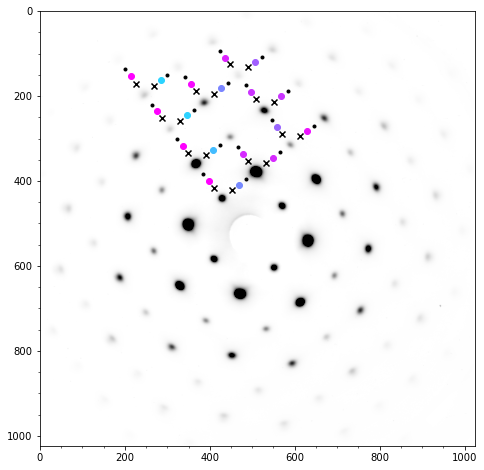

In [254]:
# fig, ax = plt.subplots(figsize = (8,8), dpi = 150)
fig, ax = plt.subplots(figsize = (8,8))

ax.imshow(image - empty_img2, vmin = -0, vmax = 10,cmap = 'binary',)
cmap = plt.get_cmap('cool')
for i in np.arange(len(list(big_X_pos_dict_3.keys()))):
    key2_tmp = list(big_X_pos_dict_2.keys())[i]
    key3_tmp = list(big_X_pos_dict_3.keys())[i]
    
    color = cmap(L_projection_X2[i])
    plt.scatter(big_X_pos_dict_2[key2_tmp][0], big_X_pos_dict_2[key2_tmp][1], marker='o', color=color)
    color = cmap(L_projection_X3[i])
    plt.scatter(big_X_pos_dict_3[key3_tmp][0], big_X_pos_dict_3[key3_tmp][1], marker='o', color=color)
    
    plt.scatter(big_X_pos_dict_3_20pc[key3_tmp][0], big_X_pos_dict_3_20pc[key3_tmp][1], marker='.', color='k')
    plt.scatter(big_X_pos_dict_2_20pc[key2_tmp][0], big_X_pos_dict_2_20pc[key2_tmp][1], marker='.', color='k')
    
    plt.scatter(big_X_pos_dict_3_60pc[key3_tmp][0], big_X_pos_dict_3_60pc[key3_tmp][1], marker='x', color='k')
    plt.scatter(big_X_pos_dict_2_60pc[key2_tmp][0], big_X_pos_dict_2_60pc[key2_tmp][1], marker='x', color='k')


In [255]:
for i in np.arange(I_X.shape[0] -0 ):
    
    color = cmap(L_projection_sorted[i])
    
    time_tmp = dif.bincenters[sel_time]
    val_tmp = (I_X_sorted[i] - I_X_sorted[i][0])[sel_time]*1
    
    p0 = [val_tmp[-1]/2, 1, 0, 1 ]
    
    print(
    np.round(p0[0], 3), np.round(1/p0[1], 3), 
    np.round(p0[2], 3), np.round(1/p0[3], 3), )
    
    popt, pcov = opt.curve_fit(dt.two_expssum_free , time_tmp, val_tmp, p0=p0, bounds =[[0,0,0,0],[np.inf,np.inf,np.inf,np.inf ]] )
    time_fits_raw_popt[i] = popt
    print(
    np.round(popt[0], 3), np.round(1/popt[1], 3), 
    np.round(popt[2], 3), np.round(1/popt[3], 3), )
    
    time_tmp = dif.bincenters#[sel_time]
    val_tmp = 1*(I_X_sorted[i] - I_X_sorted[i][0])#[sel_time]
    p0 = np.append(popt, np.asarray([val_tmp[-1], 0.01/30 ]) )
    popt, pcov = opt.curve_fit(dt.two_expssum_2_with_rec , time_tmp, val_tmp, p0=p0, bounds = [0, np.inf])#bounds =[[0,0,0, 0,-np.inf,0],[np.inf,np.inf,np.inf, np.inf,0.000001,np.inf ]])
    time_fits_raw__with_recov_popt[i] = popt
    
    print(
    np.round(p0[0], 3), np.round(1/p0[1], 3), 
    np.round(p0[2], 3), np.round(1/p0[3], 3), 
    np.round(p0[4], 3), np.round(1/p0[5], 3),  
    )
    
    print(
        np.round(time_fits_raw__with_recov_popt[i][0], 3), np.round(1/time_fits_raw__with_recov_popt[i][1], 3), 
        np.round(time_fits_raw__with_recov_popt[i][2], 3), np.round(1/time_fits_raw__with_recov_popt[i][3], 3), 
        np.round(time_fits_raw__with_recov_popt[i][4], 3), np.round(1/time_fits_raw__with_recov_popt[i][5], 3),  
    )
    print('')


0.006 1.0 0 1.0
0.0 0.308 0.012 0.871
0.0 0.308 0.012 0.871 0.01 3000.0
0.005 0.311 0.01 1.983 0.005 20.39

0.01 1.0 0 1.0
0.0 0.415 0.02 0.893
0.0 0.415 0.02 0.893 0.015 3000.0
0.01 0.562 0.012 1.691 0.007 20.642

0.017 1.0 0 1.0
0.035 0.414 0.0 0.999
0.035 0.414 0.0 0.999 0.024 3000.0
0.005 0.16 0.032 1.316 0.019 87.23

0.018 1.0 0 1.0
0.036 0.215 0.0 0.889
0.036 0.215 0.0 0.889 0.027 3000.0
0.013 0.418 0.027 1.604 0.013 27.089

0.009 1.0 0 1.0
0.0 0.215 0.017 0.92
0.0 0.215 0.017 0.92 0.012 3000.0
0.004 0.294 0.016 1.533 0.008 19.312

0.012 1.0 0 1.0
0.0 2.995 0.025 0.604
0.0 2.995 0.025 0.604 0.018 3000.0
0.0 16.134 0.026 0.636 0.008 31.492

0.006 1.0 0 1.0
0.0 0.973 0.012 0.744
0.0 0.973 0.012 0.744 0.009 3000.0
0.003 2.452 0.01 0.674 0.005 15.214

0.008 1.0 0 1.0
0.0 0.098 0.014 0.628
0.0 0.098 0.014 0.628 0.01 3000.0
0.01 0.406 0.009 2.951 0.009 15.242

0.008 1.0 0 1.0
0.0 0.098 0.014 0.628
0.0 0.098 0.014 0.628 0.01 3000.0
0.01 0.406 0.009 2.951 0.009 15.242

0.013 1.0 0 1.0
0.

(-2.0, 6.0)

<Figure size 864x576 with 0 Axes>

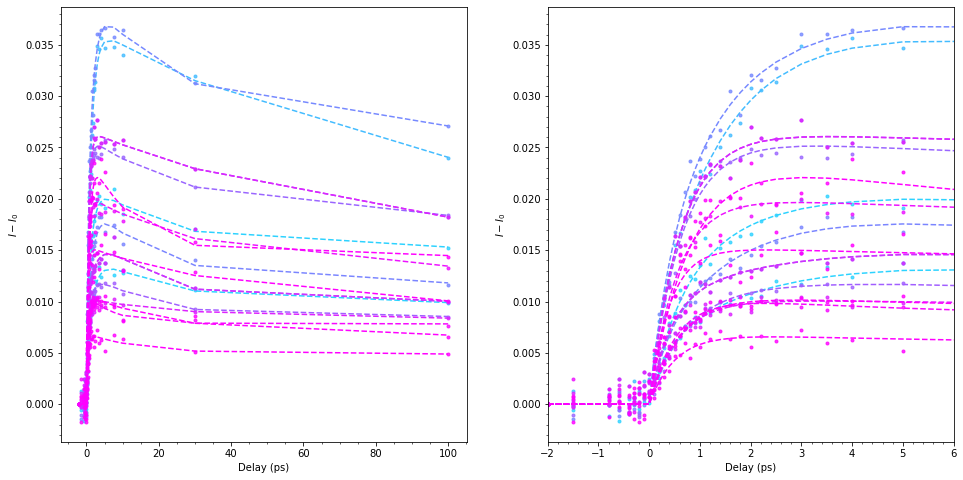

In [256]:
plt.figure(figsize = (12,8))
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize = (16,8))
for i in np.arange(I_X.shape[0] -0 ):
    
    color = cmap(L_projection_sorted[i])
 
    ax1.plot(dif.bincenters,1*(I_X_sorted[i] - I_X_sorted[i][0]),'.', color = color, alpha = 0.8 , label = f'${Bragg_key[i][0], Bragg_key[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
    ax1.plot(dif.bincenters,dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i]),'--', color = color )

    ax2.plot(dif.bincenters,1*(I_X_sorted[i] - I_X_sorted[i][0]),'.', color = color, alpha = 0.8 , label = f'${Bragg_key[i][0], Bragg_key[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
    ax2.plot(dif.bincenters,dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i]),'--', color = color )

    
ax1.set_xlabel('Delay (ps)')
ax1.set_ylabel(r'$I - I_0$')

ax2.set_xlabel('Delay (ps)')
ax2.set_ylabel(r'$I - I_0$')
ax2.set_xlim(-2,6)

In [257]:
Bragg_key_sorted

array([[4. , 0.5],
       [3. , 0.5],
       [2. , 0.5],
       [1. , 0.5],
       [3. , 1.5],
       [1.5, 2. ],
       [3. , 2.5],
       [2. , 2.5],
       [2.5, 2. ],
       [1.5, 1. ],
       [1. , 1.5],
       [3.5, 2. ],
       [1. , 2.5],
       [3.5, 1. ],
       [4.5, 0. ],
       [2.5, 0. ],
       [3.5, 0. ],
       [1.5, 0. ]])

Text(0, 0.5, '$I - I_0$')

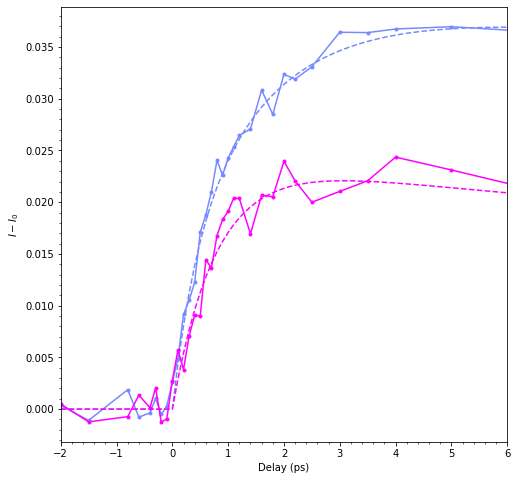

In [258]:
cmap = plt.get_cmap('cool')

plt.figure(figsize = (8,8))
# plt.figure(figsize = (5,6))
# plt.figure(figsize = (2,8))

for i in np.asarray([3, -1]):
    
    color = cmap(L_projection_sorted[i])   
    plt.plot(time_tmp, 1*(I_X_sorted[i] - I_X_sorted[i][0:5].mean()),'.-', color = color, alpha = 1 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: \cos \  \\theta = $ {np.round(L_projection_sorted[i], 3)}')
    plt.plot(np.arange(-2, 100, 0.1),dt.two_expssum_2_with_rec(np.arange(-2, 100, 0.1), *time_fits_raw__with_recov_popt[i]),'--', color = color, label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}:$ fit' )

plt.xlim(-2,10)
plt.xlim(-2,6)
# plt.xlim(6,105)
# plt.legend(frameon = False)
plt.xlabel('Delay (ps)')
plt.ylabel(r'$I - I_0$')

Text(0, 0.5, '$I - I_0$')

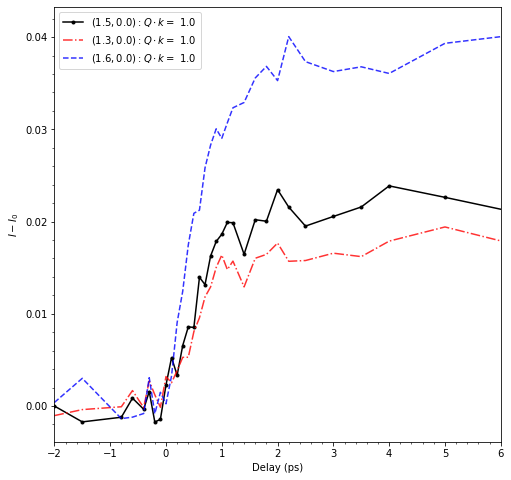

In [259]:
cmap = plt.get_cmap('cool')

plt.figure(figsize = (8,8))

i=-1
color = cmap(L_projection_sorted[i])
    
# plt.plot(time_tmp, 1*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = 'k', alpha = 1 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
# plt.plot(time_tmp, 1*(I_X_20pc_sorted[i]- I_X_20pc_sorted[i][0]),'-.', color = 'r', alpha = 0.8 , label = f'${Bragg_key_sorted_20pc[i][0], Bragg_key_sorted_20pc[i][1]}: Q \cdot k = $ {np.round(L_projection_20pc_sorted[i], 3)}')
# plt.plot(time_tmp, 1*(I_X_60pc_sorted[i]- I_X_60pc_sorted[i][0]),'--', color = 'b', alpha = 0.8 , label = f'${Bragg_key_sorted_60pc[i][0], Bragg_key_sorted_60pc[i][1]}: Q \cdot k = $ {np.round(L_projection_60pc_sorted[i], 3)}')

plt.plot(time_tmp, 1*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = 'k', alpha = 1 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
plt.plot(time_tmp, 0.725*(I_X_20pc_sorted[i]- (I_X_20pc_sorted[i][0:5]).mean()),'-.', color = 'r', alpha = 0.8 , label = f'${Bragg_key_sorted_20pc[i][0], Bragg_key_sorted_20pc[i][1]}: Q \cdot k = $ {np.round(L_projection_20pc_sorted[i], 3)}')
plt.plot(time_tmp, 1.2*(I_X_60pc_sorted[i]- (I_X_60pc_sorted[i][0:5]).mean()),'--', color = 'b', alpha = 0.8 , label = f'${Bragg_key_sorted_60pc[i][0], Bragg_key_sorted_60pc[i][1]}: Q \cdot k = $ {np.round(L_projection_60pc_sorted[i], 3)}')


plt.xlim(-2,10)
plt.xlim(-2,6)
# plt.xlim(6,105)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel(r'$I - I_0$')

In [260]:
mask1_list = np.where(1/time_fits_raw__with_recov_popt[:,1] > 1/time_fits_raw__with_recov_popt[:,3])
mask2_list = np.where(~(1/time_fits_raw__with_recov_popt[:,1] > 1/time_fits_raw__with_recov_popt[:,3]))

(-0.1, 5.0)

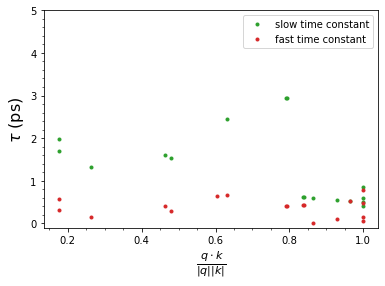

In [261]:
plt.figure()

plt.plot(L_projection_sorted[mask1_list], 1/time_fits_raw__with_recov_popt[:,1][mask1_list], '.', c='C2', label = 'slow time constant')
plt.plot(L_projection_sorted[mask2_list], 1/time_fits_raw__with_recov_popt[:,3][mask2_list], '.', c='C2', )

plt.plot(L_projection_sorted[mask2_list], 1/time_fits_raw__with_recov_popt[:,1][mask2_list], '.', c='C3', label = 'fast time constant')
plt.plot(L_projection_sorted[mask1_list], 1/time_fits_raw__with_recov_popt[:,3][mask1_list], '.', c='C3', )

plt.legend()

# plt.plot(L_projection_sorted**2, time_fits_raw__with_recov_popt[:,6], '.-')

plt.xlabel(r'$\frac{q \cdot k}{\| q \| \| k \|}$', fontsize = 16)

plt.ylabel(r'$\tau$ (ps)', fontsize = 16)
plt.ylim(-0.1, 5)



(-0.1, 1.2)

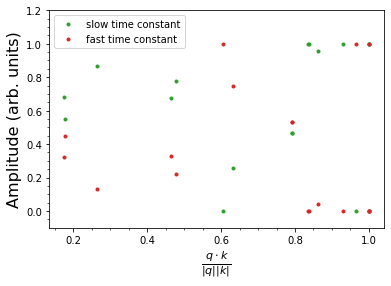

In [262]:
plt.figure()
# plt.plot(L_projection_sorted**1, time_fits_raw__with_recov_popt[:,0])


# plt.plot(L_projection_sorted, 1/time_fits_raw__with_recov_popt[:,3], '.-',  label = 'slow time constant')
# plt.plot(L_projection_sorted, 1/time_fits_raw__with_recov_popt[:,1], '.-',  label = 'slow time constant')

plt.plot(L_projection_sorted[mask1_list], (time_fits_raw__with_recov_popt[:,0]/(time_fits_raw__with_recov_popt[:,0] + time_fits_raw__with_recov_popt[:,2]))[mask1_list], '.', c='C2', label = 'slow time constant')
plt.plot(L_projection_sorted[mask2_list], (time_fits_raw__with_recov_popt[:,2]/(time_fits_raw__with_recov_popt[:,0] + time_fits_raw__with_recov_popt[:,2]))[mask2_list], '.', c='C2', )

plt.plot(L_projection_sorted[mask2_list], (time_fits_raw__with_recov_popt[:,0]/(time_fits_raw__with_recov_popt[:,0] + time_fits_raw__with_recov_popt[:,2]))[mask2_list], '.', c='C3', label = 'fast time constant')
plt.plot(L_projection_sorted[mask1_list], (time_fits_raw__with_recov_popt[:,2]/(time_fits_raw__with_recov_popt[:,0] + time_fits_raw__with_recov_popt[:,2]))[mask1_list], '.', c='C3', )

plt.legend()

# plt.plot(L_projection_sorted**2, time_fits_raw__with_recov_popt[:,6], '.-')

plt.xlabel(r'$\frac{q \cdot k}{\| q \| \| k \|}$', fontsize = 16)

plt.ylabel(r'Amplitude (arb. units)', fontsize = 16)
plt.ylim(-0.1, 1.2)



(-0.1, 10.0)

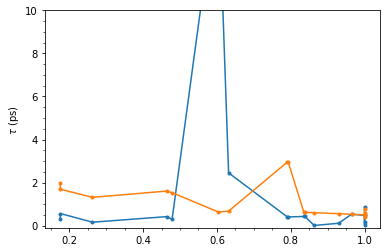

In [263]:
plt.figure()
# plt.plot(L_projection_sorted**1, time_fits_raw__with_recov_popt[:,0])
plt.plot(L_projection_sorted, 1/time_fits_raw__with_recov_popt[:,1], '.-', c='C0', label = 'fast time constant')
plt.plot(L_projection_sorted, 1/time_fits_raw__with_recov_popt[:,3], '.-', c='C1', label = 'slow time constant')

# plt.plot(L_projection_sorted**2, time_fits_raw__with_recov_popt[:,6], '.-')
plt.ylabel(r'$\tau$ (ps)')
plt.ylim(-0.1, 10)

Text(0, 0.5, '$I - I_0$ (norm, 100ps =1 )')

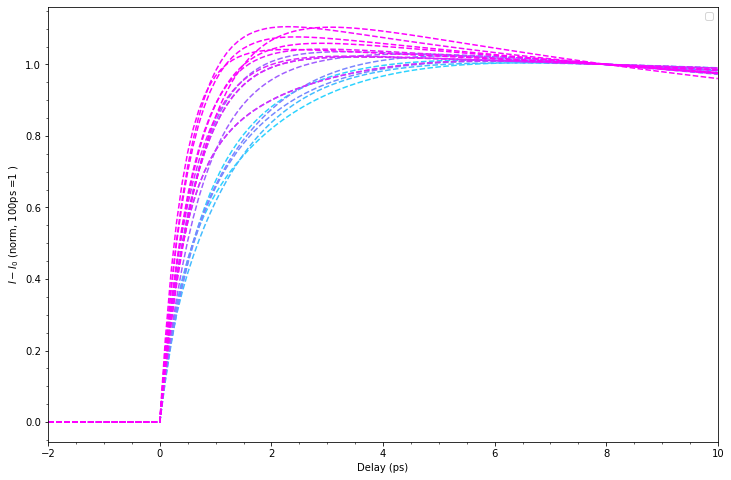

In [264]:
cmap = plt.get_cmap('cool')

plt.figure(figsize = (12,8))
for i in np.arange(I_X.shape[0]):
    
    color = cmap(L_projection_sorted[i])
    val = I_X_sorted[i] - I_X_sorted[i][0]
#     plt.plot(dif.bincenters,val/val[-1], color = color, alpha = 0.6 , label = f'${Bragg_key[i][0], Bragg_key[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
    plt.plot(np.arange(-2, 100, 0.1),dt.two_expssum_2_with_rec(np.arange(-2, 100, 0.1), *time_fits_raw__with_recov_popt[i])/dt.two_expssum_2_with_rec(np.arange(-2, 100, 0.1), *time_fits_raw__with_recov_popt[i])[100],'--', color = color )

plt.xlim(-2,10)
plt.legend()

plt.xlabel('Delay (ps)')
plt.ylabel(r'$I - I_0$ (norm, 100ps =1 )')

(-2.0, 10.0)

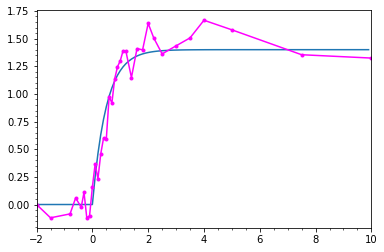

In [265]:
time = np.arange(-2,10, 0.1)
p0 = [1.4/2, 0.5, 1.4/2, 2.]
plt.plot(time, dt.two_expssum_free(time, *p0) )
plt.plot(dif.bincenters,val/val[-1],'.-', color = color, alpha = 1 , label = f'${Bragg_key[i][0], Bragg_key[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
plt.xlim(-2,10)

## Fit binned curves

In [266]:
L1 = (I_X_sorted[0:3].T- I_X_sorted[0:3][:,0]).mean(axis = 1)
L2 = (I_X_sorted[3:7].T- I_X_sorted[3:7][:,0]).mean(axis = 1)
L3 = (I_X_sorted[7:11].T- I_X_sorted[7:11][:,0]).mean(axis = 1)
L4 = (I_X_sorted[11:].T- I_X_sorted[11:][:,0]).mean(axis = 1)

In [267]:

p0
popt_L1, pcov_L1 = opt.curve_fit(dt.two_expssum_free , dif.bincenters[sel_time],( L1/L1[-1])[sel_time], p0=p0, bounds =[[0,0,0,0],[np.inf,np.inf,np.inf,np.inf ]] )
p0_tmp = np.append(popt_L1, np.asarray([0,0]))
popt_L1_rec, pcov_L1_rec = opt.curve_fit(dt.two_expssum_2_with_rec , dif.bincenters, L1/L1[-1], p0=p0_tmp, bounds = [0, np.inf])

popt_L2, pcov_L2 = opt.curve_fit(dt.two_expssum_free , dif.bincenters[sel_time],( L2/L2[-1])[sel_time], p0=p0, bounds =[[0,0,0,0],[np.inf,np.inf,np.inf,np.inf ]] )
p0_tmp = np.append(popt_L2, np.asarray([0,0]))
popt_L2_rec, pcov_L2_rec = opt.curve_fit(dt.two_expssum_2_with_rec , dif.bincenters, L2/L2[-1], p0=p0_tmp, bounds = [0, np.inf])

popt_L3, pcov_L3 = opt.curve_fit(dt.two_expssum_free , dif.bincenters[sel_time],( L3/L3[-1])[sel_time], p0=p0, bounds =[[0,0,0,0],[np.inf,np.inf,np.inf,np.inf ]] )
p0_tmp = np.append(popt_L3, np.asarray([0,0]))
popt_L3_rec, pcov_L3_rec = opt.curve_fit(dt.two_expssum_2_with_rec , dif.bincenters, L3/L3[-1], p0=p0_tmp, bounds = [0, np.inf])

popt_L4, pcov_L4 = opt.curve_fit(dt.two_expssum_free , dif.bincenters[sel_time],( L4/L4[-1])[sel_time], p0=p0, bounds =[[0,0,0,0],[np.inf,np.inf,np.inf,np.inf ]] )
p0_tmp = np.append(popt_L4, np.asarray([0,0]))
popt_L4_rec, pcov_L4_rec = opt.curve_fit(dt.two_expssum_2_with_rec , dif.bincenters, L4/L4[-1], p0=p0_tmp, bounds = [0, np.inf])


Text(0, 0.5, 'I (arb units)')

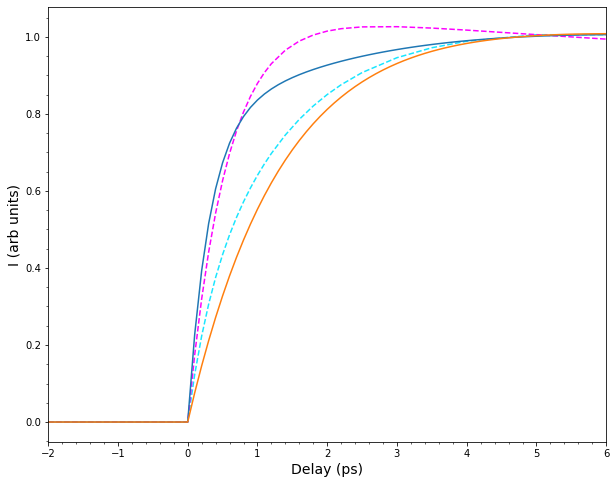

In [268]:
plt.figure(figsize = (10,8))
# plt.figure(figsize = (2,8))

color = cmap(0.1)

label_1 = (fr'$Q \cdot k = $ 0.1 ,'+  
           fr'$\tau_1$= {np.round(1/popt_L1_rec[1],3)} ps, $Amp_1$= {np.round(popt_L1_rec[0], 3)} ' +
           fr'$\tau_2$= {np.round(1/popt_L1_rec[3], 2)} ps, $Amp_2$= {np.round(popt_L1_rec[2], 2)} ,'+
'\n' +    fr' $\tau_r$ = {np.round(1/popt_L1_rec[5], 2)} ps, $Amp_r$= {np.round(popt_L1_rec[4], 2)} ')


plt.plot(dif.bincenters, dt.two_expssum_2_with_rec(dif.bincenters,*popt_L1_rec )/dt.two_expssum_2_with_rec(dif.bincenters,*popt_L1_rec )[29:32].mean(),'--', c=color, label = label_1)

color = cmap(0.99)
label_4 = (fr'$Q \cdot k = $ {1} ,$\tau_1$= {np.round(1/popt_L4_rec[3], 2)} ps, $Amp_{1}$= {np.round(popt_L4_rec[2], 2)} ,  $\tau_{2}$= {np.round(1/popt_L4_rec[1],3)} ps, $Amp_2$= {np.round(popt_L4_rec[0], 3)}' +
'\n' + fr' $\tau_r$ = {np.round(1/popt_L4_rec[5], 2)} ps, $Amp_r$= {np.round(popt_L4_rec[4], 2)} ')

plt.plot(dif.bincenters, dt.two_expssum_2_with_rec(dif.bincenters,*popt_L4_rec )/dt.two_expssum_2_with_rec(dif.bincenters,*popt_L4_rec )[29:32].mean(),'--' ,c=color,
               label = label_4 )

plt.plot(tmp_delay, 1*dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Fe_DW)/ dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Fe_DW)[20+40 : 60+20].mean() ,'-', label = 'BFe Fit')
plt.plot(tmp_delay, 1*dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Pt_DW)/  dt.two_expssum_2_with_rec_tau(tmp_delay,*popt_Pt_DW)[20+40 : 60+20].mean() ,'-',c='C1', label = 'BPt Fit')


plt.xlim(-2,6)

plt.xlabel('Delay (ps)', fontsize = 14)
plt.ylabel('I (arb units)', fontsize = 14)



In [269]:
lin_proj = np.asarray([0.1, 0.5, 0.8, 1.])
amp1_free = np.asarray([popt_L1_rec[0], popt_L2_rec[0], popt_L3_rec[0], popt_L4_rec[2],  ])
amp2_free = np.asarray([popt_L1_rec[2], popt_L2_rec[2], popt_L3_rec[2], popt_L4_rec[0],  ])
ampr_free = np.asarray([popt_L1_rec[4], popt_L2_rec[4], popt_L3_rec[4], popt_L4_rec[4],  ])

tau1_free = 1/np.asarray([popt_L1_rec[1], popt_L2_rec[1], popt_L3_rec[1], popt_L4_rec[3],  ])
tau2_free = 1/np.asarray([popt_L1_rec[3], popt_L2_rec[3], popt_L3_rec[3], popt_L4_rec[1],  ])
taur_free = 1/np.asarray([popt_L1_rec[5], popt_L2_rec[5], popt_L3_rec[5], popt_L4_rec[5],  ])

In [270]:
# Error Bars 
p_sigma_L1_rec  = np.sqrt(np.diag(pcov_L1_rec))
p_sigma_L2_rec  = np.sqrt(np.diag(pcov_L2_rec))
p_sigma_L3_rec  = np.sqrt(np.diag(pcov_L3_rec))
p_sigma_L4_rec  = np.sqrt(np.diag(pcov_L4_rec))

amp1_error_free = np.asarray([p_sigma_L1_rec[0], p_sigma_L2_rec[0], p_sigma_L3_rec[0], p_sigma_L4_rec[2]] )
amp2_error_free = np.asarray([p_sigma_L1_rec[2], p_sigma_L2_rec[2], p_sigma_L3_rec[2], p_sigma_L4_rec[0]] )
ampr_error_free = np.asarray([p_sigma_L1_rec[4], p_sigma_L2_rec[4], p_sigma_L3_rec[4], p_sigma_L4_rec[4]] )

tau1_error_free = tau1_free**2 * np.asarray([p_sigma_L1_rec[1], p_sigma_L2_rec[1], p_sigma_L3_rec[1], p_sigma_L4_rec[3]] )
tau2_error_free = tau2_free**2 * np.asarray([p_sigma_L1_rec[3], p_sigma_L2_rec[3], p_sigma_L3_rec[3], p_sigma_L4_rec[1]] )
taur_error_free = taur_free**2 * np.asarray([p_sigma_L1_rec[5], p_sigma_L2_rec[5], p_sigma_L3_rec[5], p_sigma_L4_rec[5]] )

(-0.5, 6.0)

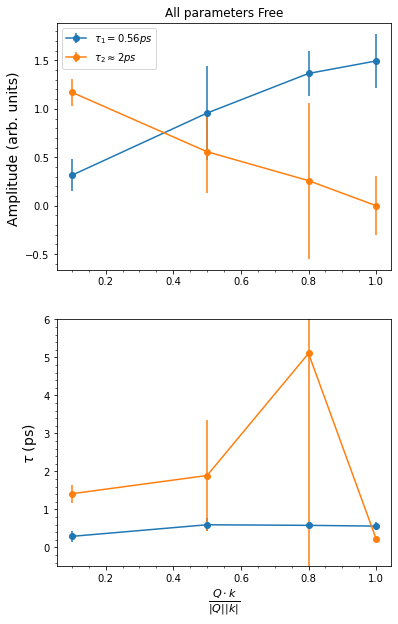

In [271]:
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize = (6, 10))

ax1.errorbar(lin_proj, amp1_free, yerr = amp1_error_free, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
ax1.errorbar(lin_proj, amp2_free, yerr = amp2_error_free, marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )

ax2.errorbar(lin_proj, tau1_free, yerr = tau1_error_free, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
ax2.errorbar(lin_proj, tau2_free, yerr = tau2_error_free, marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )

ax1.legend()
# plt.ylim(-0.2, 1.7)
ax2.set_xlabel(r'$ \frac{Q \cdot k}{\| Q \| \| k \|} $', fontsize = 16)
ax1.set_ylabel('Amplitude (arb. units) ', fontsize = 14)
ax1.set_title('All parameters Free')

ax2.set_ylabel(r'$ \tau $ (ps)', fontsize = 14)
ax2.set_ylim(-.5, 6)


In [272]:
def two_expssum_2_with_rec_fixed_B1(time,A1, A2, B2,A_rec, B_rec):
#     B1 = 3.4484686367464508 #ps-1
    B1 = 1.78517733e+00  #ps-1   # ~.56 ps
    exp1 =  dt.exp_sat(time,A1, B1)
    exp2 =  dt.exp_sat(time,A2, B2)
    exp_rec =  -dt.exp_sat(time,A_rec, B_rec)
    return exp1 + exp2 + exp_rec


In [273]:


p0_tmp = popt_L1_rec[[0,2,3,4,5]]
popt_L1_rec_fixed_B1, pcov_L1_rec_fixed_B1 = opt.curve_fit(two_expssum_2_with_rec_fixed_B1 , dif.bincenters, L1/L1[-1], p0=p0_tmp, bounds = [0, np.inf])

p0_tmp = popt_L2_rec[[0,2,3,4,5]]
popt_L2_rec_fixed_B1, pcov_L2_rec_fixed_B1 = opt.curve_fit(two_expssum_2_with_rec_fixed_B1 , dif.bincenters, L2/L2[-1], p0=p0_tmp, bounds = [0, np.inf])

p0_tmp = popt_L3_rec[[0,2,3,4,5]]
popt_L3_rec_fixed_B1, pcov_L3_rec_fixed_B1 = opt.curve_fit(two_expssum_2_with_rec_fixed_B1 , dif.bincenters, L3/L3[-1], p0=p0_tmp, bounds = [0, np.inf])

p0_tmp = popt_L4_rec[[0,2,3,4,5]]
popt_L4_rec_fixed_B1, pcov_L4_rec_fixed_B1 = opt.curve_fit(two_expssum_2_with_rec_fixed_B1 , dif.bincenters, L4/L4[-1], p0=p0_tmp, bounds = [0, np.inf])


Text(0, 0.5, 'I (arb units)')

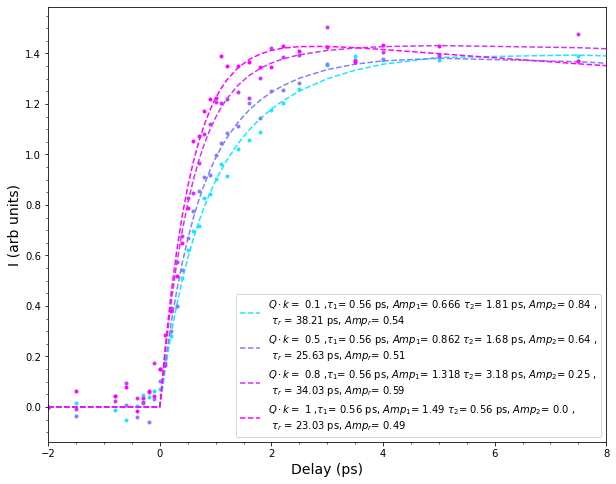

In [274]:
plt.figure(figsize = (10,8))
# plt.figure(figsize = (2,8))


color = cmap(0.1)
plt.plot(dif.bincenters, L1/L1[-1],'.', c=color )

label_1 = (fr'$Q \cdot k = $ 0.1 ,'+  
           fr'$\tau_1$= {np.round(1/popt_L4_rec[3],3)} ps, $Amp_1$= {np.round(popt_L1_rec_fixed_B1[0], 3)} ' +
           fr'$\tau_2$= {np.round(1/popt_L1_rec_fixed_B1[2], 2)} ps, $Amp_2$= {np.round(popt_L1_rec_fixed_B1[1], 2)} ,'+
'\n' +    fr' $\tau_r$ = {np.round(1/popt_L1_rec_fixed_B1[4], 2)} ps, $Amp_r$= {np.round(popt_L1_rec_fixed_B1[3], 2)} ')


plt.plot(dif.bincenters, two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L1_rec_fixed_B1 ),'--', c=color, label = label_1)

color = cmap(0.5)
plt.plot(dif.bincenters, L2/L2[-1],'.', c=color )

label_2 = (fr'$Q \cdot k = $ 0.5 ,'+  
           fr'$\tau_1$= {np.round(1/popt_L4_rec[3],3)} ps, $Amp_1$= {np.round(popt_L2_rec_fixed_B1[0], 3)} ' +
           fr'$\tau_2$= {np.round(1/popt_L2_rec_fixed_B1[2], 2)} ps, $Amp_2$= {np.round(popt_L2_rec_fixed_B1[1], 2)} ,'+
'\n' +    fr' $\tau_r$ = {np.round(1/popt_L2_rec_fixed_B1[4], 2)} ps, $Amp_r$= {np.round(popt_L2_rec_fixed_B1[3], 2)} ')

plt.plot(dif.bincenters, two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L2_rec_fixed_B1 ),'--' ,c=color, label = label_2 )




color = cmap(0.8)
plt.plot(dif.bincenters, L3/L3[-1],'.', c=color )

label_3 = (fr'$Q \cdot k = $ 0.8 ,'+  
           fr'$\tau_1$= {np.round(1/popt_L4_rec[3],3)} ps, $Amp_1$= {np.round(popt_L3_rec_fixed_B1[0], 3)} ' +
           fr'$\tau_2$= {np.round(1/popt_L3_rec_fixed_B1[2], 2)} ps, $Amp_2$= {np.round(popt_L3_rec_fixed_B1[1], 2)} ,'+
'\n' +    fr' $\tau_r$ = {np.round(1/popt_L3_rec_fixed_B1[4], 2)} ps, $Amp_r$= {np.round(popt_L3_rec_fixed_B1[3], 2)} ')

plt.plot(dif.bincenters, two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L3_rec_fixed_B1 ),'--' ,c=color, label = label_3)



color = cmap(0.99)
plt.plot(dif.bincenters, L4/L4[-1],'.', c=color )
label_4 = (fr'$Q \cdot k = $ {1} ,' + 
           fr'$\tau_1$= {np.round(1/popt_L4_rec_fixed_B1[2],3)} ps, $Amp_1$= {np.round(popt_L4_rec_fixed_B1[1], 2)} ' +
           fr'$\tau_2$= {np.round(1/popt_L4_rec[3], 3)} ps, $Amp_2$= {np.round(popt_L4_rec_fixed_B1[0], 3)} ,' +
'\n' + fr' $\tau_r$ = {np.round(1/popt_L4_rec_fixed_B1[4], 2)} ps, $Amp_r$= {np.round(popt_L4_rec_fixed_B1[3], 2)} ')


plt.plot(dif.bincenters, two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L4_rec_fixed_B1 ),'--' ,c=color,
               label = label_4 )


# plt.xlim(-2,15) 
plt.xlim(-2,8) 
# plt.xlim(15,100)
# 
plt.legend(fontsize = 10)
plt.xlabel('Delay (ps)', fontsize = 14)
plt.ylabel('I (arb units)', fontsize = 14)



In [275]:
# calculate MSE for both curves

In [276]:
#MSE for all free parameters: 

MSE_free_L1 = np.mean((dt.two_expssum_2_with_rec(dif.bincenters,*popt_L1_rec )[7:]- (L1/L1[-1])[7:])**2)
MSE_free_L2 = np.mean((dt.two_expssum_2_with_rec(dif.bincenters,*popt_L2_rec )[7:]- (L2/L2[-1])[7:])**2)
MSE_free_L3 = np.mean((dt.two_expssum_2_with_rec(dif.bincenters,*popt_L3_rec )[7:]- (L3/L3[-1])[7:])**2)
MSE_free_L4 = np.mean((dt.two_expssum_2_with_rec(dif.bincenters,*popt_L4_rec )[7:]- (L4/L4[-1])[7:])**2)

print(f'MSE (free) L1: {np.round(MSE_free_L1, 6)}')
print(f'MSE (free) L2: {np.round(MSE_free_L2, 6)}')
print(f'MSE (free) L3: {np.round(MSE_free_L3, 6)}')
print(f'MSE (free) L4: {np.round(MSE_free_L4, 6)}')

MSE (free) L1: 0.00097
MSE (free) L2: 0.000961
MSE (free) L3: 0.003429
MSE (free) L4: 0.003791


In [277]:
#MSE for fixed B1 

MSE_fixed_B1_L1 = np.mean((two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L1_rec_fixed_B1 )[7:]- (L1/L1[-1])[7:])**2)
MSE_fixed_B1_L2 = np.mean((two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L2_rec_fixed_B1 )[7:]- (L2/L2[-1])[7:])**2)
MSE_fixed_B1_L3 = np.mean((two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L3_rec_fixed_B1 )[7:]- (L3/L3[-1])[7:])**2)
MSE_fixed_B1_L4 = np.mean((two_expssum_2_with_rec_fixed_B1(dif.bincenters,*popt_L4_rec_fixed_B1 )[7:]- (L4/L4[-1])[7:])**2)

print(f'MSE (fixed) L1: {np.round(MSE_fixed_B1_L1, 6)}')
print(f'MSE (fixed) L2: {np.round(MSE_fixed_B1_L2, 6)}')
print(f'MSE (fixed) L3: {np.round(MSE_fixed_B1_L3, 6)}')
print(f'MSE (fixed) L4: {np.round(MSE_fixed_B1_L4, 6)}')

MSE (fixed) L1: 0.001161
MSE (fixed) L2: 0.000964
MSE (fixed) L3: 0.003436
MSE (fixed) L4: 0.003791


In [278]:
lin_proj = np.asarray([0.1, 0.5, 0.8, 1.])
amp1 = np.asarray([popt_L1_rec_fixed_B1[0], popt_L2_rec_fixed_B1[0], popt_L3_rec_fixed_B1[0], popt_L4_rec_fixed_B1[1],  ])
amp2 = np.asarray([popt_L1_rec_fixed_B1[1], popt_L2_rec_fixed_B1[1], popt_L3_rec_fixed_B1[1], popt_L4_rec_fixed_B1[0],  ])
ampr = np.asarray([popt_L1_rec_fixed_B1[3], popt_L2_rec_fixed_B1[3], popt_L3_rec_fixed_B1[3], popt_L4_rec_fixed_B1[3],  ])


tau1_fixed = np.asarray([0.56, 0.56, 0.56, 0.56 ])
tau2_fixed = 1/np.asarray([popt_L1_rec_fixed_B1[2], popt_L2_rec_fixed_B1[2], popt_L3_rec_fixed_B1[2], popt_L4_rec_fixed_B1[2],  ])
taur_fixed = 1/np.asarray([popt_L1_rec_fixed_B1[4], popt_L2_rec_fixed_B1[4], popt_L3_rec_fixed_B1[4], popt_L4_rec_fixed_B1[4],  ])

In [279]:
# Error Bars 
p_sigma_L1_rec_fixed_B1  = np.sqrt(np.diag(pcov_L1_rec_fixed_B1))
p_sigma_L2_rec_fixed_B1  = np.sqrt(np.diag(pcov_L2_rec_fixed_B1))
p_sigma_L3_rec_fixed_B1  = np.sqrt(np.diag(pcov_L3_rec_fixed_B1))
p_sigma_L4_rec_fixed_B1  = np.sqrt(np.diag(pcov_L4_rec_fixed_B1))

amp1_error = np.asarray([p_sigma_L1_rec_fixed_B1[0], p_sigma_L2_rec_fixed_B1[0], p_sigma_L3_rec_fixed_B1[0], p_sigma_L4_rec_fixed_B1[1]] )
amp2_error = np.asarray([p_sigma_L1_rec_fixed_B1[1], p_sigma_L2_rec_fixed_B1[1], p_sigma_L3_rec_fixed_B1[1], p_sigma_L4_rec_fixed_B1[0]] )
ampr_error = np.asarray([p_sigma_L1_rec_fixed_B1[3], p_sigma_L2_rec_fixed_B1[3], p_sigma_L3_rec_fixed_B1[3], p_sigma_L4_rec_fixed_B1[3]] )



tau1_error_fixed = tau1_fixed**2 * np.asarray([0,0,0,0] )
tau2_error_fixed = tau2_fixed**2 * np.asarray([p_sigma_L1_rec_fixed_B1[2], p_sigma_L2_rec_fixed_B1[2], p_sigma_L3_rec_fixed_B1[2], p_sigma_L4_rec_fixed_B1[2]] )
taur_error_fixed = taur_fixed**2 * np.asarray([p_sigma_L1_rec_fixed_B1[4], p_sigma_L2_rec_fixed_B1[4], p_sigma_L3_rec_fixed_B1[4], p_sigma_L4_rec_fixed_B1[4]] )



Text(0, 0.5, '$ \\tau $ (ps)')

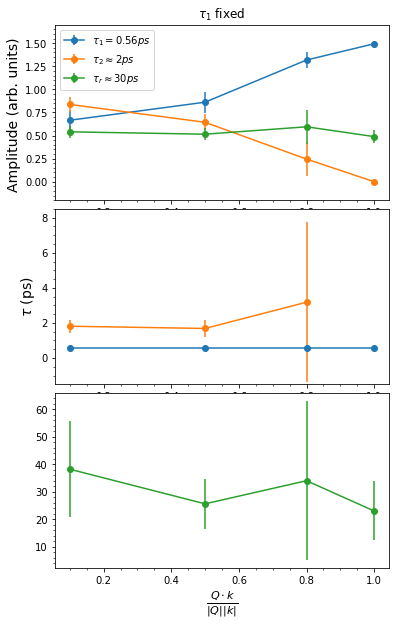

In [280]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows = 3, figsize = (6, 10))

fig.subplots_adjust(hspace=0.05)

# plt.plot(np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([1.49, 1.378, 0.862, 0.666]),'o-', label= r'$ \tau_1 = 0.56 ps$' )
# plt.plot(np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([0, 0.25, 0.64, 0.84]),'o-', label= r'$ \tau_2 \approx 2 ps$' )
# plt.errorbar( np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([1.49, 1.378, 0.862, 0.666]), yerr = amp1_error ,marker='o', label= r'$ \tau_1 = 0.56 ps$' )

# ax1.errorbar(lin_proj, amp1, yerr = amp1_error, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
ax1.errorbar(lin_proj, amp1, yerr = np.append(amp1_error[:-1], [0]), marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )

# ax1.errorbar(lin_proj, amp2, yerr = amp2_error, marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )
ax1.errorbar(lin_proj, amp2, yerr = np.append(amp2_error[:-1], [0]), marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )

ax1.errorbar(lin_proj, ampr, yerr = ampr_error, marker = 'o', label= r'$ \tau_r \approx 30 ps$' )


ax2.errorbar(lin_proj, tau1_fixed, yerr = tau1_error_fixed, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
ax2.errorbar(lin_proj[:-1], tau2_fixed[:-1], yerr = tau2_error_fixed[:-1], marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )

ax2.set_ylim(-1.5,8.5)

# ax22 = ax2.twinx()
ax3.errorbar(lin_proj, taur_fixed, yerr = taur_error_fixed, c= 'C2', marker = 'o', label= r'$ \tau_r \approx 30 ps$' )

# ax22.set_ylim()

ax1.legend()
ax1.set_ylim(-0.2, 1.7)
ax3.set_xlabel(r'$ \frac{Q \cdot k}{\| Q \| \| k \|} $', fontsize = 16)
ax1.set_ylabel('Amplitude (arb. units) ', fontsize = 14)
ax1.set_title(r'$ \tau_1 $ fixed')

ax2.set_ylabel(r'$ \tau $ (ps)', fontsize = 14)
# ax2.set_ylim(-.5, 5)


Text(0, 0.5, '$ \\tau $ (ps)')

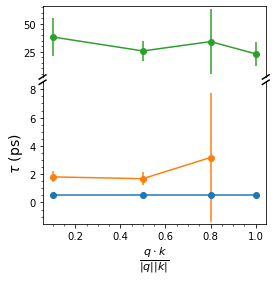

In [281]:
fig, [ax3, ax2] = plt.subplots(nrows = 2, figsize = (4, 4), gridspec_kw={'height_ratios': [1,2]} )

fig.subplots_adjust(hspace=0.05)

# plt.plot(np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([1.49, 1.378, 0.862, 0.666]),'o-', label= r'$ \tau_1 = 0.56 ps$' )
# plt.plot(np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([0, 0.25, 0.64, 0.84]),'o-', label= r'$ \tau_2 \approx 2 ps$' )
# plt.errorbar( np.asarray([1, 0.8, 0.5, 0.1]), np.asarray([1.49, 1.378, 0.862, 0.666]), yerr = amp1_error ,marker='o', label= r'$ \tau_1 = 0.56 ps$' )

# # ax1.errorbar(lin_proj, amp1, yerr = amp1_error, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
# ax1.errorbar(lin_proj, amp1, yerr = np.append(amp1_error[:-1], [0]), marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
# # ax1.errorbar(lin_proj, amp2, yerr = amp2_error, marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )
# ax1.errorbar(lin_proj, amp2, yerr = np.append(amp2_error[:-1], [0]), marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )
# ax1.errorbar(lin_proj, ampr, yerr = ampr_error, marker = 'o', label= r'$ \tau_r \approx 30 ps$' )

ax3.set_xticks([])
ax3.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((1-d,1+d), (-d*2,+d*2), **kwargs)
ax3.plot((-d,+d),(-d*2,+d*2), **kwargs)

d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d),(1-d,1+d), **kwargs)


# ax2.tick_params(labelbottom='off')
# ax3.tick_params(labeltop='off')
# ax3.yaxis.tick_right()

ax2.errorbar(lin_proj, tau1_fixed, yerr = tau1_error_fixed, marker = 'o', label= r'$ \tau_1 = 0.56 ps$' )
ax2.errorbar(lin_proj[:-1], tau2_fixed[:-1], yerr = tau2_error_fixed[:-1], marker = 'o', label= r'$ \tau_2 \approx 2 ps$' )
ax2.set_ylim(-1.5,8.5)

# ax22 = ax2.twinx()
ax3.errorbar(lin_proj, taur_fixed, yerr = taur_error_fixed, c= 'C2', marker = 'o', label= r'$ \tau_r \approx 30 ps$' )

# ax22.set_ylim()

ax1.legend()
ax1.set_ylim(-0.2, 1.7)
ax2.set_xlabel(r'$ \frac{q \cdot k}{\| q \| \| k \|} $', fontsize = 16)
ax1.set_ylabel('Amplitude (arb. units) ', fontsize = 14)
ax1.set_title(r'$ \tau_1 $ fixed')

ax2.set_ylabel(r'$ \tau $ (ps)', fontsize = 14)
# ax2.set_ylim(-.5, 5)


-2


Text(0.5, 1.0, '(3.5, 0.0) $ q \\cdot k = $1.0')

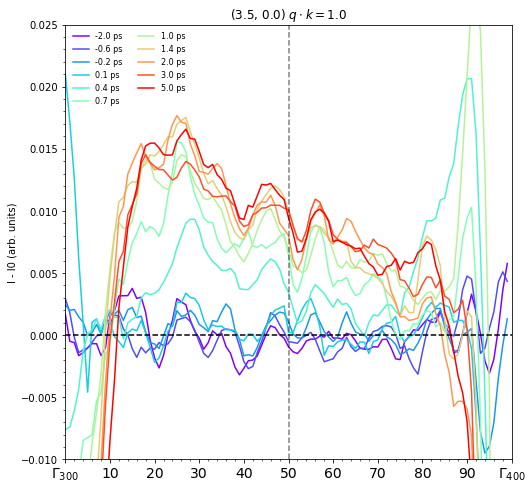

In [282]:
from scipy.signal import savgol_filter

i = -2
print(i)

start_point = 100*GX_paths_sorted[i][0] + 10*GX_paths_sorted[i][1]
end_point = 100*GX_paths_sorted[i][2] + 10*GX_paths_sorted[i][3]

# plt.title(r"$\Gamma_{{{start_point}}}$".format(start_point=start_point) + ' ' + "$\Gamma_{{{end_point}}}$".format( end_point = end_point))

cmap = plt.get_cmap('rainbow')

fig, ax = plt.subplots( figsize = (8,8), sharex = True)
for t_idx in np.arange(4, len(dif.bincenters),3)-4:
    color = cmap(float(t_idx)/(len(a_list)-5))

    
######  THIS PLOTS I/I0 FOR THE FULL LINE PROFILE WITH 100 PTS ################
#     ax.plot((I_X_profile_sorted[i, t_idx] / I_X_profile_sorted[i, 1]), 
#             color = color, label = f'{np.round(dif.bincenters[t_idx],3)} ps' )
# ax.set_ylim([0.98,1.07])
# ax.set_ylabel('I / I0 (arb. units)')
# ax.axhline(1, c='k', ls='--')




###### THIS PLOTS I-I0 FOR THE LINE PROFILE ( AND CAN USE SAVGOL FILTER)  ####
    ax.plot(savgol_filter(I_X_profile_sorted[i, t_idx]- I_X_profile_sorted[i, 1], 9, 2, mode='nearest'),# - I_X_profile_sorted[i, 1]), 
#     ax.plot((I_X_profile_sorted[i, t_idx]),# - I_X_profile_sorted[i, 1]), 
#     ax.plot((I_X_profile_sorted[i, t_idx] - I_X_profile_sorted[i, 1]), 
            color = color, label = f'{np.round(dif.bincenters[t_idx],3)} ps' )

# ax.set_ylim([-0.01,0.025+0.025+ 0.025])
ax.set_ylim([-0.01,0.025+ 0.0])
ax.set_ylabel('I - I0 (arb. units)')
ax.axhline(0, c='k', ls='--')


ax.legend(ncol = 2,fontsize = 8 , frameon = False)
ax.set_xlim([0,100])
ax.axvline(50,ls = '--', c='k',alpha = 0.5)

ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
ax.set_xticklabels([r"$\Gamma_{{{start_point}}}$".format(start_point=start_point),'10', '20', '30', '40', '50', '60', '70', '80','90', "$\Gamma_{{{end_point}}}$".format( end_point = end_point)], fontsize = 14)
plt.title(f'{Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]} ' + r'$ q \cdot k = $' + f'{np.round(L_projection_sorted[i], 3)}')


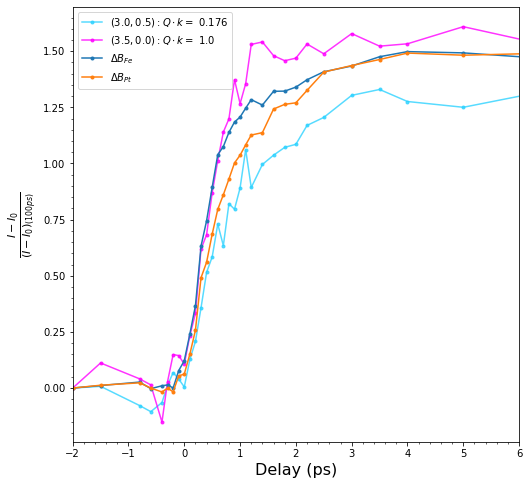

In [283]:
cmap = plt.get_cmap('cool')

plt.figure(figsize = (8,8))
# plt.figure(figsize = (2,8))

# keys_sorted[1], keys_sorted[-2]
# for i in np.arange(I_X.shape[0] -0 ):
# for i in np.asarray([1, -2]):
i=1
color = cmap(L_projection_sorted[i])
plt.plot(time_tmp,1.*(I_X_sorted[i] - I_X_sorted[i][0])/(I_X_sorted[i] - I_X_sorted[i][0])[-1],'.-', color = color, alpha = 0.8 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
#     plt.plot(time_tmp,dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i])/dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i])[-1],'--', color = color )
i=-2
color = cmap(L_projection_sorted[i])
plt.plot(time_tmp,1*(I_X_sorted[i] - I_X_sorted[i][0])/(I_X_sorted[i] - I_X_sorted[i][0])[-1],'.-', color = color, alpha = 0.8 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

plt.xlim(-2,10)
plt.xlim(-2,6)
# plt.xlim(6,105)

# plt.errorbar(dif.bincenters, 1.0*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])/(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])[-1], yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.',label = r'$\Delta B_{Fe}$ ')
# plt.errorbar(dif.bincenters, 1.0*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])/(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])[-1], yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.',label = r'$\Delta B_{Pt}$ ')

plt.plot(dif.bincenters, (-a2_t_kfixed + a2_t_kfixed[0])/(-a2_t_kfixed + a2_t_kfixed[0])[-1], '.-', c='C0',label = r'$\Delta B_{Fe}$')
plt.plot(dif.bincenters, 1.*(-a1_t_kfixed + a1_t_kfixed[0])/(-a1_t_kfixed + a1_t_kfixed[0])[-1], '.-',c='C1', label = r'$\Delta B_{Pt}$')



plt.xlabel('Delay (ps)', fontsize = 16)
plt.ylabel(r'$\frac{I - I_0}{(I - I_0)_{(100ps)}}$', fontsize = 16)

plt.legend()


In [284]:
sel_mid_time = ((dif.bincenters < 6)&(dif.bincenters>3.5))
sel_mid_time = ((dif.bincenters < 120)&(dif.bincenters>90))

In [285]:
test_6mJ = pd.read_table( '/cds/home/d/diegotur/UED/FePt/ext_data/Igor_analysis/' +'6mJ_28K.dat',na_values='--')

Text(0, 0.5, '%')

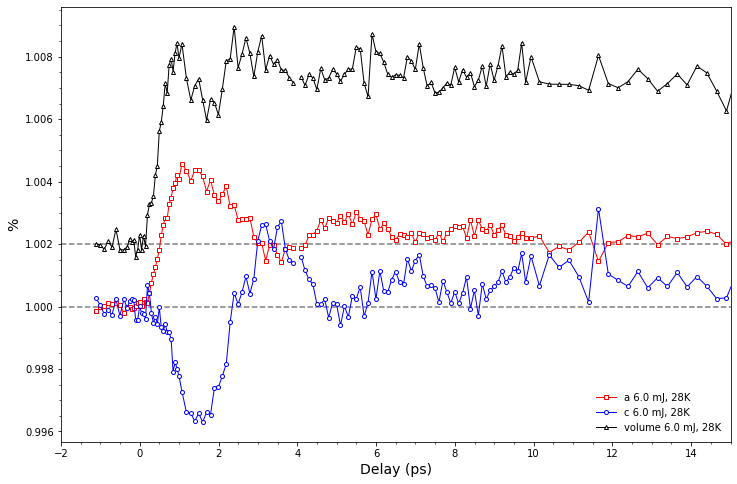

In [286]:
plt.figure(figsize=(12,8),)#dpi=300)
plt.axhline(1, ls='--', c='k', alpha=0.5)
plt.axhline(1+0.002, ls='--', c='k', alpha=0.5)

plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, test_6mJ['a/a0'].values, linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
        label = 'a 6.0 mJ, 28K')
plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, test_6mJ['c/c0'].values, linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
        label = 'c 6.0 mJ, 28K')
plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.002 + test_6mJ['v/v0'].values, linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = 'volume 6.0 mJ, 28K')
# plt.plot(test_6mJ['Unnamed: 0'].values[33], test_6mJ['v/v0'].values[33], linewidth=5, marker = "^", markerfacecolor='white', markersize=10 ,
#         label = 'volume 6.0 mJ, 28K')
plt.legend(frameon = False)
plt.xlim(-2, 15)
plt.xlabel('Delay (ps)', fontsize = 14)
# plt.ylabel(r'$V$/$V_0$', fontsize = 14)
plt.ylabel('%', fontsize = 14)

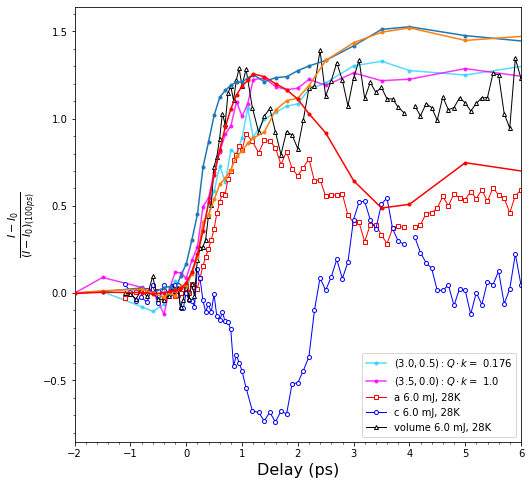

In [287]:
cmap = plt.get_cmap('cool')



plt.figure(figsize = (8,8))
# plt.figure(figsize = (2,8))

# keys_sorted[1], keys_sorted[-2]
# for i in np.arange(I_X.shape[0] -0 ):
# for i in np.asarray([1, -2]):
i = 1
color = cmap(L_projection_sorted[i])
plt.plot(time_tmp,1.*(I_X_sorted[i] - I_X_sorted[i][0])/((I_X_sorted[i] - I_X_sorted[i][0])[sel_mid_time]).mean(),'.-', color = color, alpha = 0.8 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
#     plt.plot(time_tmp,dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i])/dt.two_expssum_2_with_rec(time_tmp, *time_fits_raw__with_recov_popt[i])[-1],'--', color = color )
i = -2
color = cmap(L_projection_sorted[i])
plt.plot(time_tmp,0.8*(I_X_sorted[i] - I_X_sorted[i][0])/((I_X_sorted[i] - I_X_sorted[i][0])[sel_mid_time]).mean(),'.-', color = color, alpha = 0.8 , label = f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

plt.xlim(-2,10)
plt.xlim(-2,6)
# plt.xlim(6,105)

plt.errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])/((Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0])[sel_mid_time]).mean(), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', )
plt.errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])/((Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0])[sel_mid_time]).mean(), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', )

plt.errorbar(dif.bincenters,2*150*(1-np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1)),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='', color = 'red',zorder=np.inf)


plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 200*(test_6mJ['a/a0'].values -1) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
        label = 'a 6.0 mJ, 28K')
plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 200*(test_6mJ['c/c0'].values -1) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
        label = 'c 6.0 mJ, 28K')
plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 200*(test_6mJ['v/v0'].values -1) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = 'volume 6.0 mJ, 28K')

plt.xlabel('Delay (ps)', fontsize = 16)
plt.ylabel(r'$\frac{I - I_0}{(I - I_0)_{(100ps)}}$', fontsize = 16)

plt.legend()


Text(0, 0.5, '%')

<Figure size 576x576 with 0 Axes>

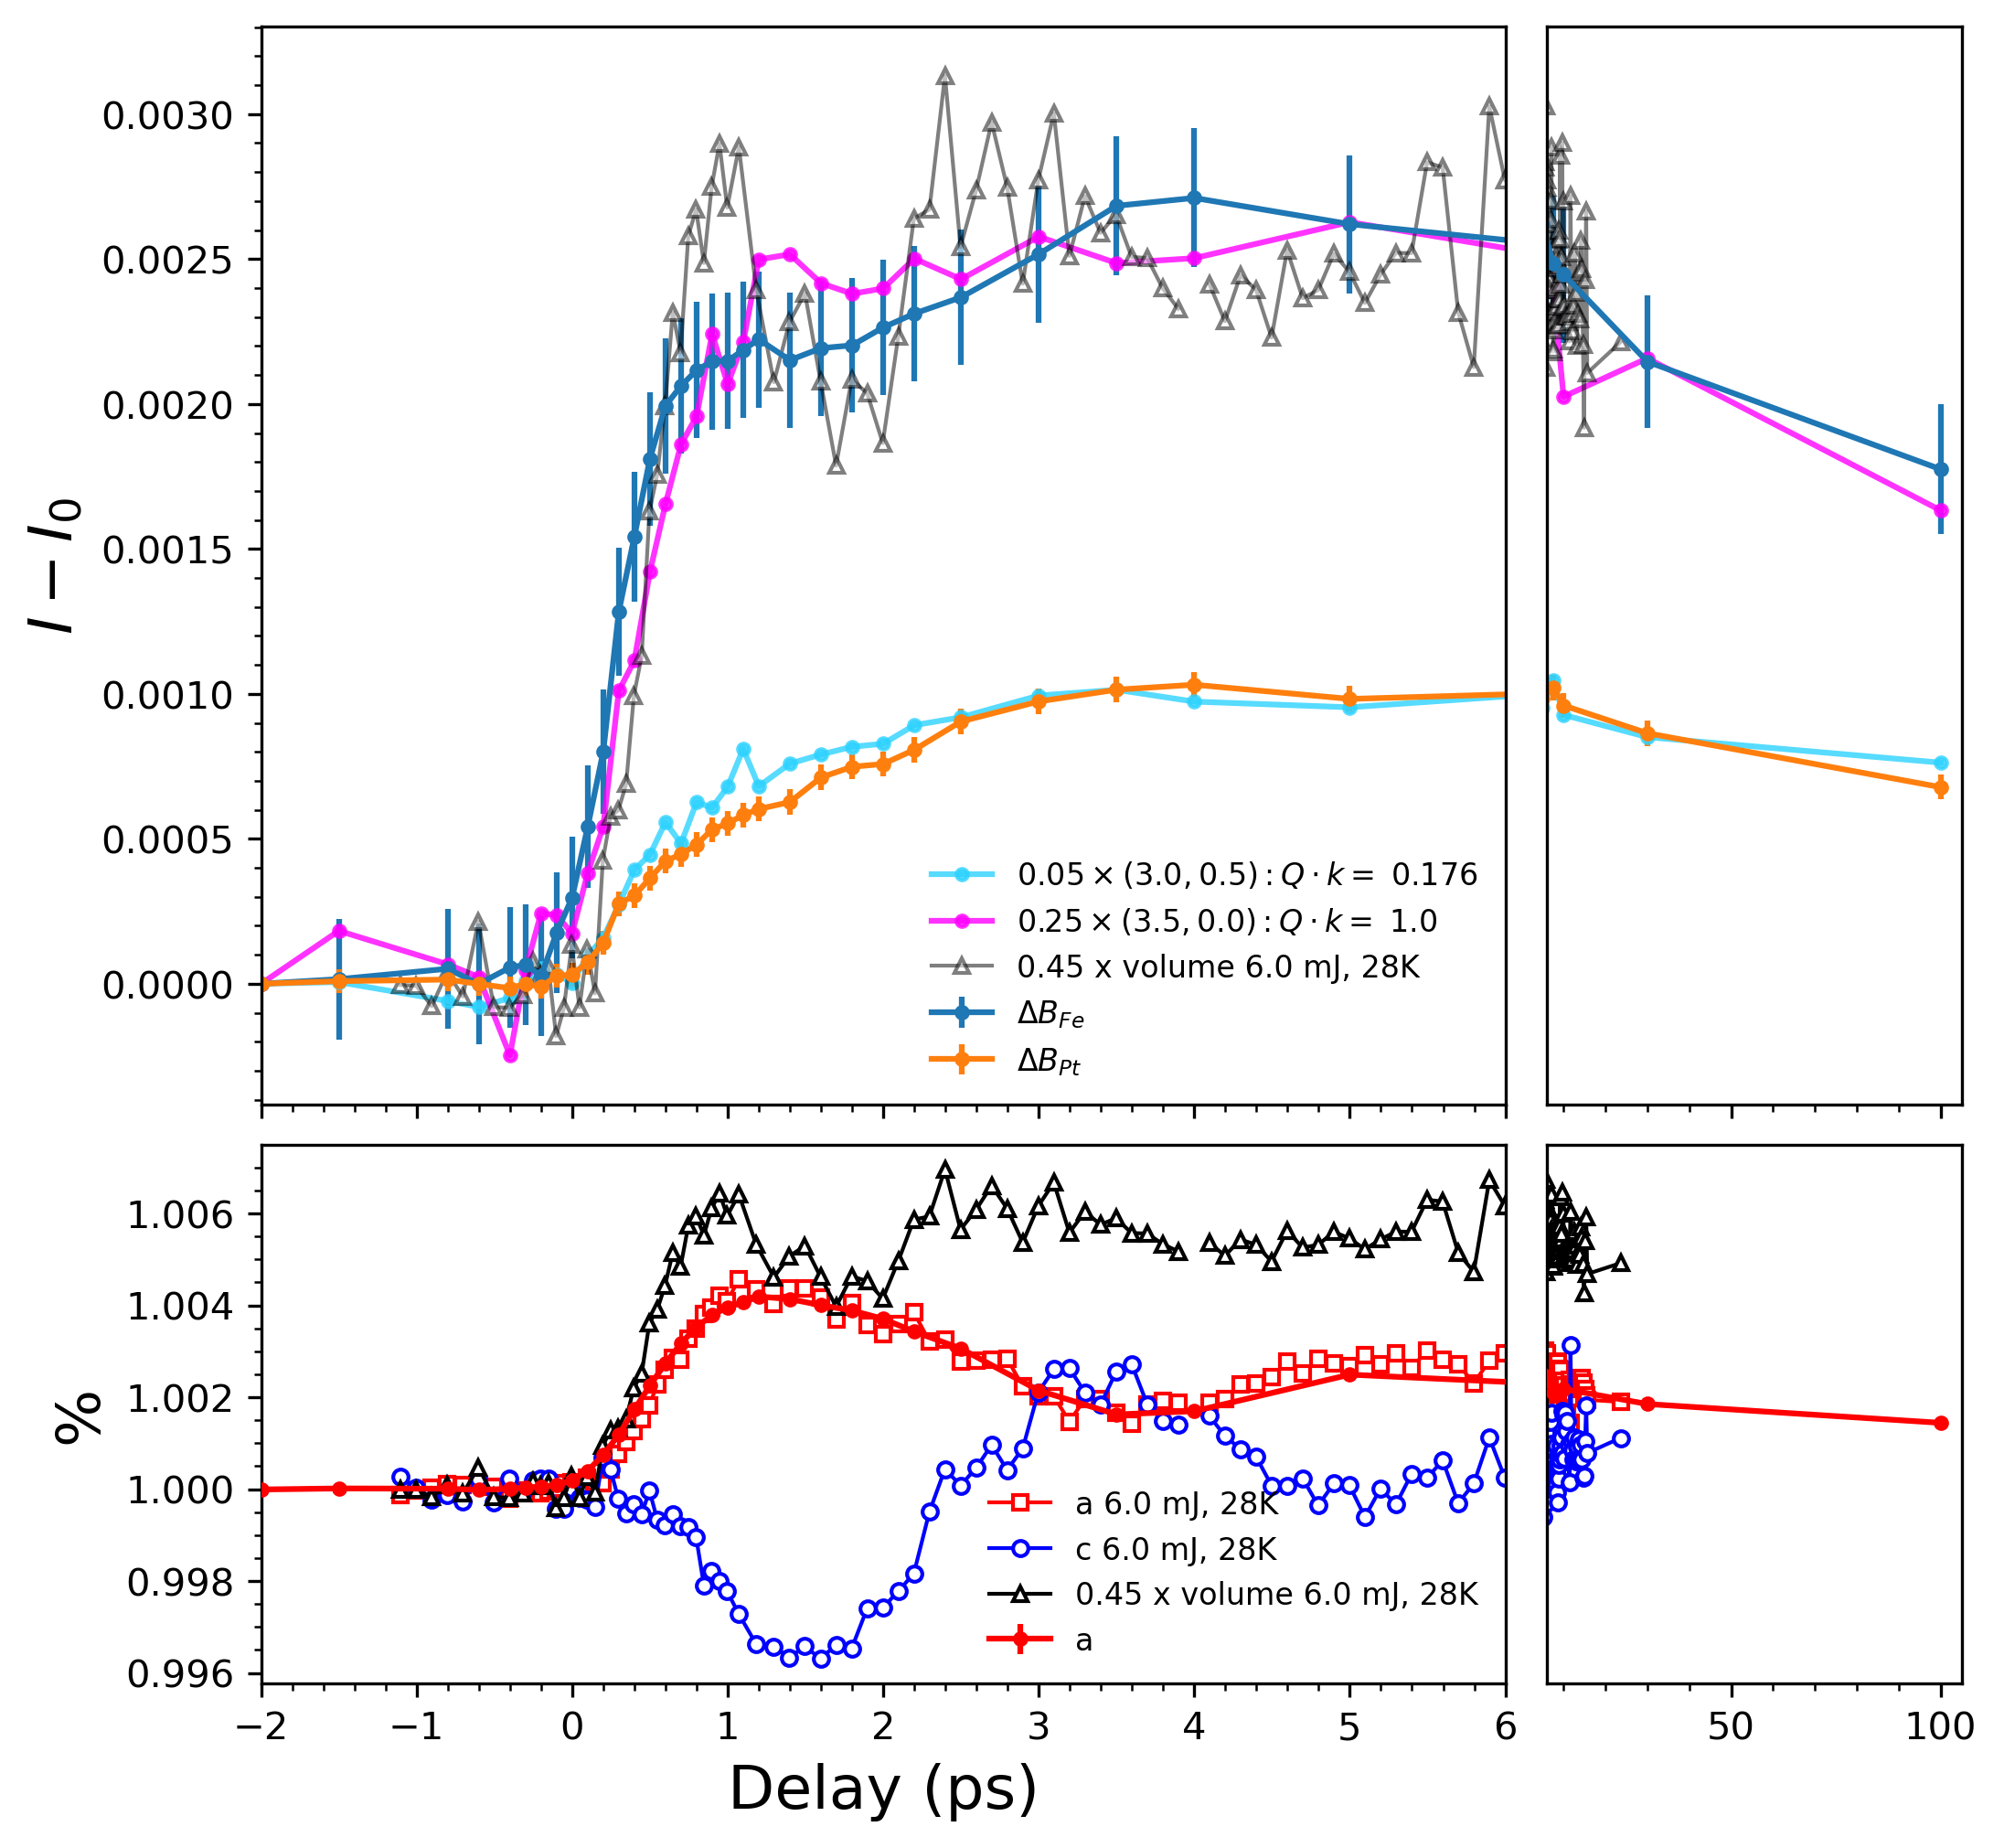

In [288]:
cmap = plt.get_cmap('cool')



plt.figure(figsize = (8,8))
# plt.figure(figsize = (2,8))
fig, axs = plt.subplots(ncols=2, nrows=2,  
                        gridspec_kw={'width_ratios': [3, 1],'height_ratios': [2, 1],'wspace': 0.05,'hspace': 0.05 },
                        figsize=(8,8), dpi=300)#,dpi=300)

i = 1
color = cmap(L_projection_sorted[i])
axs[0,0].plot(time_tmp, 0.05*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label = r'$0.05 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
axs[0,1].plot(time_tmp, 0.05*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label = r'$0.05 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

i = -2
color = cmap(L_projection_sorted[i])
axs[0,0].plot(time_tmp, 0.25*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label =  r'$0.25 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
axs[0,1].plot(time_tmp, 0.25*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label =  r'$0.25 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

axs[0,0].set_xlim(-2,6)
axs[0,1].set_xlim(6,105)

axs[1,0].set_xlim(-2,6)
axs[1,1].set_xlim(6,105)

# plt.xlim(6,105)

# plt.errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )
# plt.errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )




# plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.5*(test_6mJ['a/a0'].values -1) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
#         label = 'a 6.0 mJ, 28K')
# plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, -0.5*(test_6mJ['c/c0'].values -1) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
#         label = 'c 6.0 mJ, 28K')
axs[0,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.45*(test_6mJ['v/v0'].values -1) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = '0.45 x volume 6.0 mJ, 28K', alpha = 0.5)
axs[0,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.45*(test_6mJ['v/v0'].values -1) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = '0.45 x volume 6.0 mJ, 28K', alpha = 0.5)

axs[0,0].errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )
axs[0,1].errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )

axs[0,0].errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )
axs[0,1].errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )

axs[1,0].set_xlabel('Delay (ps)', fontsize = 16)
axs[0,0].set_ylabel(r'$I - I_0$', fontsize = 16)

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,1].set_yticks([])


axs[0,0].legend(fontsize = 8, frameon = False)


axs[1,0].errorbar(dif.bincenters,1+1*(1-np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1)),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='a', color = 'red',zorder=np.inf)
axs[1,1].errorbar(dif.bincenters,1+1*(1-np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1)),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='a', color = 'red',zorder=np.inf)



axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['a/a0'].values -0) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
        label = 'a 6.0 mJ, 28K')
axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['c/c0'].values -0) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
        label = 'c 6.0 mJ, 28K')
axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['v/v0'].values -0) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = '0.45 x volume 6.0 mJ, 28K')


axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['a/a0'].values -0) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
        label = 'a 6.0 mJ, 28K')
axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['c/c0'].values -0) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
        label = 'c 6.0 mJ, 28K')
axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['v/v0'].values -0) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = 'volume 6.0 mJ, 28K')


axs[1,0].legend(fontsize =8, frameon = False)

axs[1,1].set_yticks([])
axs[1,0].set_ylabel('%', fontsize = 16)


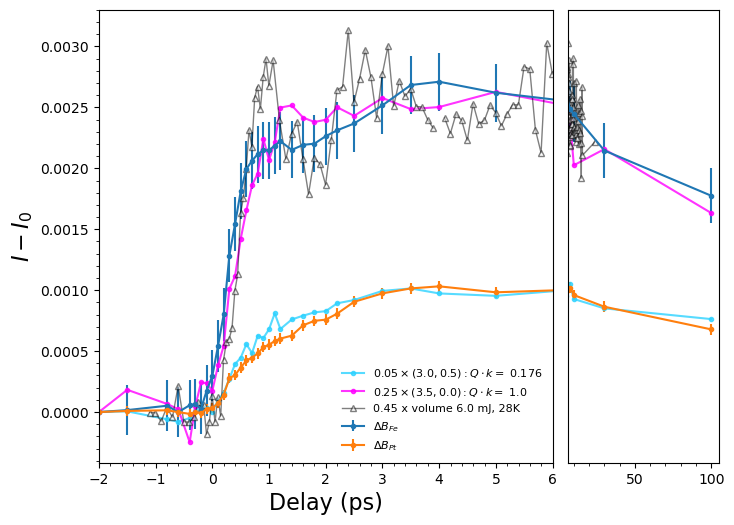

In [289]:
cmap = plt.get_cmap('cool')

# plt.figure(figsize = (2,8))
fig, axs = plt.subplots(ncols=2, nrows=1,  
                        gridspec_kw={'width_ratios': [3, 1],'height_ratios': [1],'wspace': 0.05,'hspace': 0.05 },
#                         figsize=(8,6), dpi=300)#,dpi=300)
                        figsize=(8,6), dpi=100)#,dpi=300)

i = 1
color = cmap(L_projection_sorted[i])
axs[0].plot(time_tmp, 0.05*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label = r'$0.05 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
axs[1].plot(time_tmp, 0.05*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label = r'$0.05 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

i = -2
color = cmap(L_projection_sorted[i])
axs[0].plot(time_tmp, 0.25*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label =  r'$0.25 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')
axs[1].plot(time_tmp, 0.25*(I_X_sorted[i] - I_X_sorted[i][0]),'.-', color = color, alpha = 0.8 , label =  r'$0.25 \times $'+f'${Bragg_key_sorted[i][0], Bragg_key_sorted[i][1]}: Q \cdot k = $ {np.round(L_projection_sorted[i], 3)}')

axs[0].set_xlim(-2,6)
axs[1].set_xlim(6,105)

axs[0].set_xlim(-2,6)
axs[1].set_xlim(6,105)

# plt.xlim(6,105)

# plt.errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )
# plt.errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )




# plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.5*(test_6mJ['a/a0'].values -1) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
#         label = 'a 6.0 mJ, 28K')
# plt.plot(test_6mJ['Unnamed: 0'].values + 0.2, -0.5*(test_6mJ['c/c0'].values -1) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
#         label = 'c 6.0 mJ, 28K')
axs[0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.45*(test_6mJ['v/v0'].values -1) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = '0.45 x volume 6.0 mJ, 28K', alpha = 0.5)
axs[1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 0.45*(test_6mJ['v/v0'].values -1) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
        label = '0.45 x volume 6.0 mJ, 28K', alpha = 0.5)

axs[0].errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )
axs[1].errorbar(dif.bincenters, 1.*(Bfe_time_test_warren_glob- Bfe_time_test_warren_glob[0]), yerr =fe_err_tmp2, c='C0', ls ='-',marker = '.', label = r'$\Delta B_{Fe}$' )

axs[0].errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )
axs[1].errorbar(dif.bincenters, 1.*(Bpt_time_test_warren_glob- Bpt_time_test_warren_glob[0]), yerr =pt_err_tmp2, c='C1', ls ='-',marker = '.', label = r'$\Delta B_{Pt}$' )

axs[0].set_xlabel('Delay (ps)', fontsize = 16)
axs[0].set_ylabel(r'$I - I_0$', fontsize = 16)

# axs[0].set_xticklabels([])
# axs[1].set_xticklabels([])
axs[1].set_yticks([])


axs[0].legend(fontsize = 8, frameon = False)


# axs[1,0].errorbar(dif.bincenters,1+1*(1-np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1)),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='a', color = 'red',zorder=np.inf)
# axs[1,1].errorbar(dif.bincenters,1+1*(1-np.mean((a_list[:,:]/a_list[sel_pret0,:].mean(axis = 0)), axis=1)),yerr=a_list_mean_norm_errors, ls='-',marker ='.', label='a', color = 'red',zorder=np.inf)



# axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['a/a0'].values -0) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
#         label = 'a 6.0 mJ, 28K')
# axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['c/c0'].values -0) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
#         label = 'c 6.0 mJ, 28K')
# axs[1,0].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['v/v0'].values -0) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
#         label = '0.45 x volume 6.0 mJ, 28K')


# axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['a/a0'].values -0) , linewidth=1, marker = 's', markerfacecolor='white', markersize=4 ,c='r',
#         label = 'a 6.0 mJ, 28K')
# axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['c/c0'].values -0) , linewidth=1, marker = 'o', markerfacecolor='white', markersize=4 ,c='b',
#         label = 'c 6.0 mJ, 28K')
# axs[1,1].plot(test_6mJ['Unnamed: 0'].values + 0.2, 1*(test_6mJ['v/v0'].values -0) , linewidth=1, marker = "^", markerfacecolor='white', markersize=4 ,c='k',
#         label = 'volume 6.0 mJ, 28K')


# axs[1,0].legend(fontsize =8, frameon = False)

# axs[1,1].set_yticks([])
# axs[1,0].set_ylabel('%', fontsize = 16)


# Additional Plots

## External data

In [290]:
x= np.arange(1024)
y= np.arange(1024)

mask_norm = np.zeros_like(dif.first_image)
sel_corners = (y< ((100-0)/100)*x - 900) + (y< ((-100)/100)*x +150) + (y> ((100-0)/100)*x + 900) + (y> ((-100)/100)*x +900+900+140)
mask_norm[sel_corners] = 1


mask_norm2 = np.zeros_like(dif.first_image)
sel_not_corners = (
    (y< ((100-0)/100)*x - 800) + 
    (y< ((-100)/100)*x +250) +
    (y> ((100-0)/100)*x + 800) +
    (y> ((-100)/100)*x +900+900+40)
                  )
sel_not_corners = ~sel_not_corners 
mask_norm2[sel_not_corners] = 1



## DFT Phonon Dispersion

In [291]:
import yaml
import matplotlib.patches as mpatches

In [292]:
# ls ext_data

In [293]:
band_eigens_fname = '/cds/home/d/diegotur/UED/FePt/ext_data/band.yaml'

In [294]:
 with open(band_eigens_fname, 'r') as file:
#         pass
        bands_eigen = yaml.safe_load(file)

In [295]:
jakub_a1, jakub_b1, jakub_c1 = bands_eigen['reciprocal_lattice']
jakub_a1, jakub_b1, jakub_c1 = np.asarray(jakub_a1) *2*np.pi, np.asarray(jakub_b1) *2*np.pi, np.asarray(jakub_c1) *2*np.pi

In [296]:
q_jakub = []
d_jakub = []
band_freqs = np.zeros((153,6))
band_eigen_v = np.zeros((153,6,2,3,2))

band_freqs2 = np.zeros((153,6))
band_eigen_v2 = np.zeros((153,6,2,3,2))


for i in np.arange(153):

    q_jakub.append(bands_eigen['phonon'][i]['q-position'])
    d_jakub.append(bands_eigen['phonon'][i]['distance'])
    
    for j in np.arange(6):
        band_freqs[i,int(bands_eigen['phonon'][i]['band'][j]['band_order'])] = bands_eigen['phonon'][i]['band'][j]['frequency']
        band_eigen_v[i,int(bands_eigen['phonon'][i]['band'][j]['band_order'])] = np.asarray(bands_eigen['phonon'][i]['band'][j]['eigenvector'])

        band_freqs2[i,j] = bands_eigen['phonon'][i]['band'][j]['frequency']
        band_eigen_v2[i,j] = np.asarray(bands_eigen['phonon'][i]['band'][j]['eigenvector'])*jakub_a1[0]

q_jakub = np.asarray(q_jakub)*jakub_a1[0]
d_jakub = np.asarray(d_jakub)




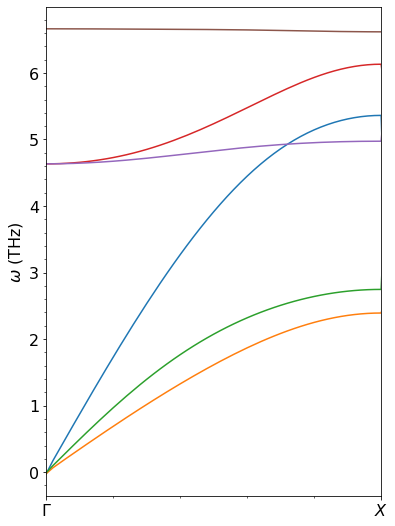

In [297]:
fig, ax = plt.subplots(figsize = (6,9))
for i in np.arange(6):
    ax.plot(band_freqs2[:,i], label = str(i))
# ax.legend()
ax.set_xlim(0,50)

ax.set_ylabel(r'$\omega $ (THz)', fontsize = 16)
ax.set_xticks([0,50])
ax.set_xticklabels([r'$\Gamma$',r'$X$'], fontsize = 16)

ax.tick_params(labelsize = 16)


### Phonon mode eigenvectors 

In [298]:
band_nb = 0
atom_nb = 0
# band_eigen_v2[:,band_nb,atom_nb,:,:]

In [299]:
xyz_idx = 0
# np.complex(band_eigen_v2[0,band_nb,atom_nb,xyz_idx,0], band_eigen_v2[0,band_nb,atom_nb,xyz_idx,1])

In [300]:
simulation_eigens = np.zeros((band_eigen_v2[:,band_nb,atom_nb,xyz_idx,0].shape[0], 6, 2, 3))
simulation_eigens = simulation_eigens.astype(complex)

simulation_eigens_norm = np.zeros((band_eigen_v2[:,band_nb,atom_nb,xyz_idx,0].shape[0], 6))
simulation_eigens_norm.shape

(153, 6)

In [301]:
for band_nb in np.arange(6):
    for atom_nb in np.arange(2):
        for i in np.arange(band_eigen_v2[:,band_nb,atom_nb,xyz_idx,0].shape[0]):
            x = np.complex(band_eigen_v2[i,band_nb,atom_nb,0,0], band_eigen_v2[i,band_nb,atom_nb,0,1])
            y = np.complex(band_eigen_v2[i,band_nb,atom_nb,1,0], band_eigen_v2[i,band_nb,atom_nb,1,1])
            z = np.complex(band_eigen_v2[i,band_nb,atom_nb,2,0], band_eigen_v2[i,band_nb,atom_nb,2,1])
            
            simulation_eigens[i, band_nb,atom_nb] = [x,y,z]

for band_nb in np.arange(6):
    for i in np.arange(band_eigen_v2[:,band_nb,atom_nb,xyz_idx,0].shape[0]):
#         print(np.linalg.norm(simulation_eigens[i,band_nb,:, :]))
        simulation_eigens_norm[i, band_nb] = np.linalg.norm(simulation_eigens[i,band_nb,:, :], )

 

In [302]:
band_nb,atom_nb = 0,0

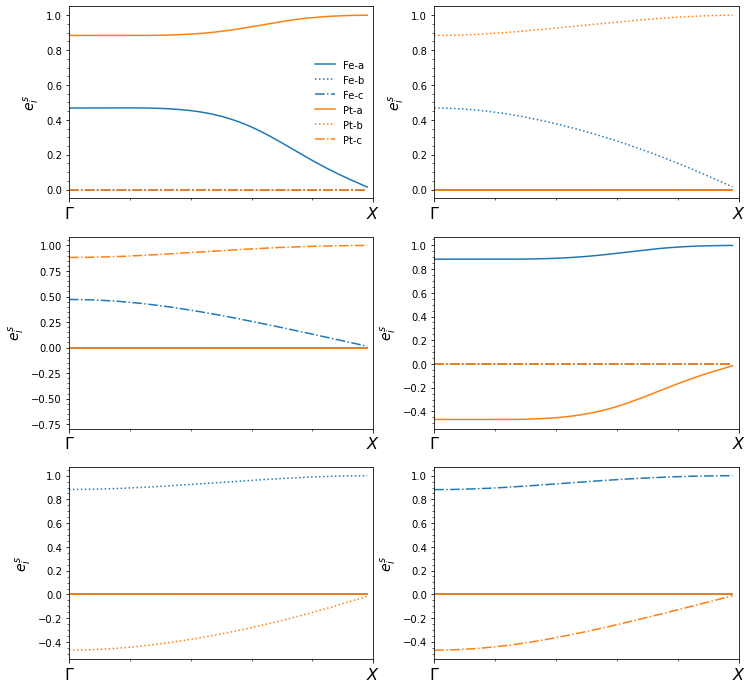

In [303]:
axs = []
fig, axs = plt.subplots(ncols =2, nrows = 3, figsize = (3*4,3*4))

band_nb = 0
for i in np.arange(3):
    for j in np.arange(2):

#         pass
        
        atom_nb = 0
        sel_gx = np.ones(len(q_jakub) )
        sel_gx[np.linalg.norm(q_jakub, axis = -1) >1.15] = np.nan
                
        
        proj1_a = np.angle(simulation_eigens[:,band_nb,atom_nb, 0])        
        proj1_b = np.angle(simulation_eigens[:,band_nb,atom_nb, 1])        
        proj1_c = np.angle(simulation_eigens[:,band_nb,atom_nb, 2])
        
        axs[i, j].plot(sel_gx * np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 0])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 0])**2)/simulation_eigens_norm[:, band_nb],
                       linestyle ='solid', label  = 'Fe-a', c= 'C0') #c= f'C{band_nb}')

        axs[i, j].plot(sel_gx * np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 1])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 1])**2)/simulation_eigens_norm[:, band_nb],
                       ':', label  = 'Fe-b', c= 'C0') #c= f'C{band_nb}')

        axs[i, j].plot(sel_gx * np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 2])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 2])**2)/simulation_eigens_norm[:, band_nb],
                       ls='dashdot', label  = 'Fe-c', c= 'C0') #c= f'C{band_nb}')

        
        
        atom_nb = 1
        proj2_a = np.angle(simulation_eigens[:,band_nb,atom_nb, 0])
        proj2_b = np.angle(simulation_eigens[:,band_nb,atom_nb, 1])
        proj2_c = np.angle(simulation_eigens[:,band_nb,atom_nb, 2])

        axs[i, j].plot(sel_gx*np.cos(proj2_a - proj1_a)*np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 0])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 0])**2)/simulation_eigens_norm[:, band_nb],
                       linestyle ='solid', label  = 'Pt-a', c='C1')#c= f'C{band_nb}')
        

        axs[i, j].plot(sel_gx*np.cos(proj2_b - proj1_b)*np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 1])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 1])**2)/simulation_eigens_norm[:, band_nb],
                       ':', label  = 'Pt-b', c='C1')#c= f'C{band_nb}')
        
        
        axs[i, j].plot(sel_gx*np.cos(proj2_c - proj1_c)*np.sqrt(np.real(simulation_eigens[:,band_nb,atom_nb, 2])**2 + np.imag(simulation_eigens[:,band_nb,atom_nb, 2])**2)/simulation_eigens_norm[:, band_nb],
                       ls='dashdot', label  = 'Pt-c', c='C1')#c= f'C{band_nb}')
        
        

        axs[0,0].legend(fontsize = 10, frameon=False)
        axs[i, j].set_ylabel(r'$  e^{s}_{i}  $', fontsize = 14)
        axs[i, j].set_xlim(0,50)
        axs[i, j].set_xticks([0, 50]);
        axs[i, j].set_xticklabels([r'$\Gamma$',r'$X$'], fontsize = 16)
        band_nb += 1



In [304]:
band_nb = 0

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/numpy/core/_

(0.0, 50.0)

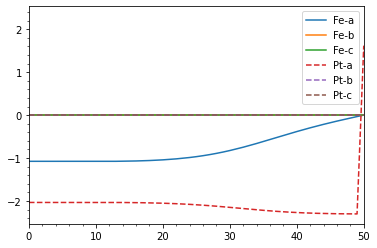

In [305]:
plt.figure()

atom_nb = 0
plt.plot(simulation_eigens[:,band_nb,atom_nb, 0], label  = 'Fe-a')
plt.plot(simulation_eigens[:,band_nb,atom_nb, 1], label  = 'Fe-b')
plt.plot(simulation_eigens[:,band_nb,atom_nb, 2], label  = 'Fe-c')
atom_nb = 1
plt.plot(simulation_eigens[:,band_nb,atom_nb, 0], '--', label  = 'Pt-a')
plt.plot(simulation_eigens[:,band_nb,atom_nb, 1], '--', label  = 'Pt-b')
plt.plot(simulation_eigens[:,band_nb,atom_nb, 2], '--', label  = 'Pt-c')
plt.legend()

plt.xlim(0,50)

In [306]:
# xyz_idx = 0
# np.complex(band_eigen_v2[0,band_nb,atom_nb,xyz_idx,0], band_eigen_v2[0,band_nb,atom_nb,xyz_idx,1])

## Brillouin Zone illustrations

In [307]:
####################
### Input         ##
####################


arrow_scale_factor = 1/4
# arrow_offset = 0.05

arrow_offset = 0.1
arrow_offset_x = 0.1

band_nb = 1

#LA  = 0
#TA2 = 1 #(along the b axis)

colour = f'C{band_nb}'
# select the BZ center 
h_tmp = 1
k_tmp = 0
_,_,C_tmp,_,_,_,_,_ = I_UED_dt.select_braggs_Bragg(h=h_tmp, k=k_tmp, allBragg_indices_2=allBragg_indices_2)

X100 = ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)[0]
Y100 = ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)[1]
b_offset = ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)

# X100 = 0
# Y100 = 0
# b_offset =0


#####################
### Do not touch  ###
#####################

h_tmp = 1
k_tmp = 0
_,_,C_tmp,_,_,_,_,_ = I_UED_dt.select_braggs_Bragg(h=h_tmp, k=k_tmp, allBragg_indices_2=allBragg_indices_2)

# X100 = ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)[0]
# Y100 = ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)[1]

# theta_BZ = -np.dot(((allBragg_coord_2[C_tmp] - dif.centerpos)*coef), jakub_a1[0:2]) / (np.linalg.norm(jakub_a1[0:2])* np.linalg.norm(((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)))
theta_BZ = 0
rot = np.asarray([[np.cos(theta_BZ), -np.sin(theta_BZ)],[np.sin(theta_BZ), np.cos(theta_BZ)]])
rot90 = np.asarray([[np.cos(np.pi/2), -np.sin(np.pi/2)],[np.sin(np.pi/2), np.cos(np.pi/2)]])

p1 = np.asarray([-0.5*jakub_a1[0], -0.5*jakub_a1[0]])
p2 = np.asarray([0.5*jakub_a1[0], -0.5*jakub_a1[0]])
p3 = np.asarray([0.5*jakub_a1[0], 0.5*jakub_a1[0]])
p4 = np.asarray([-0.5*jakub_a1[0], 0.5*jakub_a1[0]])

p1 = np.dot(rot, p1)
p2 = np.dot(rot, p2)
p3 = np.dot(rot, p3)
p4 = np.dot(rot, p4)


p1 += ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)
p2 += ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)
p3 += ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)
p4 += ((allBragg_coord_2[C_tmp] - dif.centerpos)*coef)






################
###  Low q     #
################

q_idx = 3 # low q G-X
# q_idx = 145 #low q for G-M

#arrow atom 1
tail1_lq = copy.deepcopy(q_jakub[q_idx][0:2])
tail1_lq[1] += arrow_offset
tail1_lq[0] += arrow_offset_x
# d1_lq = band_eigen_v2[q_idx][band_nb][0][0:2,0]*arrow_scale_factor

tmp_array = band_eigen_v2[q_idx][band_nb][0]

angle_atom1_x = np.angle(np.complex(*tmp_array[0]))
angle_atom1_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))*np.cos(np.angle(np.complex(*tmp_array[0])))*(-1)
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))*np.cos(np.angle(np.complex(*tmp_array[1])))*np.cos(np.angle(np.complex(*tmp_array[0])))*(-1)

# print(tmp_x, np.cos(np.angle(np.complex(*tmp_array[0]))) )
# print(tmp_y, np.cos(np.angle(np.complex(*tmp_array[1]))) )
# print('')


d1_lq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor


head1_lq = tail1_lq + d1_lq

#arrow atom 2
tail2_lq = copy.deepcopy(q_jakub[q_idx][0:2])
tail2_lq[1] -= arrow_offset
tail2_lq[0] -= arrow_offset_x

# d2_lq = band_eigen_v2[q_idx][band_nb][1][0:2,0]*arrow_scale_factor

tmp_array = band_eigen_v2[q_idx][band_nb][1]

angle_atom2_x = np.angle(np.complex(*tmp_array[0]))
angle_atom2_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))*np.cos(angle_atom2_x - angle_atom1_x)
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))*np.cos(angle_atom2_y - angle_atom1_y)

# print(tmp_x, np.cos(np.angle(np.complex(*tmp_array[0]))))
# print(tmp_y, np.cos(np.angle(np.complex(*tmp_array[1]))))
# print('')
d2_lq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor

head2_lq = tail2_lq + d2_lq

#transformations to fit the rotation of the image 
head2_lq = np.dot(rot, head2_lq) #+ b_offset
tail2_lq = np.dot(rot, tail2_lq) #+ b_offset

tail1_lq = np.dot(rot, tail1_lq) #+ b_offset
head1_lq = np.dot(rot, head1_lq) #+ b_offset


###################
###  medium q     #
###################

q_idx = 25 # mid way to X point
# q_idx = 125+2 # mid way to X point

#arrow atom 1
tail1_mq = copy.deepcopy(q_jakub[q_idx][0:2])
tail1_mq[1] += arrow_offset
tail1_mq[0] += arrow_offset_x
# d1_mq = band_eigen_v2[q_idx][band_nb][0][0:2,0]*arrow_scale_factor


tmp_array = band_eigen_v2[q_idx][band_nb][0]

angle_atom1_x = np.angle(np.complex(*tmp_array[0]))
angle_atom1_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))
d1_mq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor

head1_mq = tail1_mq + d1_mq

#arrow atom 2
tail2_mq = copy.deepcopy(q_jakub[q_idx][0:2])
tail2_mq[1] -= arrow_offset
tail2_mq[0] -= arrow_offset_x
# d2_mq = band_eigen_v2[q_idx][band_nb][1][0:2,0]*arrow_scale_factor

tmp_array = band_eigen_v2[q_idx][band_nb][1]

angle_atom2_x = np.angle(np.complex(*tmp_array[0]))
angle_atom2_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))*np.cos(angle_atom2_x - angle_atom1_x)
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))*np.cos(angle_atom2_y - angle_atom1_y)
d2_mq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor
print(np.cos(np.angle(np.complex(*tmp_array[0]))))
print(np.cos(np.angle(np.complex(*tmp_array[1]))))
print('')

head2_mq = tail2_mq + d2_mq

#transformations to fit the rotation of the image 
head2_mq = np.dot(rot, head2_mq) #+ b_offset
tail2_mq = np.dot(rot, tail2_mq) #+ b_offset

tail1_mq = np.dot(rot, tail1_mq) #+ b_offset
head1_mq = np.dot(rot, head1_mq) #+ b_offset

###################
###  high   q     #
###################

q_idx = 49 # X point
# q_idx = 103 # M point

#arrow atom 1
tail1_hq = copy.deepcopy(q_jakub[q_idx][0:2])
tail1_hq[1] += arrow_offset
tail1_hq[0] += arrow_offset_x

# d1_hq = band_eigen_v2[q_idx][band_nb][0][0:2,0]*arrow_scale_factor

tmp_array = band_eigen_v2[q_idx][band_nb][0]

angle_atom1_x = np.angle(np.complex(*tmp_array[0]))
angle_atom1_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))

d1_hq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor



head1_hq = tail1_hq + d1_hq

#arrow atom 2
tail2_hq = copy.deepcopy(q_jakub[q_idx][0:2])
tail2_hq[1] -= arrow_offset
tail2_hq[0] -= arrow_offset_x
# d2_hq = band_eigen_v2[q_idx][band_nb][1][0:2,0]*arrow_scale_factor

tmp_array = band_eigen_v2[q_idx][band_nb][1]

angle_atom2_x = np.angle(np.complex(*tmp_array[0]))
angle_atom2_y = np.angle(np.complex(*tmp_array[1]))

tmp_x = np.linalg.norm(np.complex(*tmp_array[0]))*np.cos(angle_atom2_x - angle_atom1_x)
tmp_y = np.linalg.norm(np.complex(*tmp_array[1]))*np.cos(angle_atom2_y - angle_atom1_y)
d2_hq = np.asarray([tmp_x, tmp_y])*arrow_scale_factor

print(np.cos(np.angle(np.complex(*tmp_array[0]))))
print(np.cos(np.angle(np.complex(*tmp_array[1]))))
print('')

head2_hq = tail2_hq + d2_hq

#transformations to fit the rotation of the image 
head2_hq = np.dot(rot, head2_hq) #+ b_offset
tail2_hq = np.dot(rot, tail2_hq) #+ b_offset

tail1_hq = np.dot(rot, tail1_hq) #+ b_offset
head1_hq = np.dot(rot, head1_hq) #+ b_offset





1.0
0.9542804335126279

1.0
0.0011962125777256415



In [308]:
print(np.cos(np.angle(np.complex(*tmp_array[0]))))
print(np.cos(np.angle(np.complex(*tmp_array[1]))))
print('')

1.0
0.0011962125777256415



Text(0, 0.5, '$ \\AA^{-1} $')

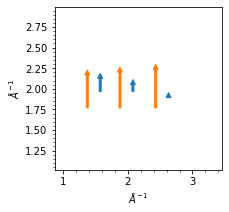

In [309]:
# fig, axs = plt.subplots(nrows=1, figsize = (6/2,6/2), dpi=300 )
fig, axs = plt.subplots(nrows=1, figsize = (6/2,6/2), )#dpi=300 )

# axs.pcolormesh(xx_A, yy_A, dif.first_image,)# vmin = vmin, vmax=vmax*3,)# alpha = 0.2)

# polygon = plt.Polygon([p1,p2,p3,p4,p1],
#                       fill = False,linestyle = '--', linewidth = 2
#                      )
# axs.add_patch(polygon)

colour_Fe = 'C0'
colour_Pt = 'C1'


# axs.pcolormesh(np.ones((10,10)))
################
###  Low q     #
################

arrow1_lq = mpatches.FancyArrowPatch(tail1_lq+b_offset, head1_lq+b_offset, mutation_scale=10, color = colour_Fe,)# ec = 'k')
axs.add_patch(arrow1_lq)

arrow2_lq = mpatches.FancyArrowPatch(tail2_lq+b_offset, head2_lq+b_offset, mutation_scale=10, color = colour_Pt)
axs.add_patch(arrow2_lq)


###################
###  medium q     #
###################
arrow1_mq = mpatches.FancyArrowPatch(tail1_mq+b_offset, head1_mq+b_offset, mutation_scale=10, color = colour_Fe,)# ec = 'k')
axs.add_patch(arrow1_mq)

arrow2_mq = mpatches.FancyArrowPatch(tail2_mq+b_offset, head2_mq+b_offset, mutation_scale=10, color = colour_Pt)
axs.add_patch(arrow2_mq)

###################
###  high q       #
###################
arrow1_hq = mpatches.FancyArrowPatch(tail1_hq+b_offset, head1_hq+b_offset, mutation_scale=10, color = colour_Fe,)# ec = 'k') 
                                     
axs.add_patch(arrow1_hq)

arrow2_hq = mpatches.FancyArrowPatch(tail2_hq+b_offset, head2_hq+b_offset, mutation_scale=10, color = colour_Pt)
axs.add_patch(arrow2_hq)








# # axs.pcolormesh(np.ones((10,10)))
# ################
# ###  Low q     #
# ################
# arrow1_lq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_lq) + b_offset, np.dot(rot90, head1_lq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_lq)

# arrow2_lq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_lq) + b_offset, np.dot(rot90, head2_lq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_lq)


# ###################
# ###  medium q     #
# ###################
# arrow1_mq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_mq) + b_offset, np.dot(rot90, head1_mq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_mq)

# arrow2_mq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_mq) + b_offset, np.dot(rot90, head2_mq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_mq)

# ###################
# ###  high q       #
# ###################
# arrow1_hq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_hq) + b_offset, np.dot(rot90, head1_hq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_hq)

# arrow2_hq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_hq) + b_offset, np.dot(rot90, head2_hq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_hq)


zoom_coef_x = .7
zoom_coef_y = .5

axs.set(xlim = (-jakub_a1[0]*zoom_coef_x/3+X100,jakub_a1[0]*zoom_coef_x+Y100), ylim = (-jakub_a1[0]*zoom_coef_y/3+X100,jakub_a1[0]*zoom_coef_y+Y100))

axs.set_xlabel(r'$ \AA^{-1} $')
axs.set_ylabel(r'$ \AA^{-1} $')



Text(0, 0.5, '$ \\AA^{-1} $')

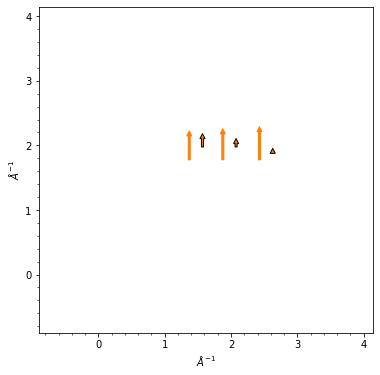

In [310]:
fig, axs = plt.subplots(nrows=1, figsize = (6,6) )

# axs.pcolormesh(xx_A, yy_A, dif.first_image,)# vmin = vmin, vmax=vmax*3,)# alpha = 0.2)

# polygon = plt.Polygon([p1,p2,p3,p4,p1],
#                       fill = False,linestyle = '--', linewidth = 2
#                      )
# axs.add_patch(polygon)



# axs.pcolormesh(np.ones((10,10)))
################
###  Low q     #
################

arrow1_lq = mpatches.FancyArrowPatch(tail1_lq+b_offset, head1_lq+b_offset, mutation_scale=10, color = colour, ec = 'k')
axs.add_patch(arrow1_lq)

arrow2_lq = mpatches.FancyArrowPatch(tail2_lq+b_offset, head2_lq+b_offset, mutation_scale=10, color = colour)
axs.add_patch(arrow2_lq)


###################
###  medium q     #
###################
arrow1_mq = mpatches.FancyArrowPatch(tail1_mq+b_offset, head1_mq+b_offset, mutation_scale=10, color = colour, ec = 'k')
axs.add_patch(arrow1_mq)

arrow2_mq = mpatches.FancyArrowPatch(tail2_mq+b_offset, head2_mq+b_offset, mutation_scale=10, color = colour)
axs.add_patch(arrow2_mq)

###################
###  high q       #
###################
arrow1_hq = mpatches.FancyArrowPatch(tail1_hq+b_offset, head1_hq+b_offset, mutation_scale=10, color = colour, ec = 'k') 
                                     
axs.add_patch(arrow1_hq)

arrow2_hq = mpatches.FancyArrowPatch(tail2_hq+b_offset, head2_hq+b_offset, mutation_scale=10, color = colour)
axs.add_patch(arrow2_hq)








# # axs.pcolormesh(np.ones((10,10)))
# ################
# ###  Low q     #
# ################
# arrow1_lq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_lq) + b_offset, np.dot(rot90, head1_lq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_lq)

# arrow2_lq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_lq) + b_offset, np.dot(rot90, head2_lq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_lq)


# ###################
# ###  medium q     #
# ###################
# arrow1_mq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_mq) + b_offset, np.dot(rot90, head1_mq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_mq)

# arrow2_mq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_mq) + b_offset, np.dot(rot90, head2_mq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_mq)

# ###################
# ###  high q       #
# ###################
# arrow1_hq = mpatches.FancyArrowPatch(np.dot(rot90, tail1_hq) + b_offset, np.dot(rot90, head1_hq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow1_hq)

# arrow2_hq = mpatches.FancyArrowPatch(np.dot(rot90, tail2_hq) + b_offset, np.dot(rot90, head2_hq) + b_offset, mutation_scale=10, color = colour)
# axs.add_patch(arrow2_hq)



axs.set(xlim = (-jakub_a1[0]*1.+X100,jakub_a1[0]*1.+Y100), ylim = (-jakub_a1[0]*1.+X100,jakub_a1[0]*1.+Y100))

axs.set_xlabel(r'$ \AA^{-1} $')
axs.set_ylabel(r'$ \AA^{-1} $')

## Single Scattering Pattern Images for Paper

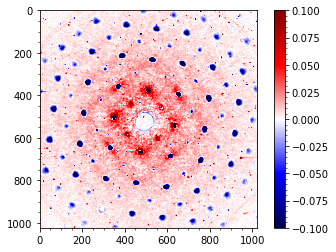

In [311]:
mask_peaks = np.ones_like(alinged_imgs[0])
# for i in range(len(bragg_fits_binned_delays[0,:,0])):
i = 34
s = 300*(np.abs(
    bragg_fits_binned_delays[0,i,0]- bragg_fits_binned_delays[-1,i,0]))**(1/3) 

tmp_msk = np.where( ((xx- bragg_fits_binned_delays[-1,i,1])**2 + (yy- bragg_fits_binned_delays[-1,i,2])**2  ) < s  )

mask_peaks[tmp_msk] = 0

mask_peaks = mask_peaks.astype(bool)

plt.figure()
plt.imshow((alinged_imgs[i] - alinged_imgs[0])*mask_peaks, vmin = -.1, vmax= .1, cmap = 'seismic')

# plt.scatter(bragg_fits_binned_delays[0,:,1],bragg_fits_binned_delays[0,:,2], s = 60*(np.abs(
#     bragg_fits_binned_delays[0,:,0]- bragg_fits_binned_delays[-1,:,0]))**(1/3) )

plt.colorbar()

/cds/home/d/diegotur/.conda/envs/diego_test_py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


[]

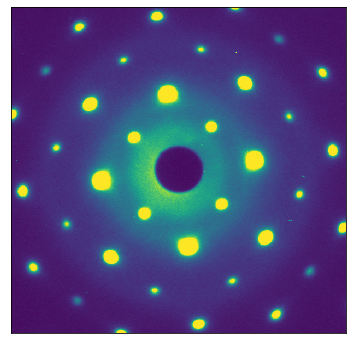

In [312]:
fig, axs = plt.subplots(nrows=1, figsize = (6,6) )

# im = axs.pcolormesh(xx_A, yy_A, dif.first_image, cmap = 'binary', vmin = 0, vmax=5,)# alpha = 0.2)
im = axs.pcolormesh(xx_A, yy_A, dif.first_image, vmin = 0, vmax=5,)# alpha = 0.2)

# axs.set_xlim(-10,10)
# axs.set_ylim(-10,10)

axs.set_xlim(-7,7)
axs.set_ylim(-7,7)
# axs.set_xlabel(r'$ \AA^{-1} $')
# axs.set_ylabel(r'$ \AA^{-1} $')

axs.set_xticks([])
axs.set_yticks([])

# plt.colorbar(im)

# fig.savefig('paper_figs_tmp/scattering_patt)#ern_ROI')

# Save the Final file with all fitted and binned parameters for a quicker load and plotting in the future: 

In [313]:
import pickle 
# here is how I save it
with open('fast_load_Reid3/saved_dif.pkl', 'wb') as f:
    pickle.dump(dif, f)

# And here is how I would load it
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

SyntaxError: invalid syntax (<ipython-input-313-a81cc7559163>, line 2)